<h1><center><font size=10 color="green">Project 4 - Travel Package Purchase Prediction</center></font></h1>
<h1><center>Nilesh Kulkarni</center></h1>

# 1. Given Problem Statement


<h1><b><font size=3>Context</font></b></h1>

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

<h1><b><font size=3>Objective</font></b></h1>

To predict which customer is more likely to purchase the newly introduced travel package.

<h1><b><font size=3>Data Dictionary</font></b></h1>

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

# 2. Frame Problem

Key information from the problem statement - 
1. Enable and establish a viable business model to expand the customer base
2. 18% of the customers purchased existing 5 packages
3. Company unable to establish potential customer profile
4. Company is now planning to launch a new product i.e. Wellness Tourism Package
5. Build a model to predict the potential customer who is going to purchase the newly introduced travel package
6. The model will be built to make predictions before a customer is contacted.

Problem statement for the Data Scientist is to understand characteristics of the customer and factors that influence customers to purchase tourism packages.

Towards that, the expectation is to create a Machine Learning Model that predicts whether customer will purchase package or not (Yes or No). Based on the model and its independent features, business can be advised on the target customers as well as parameters to leverage to pitch packages to customers.

Dependent Feature in this case is - ProdTaken, that can take value of 0 (Customer will NOT purchase package) or 1 (Customer will purchase package). 

As its a categorical feature that can take 2 values, this is a <b><font color="blue">Binary Classification problem</b></font>. 

We will use various models to predict the ProdTaken feature and try to use best suited model 

<b><font color="blue">Decision Tree (CART)</b></font>

<b><font color="blue">Bagging Classifier</b></font>

<b><font color="blue">Random Forest</b></font>

<b><font color="blue">AdaBoosting</b></font>

<b><font color="blue">Gradient Boosting</b></font>

<b><font color="blue">XGB</b></font>

<b><font color="blue">Stacking</b></font>

    
Choose the best model out of above models that provides best generalized performance on the chosen metric.


# 3. Identify Model Evaluation Metrics


Company wants to harness the available data of existing and potential customers to target the right customers.

For the Classification confusion matrix, there are 2 types of errors possible - 

Type I - False Positives. Model predicts that customer will purchase package, but customer actually does not. 

Type II - False Negatives. Model predicts that customer will NOT purchase the package, but customer actually does. This will be a potential opportunity loss. Obviously, business wants to minimize this opportunity loss.

Possible metrics are -

Accuracy: Accuracy is calculated as the total number of two correct predictions (TP + TN) divided by the total number of a dataset (P + N).
      
      ACC = TP + TN / ( TP+TN+FP+FN)

Precision: Precision is calculated as the number of correct positive predictions (TP) divided by the total number of positive predictions (TP + FP).
      
      PREC = TP / (TP + FP)

Recall: Recall or Sensitivity or True Positive Rate (TPR)  is calculated as the number of correct positive predictions (TP) divided by the total number of positives (P).
      
      Recall = TP / (TP + FN)

F1-Score: Harmonic mean of precision and recall. It takes both false positive and false negatives into account. F1 score gives the same weightage to recall and precision. Therefore, it performs well on an imbalanced dataset.
      
      F1 = 2 * (PREC * RECALL) / (PREC + RECALL)

<b><font color="blue">Primary Metric to be used is RECALL</b></font> - We will want to minimize Type II error. Hence RECALL is more appropriate metric.

Other Metrics - For reference, we will still report Accuracy, Precsion and F1 as well.

# 4. Reusable Custom Functions

In [1]:
# Function to create confusion matrix for TEST
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
# Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on TRAIN set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on TEST set : ",metrics.recall_score(y_test,pred_test))

In [3]:
# Function to calculate accuracy score
def get_accuracy_score(model):
    '''
    model : classifier to predict values of X

    '''
    #pred_train = model.predict(X_train)
    #pred_test = model.predict(X_test)
    print('Accuracy on TRAIN set:' , model.score(X_train, y_train))
    print('Accuracy on TEST set:' , model.score(X_test, y_test))

In [4]:
# Function to calculate f1 score
def get_f1_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("F1 on TRAIN set : ",metrics.f1_score(y_train,pred_train))
    print("F1 on TEST set : ",metrics.f1_score(y_test,pred_test))

In [5]:
##  Function to calculate precision score
def get_precision_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Precision on TRAIN set : ",metrics.precision_score(y_train,pred_train))
    print("Precision on TEST set : ",metrics.precision_score(y_test,pred_test))

In [6]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [7]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [8]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# 5. Import Required libraries

In [9]:
# Import libraries, comment out ones that are not needed for this project

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black#

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime as dt

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression_model
#from sklearn.linear_model import LinearRegression

# To check model performance for Linear Regression
#from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# For Feature Scaling
#from sklearn.preprocessing import MinMaxScaler, StandardScaler

# For boxcox
from scipy.stats import boxcox 
from sklearn.preprocessing import PowerTransformer

# To build Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build Logistic Regression
from sklearn.linear_model import LogisticRegression

# For Decision Tree Hyperparameter Tuning, Pre-pruning
from sklearn.model_selection import GridSearchCV

# Import Metrics
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

# For Ensemble Techniques

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier


# Importing Simple Imputer to treat the null values

from sklearn.impute import SimpleImputer

# for imbalanced data

from imblearn.over_sampling import SMOTE

In [10]:
#prevent SettingWithCopyWarning message from appearing
# had to be used as Jupyter notebook execution showed warnings that are not seen in Google Colab

pd.options.mode.chained_assignment = None

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# 6. Import Dataset

In [11]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Import the dataset as-is
# Created a copy of the dataset so that original dataset is retained as-is for reference in case needed

# As the excel file has multiple tabs, parameter sheet_name = 1 is used to indicate second tab to be used

#This line was used with Google Colab
df=pd.read_excel('/content/drive/My Drive/AI-ML/Module4_EnsembleTech/PROJECT-4/Tourism.xlsx', sheet_name = 'Tourism')

df_orig_copy=df.copy()

In [13]:
 # Review sample 10 rows to confrm that data is loaded correctly 
df.sample(10, random_state=1)

CustomerID  ProdTaken     Age    TypeofContact  CityTier  \
3015      203015          0 27.0000  Company Invited         1   
1242      201242          0 40.0000     Self Enquiry         3   
3073      203073          0 29.0000     Self Enquiry         2   
804       200804          0 48.0000  Company Invited         1   
3339      203339          0 32.0000     Self Enquiry         1   
3080      203080          1 36.0000  Company Invited         1   
2851      202851          0 46.0000     Self Enquiry         1   
2883      202883          1 32.0000  Company Invited         1   
1676      201676          0 22.0000     Self Enquiry         1   
1140      201140          0 44.0000     Self Enquiry         1   

      DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
3015           7.0000        Salaried  Female                       4   
1242          13.0000  Small Business    Male                       2   
3073          15.0000  Small Business    Male                       4   
804            6.0000  Small Business    Male                       2   
3339          18.0000  Small Business    Male                       4   
3080          32.0000        Salaried  Female                       4   
2851          17.0000        Salaried    Male                       4   
2883          27.0000        Salaried    Male                       4   
1676          11.0000        Salaried    Male                       2   
1140          13.0000  Small Business  Female                       2   

      NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
3015             6.0000          Basic                 3.0000       Married   
1242             3.0000           King                 4.0000        Single   
3073             5.0000          Basic                 3.0000       Married   
804              1.0000   Super Deluxe                 3.0000        Single   
3339             4.0000         Deluxe                 5.0000      Divorced   
3080             4.0000          Basic                 4.0000       Married   
2851             4.0000          Basic                 3.0000      Divorced   
2883             4.0000       Standard                 3.0000      Divorced   
1676             1.0000          Basic                 4.0000       Married   
1140             3.0000           King                 3.0000       Married   

      NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
3015         5.0000         0                       4       1   
1242         2.0000         0                       4       1   
3073         3.0000         0                       2       0   
804          3.0000         0                       2       0   
3339         3.0000         1                       2       0   
3080         3.0000         1                       3       0   
2851         5.0000         0                       5       1   
2883         5.0000         0                       3       1   
1676         2.0000         1                       4       1   
1140         1.0000         1                       4       1   

      NumberOfChildrenVisiting     Designation  MonthlyIncome  
3015                    3.0000       Executive     23042.0000  
1242                       NaN              VP     34833.0000  
3073                    2.0000       Executive     23614.0000  
804                     0.0000             AVP     31885.0000  
3339                    3.0000         Manager     25511.0000  
3080                    1.0000       Executive     20700.0000  
2851                    1.0000       Executive     21332.0000  
2883                    1.0000  Senior Manager     28502.0000  
1676                    0.0000       Executive     17328.0000  
1140                    1.0000              VP     34049.0000

In [14]:
# Review last 5 rows to confirm that data is loaded correctly
df.tail()

CustomerID  ProdTaken     Age    TypeofContact  CityTier  \
4883      204883          1 49.0000     Self Enquiry         3   
4884      204884          1 28.0000  Company Invited         1   
4885      204885          1 52.0000     Self Enquiry         3   
4886      204886          1 19.0000     Self Enquiry         3   
4887      204887          1 36.0000     Self Enquiry         1   

      DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
4883           9.0000  Small Business    Male                       3   
4884          31.0000        Salaried    Male                       4   
4885          17.0000        Salaried  Female                       4   
4886          16.0000  Small Business    Male                       3   
4887          14.0000        Salaried    Male                       4   

      NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
4883             5.0000         Deluxe                 4.0000     Unmarried   
4884             5.0000          Basic                 3.0000        Single   
4885             4.0000       Standard                 4.0000       Married   
4886             4.0000          Basic                 3.0000        Single   
4887             4.0000          Basic                 4.0000     Unmarried   

      NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
4883         2.0000         1                       1       1   
4884         3.0000         1                       3       1   
4885         7.0000         0                       1       1   
4886         3.0000         0                       5       0   
4887         3.0000         1                       3       1   

      NumberOfChildrenVisiting     Designation  MonthlyIncome  
4883                    1.0000         Manager     26576.0000  
4884                    2.0000       Executive     21212.0000  
4885                    3.0000  Senior Manager     31820.0000  
4886                    2.0000       Executive     20289.0000  
4887                    2.0000       Executive     24041.0000

Dataset is imported successfully.

# 7. Perform Basic Data Checks

Basic data checks are done on the Total dataset. This is to check if any data manipulations can be done, without causing any data leakge. 

This includes - 

1. Check number of rows and columns
2. Duplicate records
3. Missing value counts
4. Statisitcal summary
5. Convert datatypes as appropriate

In [15]:
# Check shape of the data
print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 4888 
 Columns: 20


In [16]:
# Check for duplicate rows

df.duplicated().sum()

0

No duplicate records.

In [17]:
# Check basic structure of the dataset

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [18]:
df.dtypes.value_counts()

int64      7
float64    7
object     6
dtype: int64

In [19]:
df.select_dtypes(include='object').columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [20]:
df.select_dtypes(include='int').columns

Index(['CustomerID', 'ProdTaken', 'CityTier', 'NumberOfPersonVisiting',
       'Passport', 'PitchSatisfactionScore', 'OwnCar'],
      dtype='object')

In [21]:
df.select_dtypes(include='float').columns

Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

Data types - 

* Numeric Features (Integer) - 'CustomerID', 'ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'Passport', 'PitchSatisfactionScore', 'OwnCar'

* Numeric Features (Float) - 'Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting',  'MonthlyIncome'

* Object Features - 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',   'MaritalStatus', 'Designation'

Based on the data, some of the features can be converted to more appropriate datatypes. For example, ProdTaken, CityTier should be a Category fields instead of integers. This will be reviewed and converted to correct datatype little later.

In [22]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

There are missing values for 8 features. Need to check further and treat these as appropriate.

In [23]:
df.describe(include='all')

CustomerID  ProdTaken       Age TypeofContact  CityTier  \
count    4888.0000  4888.0000 4662.0000          4863 4888.0000   
unique         NaN        NaN       NaN             2       NaN   
top            NaN        NaN       NaN  Self Enquiry       NaN   
freq           NaN        NaN       NaN          3444       NaN   
mean   202443.5000     0.1882   37.6223           NaN    1.6543   
std      1411.1884     0.3909    9.3164           NaN    0.9166   
min    200000.0000     0.0000   18.0000           NaN    1.0000   
25%    201221.7500     0.0000   31.0000           NaN    1.0000   
50%    202443.5000     0.0000   36.0000           NaN    1.0000   
75%    203665.2500     0.0000   44.0000           NaN    3.0000   
max    204887.0000     1.0000   61.0000           NaN    3.0000   

        DurationOfPitch Occupation Gender  NumberOfPersonVisiting  \
count         4637.0000       4888   4888               4888.0000   
unique              NaN          4      3                     NaN   
top                 NaN   Salaried   Male                     NaN   
freq                NaN       2368   2916                     NaN   
mean            15.4908        NaN    NaN                  2.9051   
std              8.5196        NaN    NaN                  0.7249   
min              5.0000        NaN    NaN                  1.0000   
25%              9.0000        NaN    NaN                  2.0000   
50%             13.0000        NaN    NaN                  3.0000   
75%             20.0000        NaN    NaN                  3.0000   
max            127.0000        NaN    NaN                  5.0000   

        NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
count           4843.0000           4888              4862.0000          4888   
unique                NaN              5                    NaN             4   
top                   NaN          Basic                    NaN       Married   
freq                  NaN           1842                    NaN          2340   
mean               3.7084            NaN                 3.5810           NaN   
std                1.0025            NaN                 0.7980           NaN   
min                1.0000            NaN                 3.0000           NaN   
25%                3.0000            NaN                 3.0000           NaN   
50%                4.0000            NaN                 3.0000           NaN   
75%                4.0000            NaN                 4.0000           NaN   
max                6.0000            NaN                 5.0000           NaN   

        NumberOfTrips  Passport  PitchSatisfactionScore    OwnCar  \
count       4748.0000 4888.0000               4888.0000 4888.0000   
unique            NaN       NaN                     NaN       NaN   
top               NaN       NaN                     NaN       NaN   
freq              NaN       NaN                     NaN       NaN   
mean           3.2365    0.2909                  3.0782    0.6203   
std            1.8490    0.4542                  1.3658    0.4854   
min            1.0000    0.0000                  1.0000    0.0000   
25%            2.0000    0.0000                  2.0000    0.0000   
50%            3.0000    0.0000                  3.0000    1.0000   
75%            4.0000    1.0000                  4.0000    1.0000   
max           22.0000    1.0000                  5.0000    1.0000   

        NumberOfChildrenVisiting Designation  MonthlyIncome  
count                  4822.0000        4888      4655.0000  
unique                       NaN           5            NaN  
top                          NaN   Executive            NaN  
freq                         NaN        1842            NaN  
mean                      1.1873         NaN     23619.8535  
std                       0.8579         NaN      5380.6984  
min                       0.0000         NaN      1000.0000  
25%                       1.0000         NaN     20346.0000  
50%           

In [24]:
# Check Unique values for all columns

for column in df.columns:
    #print(df[i].value_counts(normalize=True))
     print(f'For {column}, there are {df[column].nunique()} values in the main dataset \n')
     print(f'For {column}, there are {df[column].unique()} values in the main dataset\n')
     print("-" * 50)

For CustomerID, there are 4888 values in the main dataset 

For CustomerID, there are [200000 200001 200002 ... 204885 204886 204887] values in the main dataset

--------------------------------------------------
For ProdTaken, there are 2 values in the main dataset 

For ProdTaken, there are [1 0] values in the main dataset

--------------------------------------------------
For Age, there are 44 values in the main dataset 

For Age, there are [41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.] values in the main dataset

--------------------------------------------------
For TypeofContact, there are 2 values in the main dataset 

For TypeofContact, there are ['Self Enquiry' 'Company Invited' nan] values in the main dataset

--------------------------------------------------
For CityTier, there are 3 values in the main dataset 

For CityTier, there are [3

In [25]:
# Check Unique values for discrete features


for column in df.columns:
     print(df[column].value_counts(1))
     print("-" * 50)

200000   0.0002
203256   0.0002
203263   0.0002
203262   0.0002
203261   0.0002
          ...  
201628   0.0002
201627   0.0002
201626   0.0002
201625   0.0002
204887   0.0002
Name: CustomerID, Length: 4888, dtype: float64
--------------------------------------------------
0   0.8118
1   0.1882
Name: ProdTaken, dtype: float64
--------------------------------------------------
35.0000   0.0508
36.0000   0.0495
34.0000   0.0453
31.0000   0.0435
30.0000   0.0427
32.0000   0.0423
33.0000   0.0405
37.0000   0.0397
29.0000   0.0382
38.0000   0.0378
41.0000   0.0332
39.0000   0.0322
28.0000   0.0315
40.0000   0.0313
42.0000   0.0305
27.0000   0.0296
43.0000   0.0279
46.0000   0.0260
45.0000   0.0249
26.0000   0.0227
44.0000   0.0225
51.0000   0.0193
47.0000   0.0189
50.0000   0.0184
25.0000   0.0159
52.0000   0.0146
53.0000   0.0142
48.0000   0.0139
49.0000   0.0139
55.0000   0.0137
54.0000   0.0131
56.0000   0.0124
24.0000   0.0120
22.0000   0.0099
23.0000   0.0099
59.0000   0.0094
21.0000  

In [26]:
# Fix the incorrect value for Gender 

df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

In [27]:
# Confirm the data fix

df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

Observations on the dataset

1. Dataset has 4888 rows and 20 features

2. No duplicate rows seen

3. Data types - 

* Numeric Features (Integer) - 'CustomerID', 'ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'Passport', 'PitchSatisfactionScore', 'OwnCar'

* Numeric Features (Float) - 'Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting',  'MonthlyIncome'

* Object Features - 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',   'MaritalStatus', 'Designation'

4. Missing values - There are 8 features having missing values.

      DurationOfPitch
      MonthlyIncome 
      Age         
      NumberOfTrips
      NumberOfChildrenVisiting    
      NumberOfFollowups           
      PreferredPropertyStar       
      TypeofContact  

5. Features 
  
  * CustomerID - Unique Identifier for the record.
  
  * ProdTaken - This has 0 (81%) or 1 values (19%), this is a Dependent   Feature. Category datatype is more appropriate for this feature.
  
  * Age - There are missing values for Age. Minimum age of the customer is 18, mean is 37 and maximum age is 61.

  * TypeofContact - 2 distinct values are 'Self Enquiry' (71%) and 'Company Invited' (29%).

  * CityTier - 3 distinct values. Category datatype is more appropriate for this feature.

  * DurationOfPitch - Average pitch is about 15 mins. There seem to be some upper outliers, couple of values are 126 and 127 mins.

  * Occupation - 4 different occupation values. But 'Salaried' and 'Small Business' are 91% of the customers. 

  * Gender - 3 distinct values, 1 of them ('Fe Male') is incorrect and needs to be fixed.

  * NumberOfPersonVisiting - 5 distinct values, Category datatype is more appropriate for this feature. 3, 2 and 4 are more frequent.

  * NumberOfFollowups - Values range from 1 to 6 follow-ups. Looks like at least 3 follow-ups are made in most of the cases.

  * ProductPitched - All 5 products are pitched. Most pitched is the 'Basic' package and least pitched is 'King'.

  * PreferredPropertyStar - 61% prefer 3 star properties, followed by 5 star and 4 star.

  * MaritalStatus - 4 distinct values, most customers are 'Married', but 'Single' and 'Divorced' numbers are also sizable.

  * NumberOfTrips - Values range from 1 to 22.

  * Passport - 71% of the customers do not have passports.

  * PitchSatisfactionScore - Quite evenly distributed pitch score. About 30% have a score of 2 or less. Need to investigate if its related to product pitched or number of follow-ups or duration.

  * OwnCar - As expected, majority own a car. But people not owning care also are significant (38%).

  * NumberOfChildrenVisiting - Values range from 0 to 3.

  * Designation - 5 distinct values. 'Executive' and 'Manager' seem to be the majority.

  * MonthlyIncome - Average income of 24000. But there seems to be quite a 
  range, minimum is 1,000. 75% have income less than 25,571.

6. Datatypes for below features to be changed to more appropriate datatypes. This will be done in the next step.

  ProdTaken - Should be Category

  CityTier - Should be Category

  NumberOfFollowups - Should be Integer

  PreferredPropertyStar - Should be Integer

  NumberOfTrips -  Should be Integer

  NumberOfChildrenVisiting -  Should be Integer

7. Correction of values needed for Gender feature is done.



# 8. Perform Exploratory Data Analysis (EDA)

Purpose of this analysis is find more details about individual features and its characteristics. 

Analysis includes - 
1. Checking the distribution and Univariate analysis
2. Multivariate analysis
3. Note observations / insights

## 8a. EDA - Univariate Analysis

Purpose of this analysis is find more details about individual feature and its characteristics

### 8a.1. ProdTaken

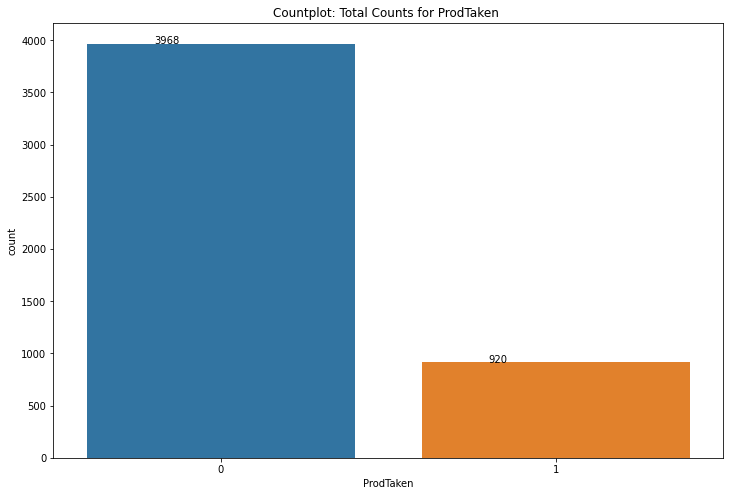

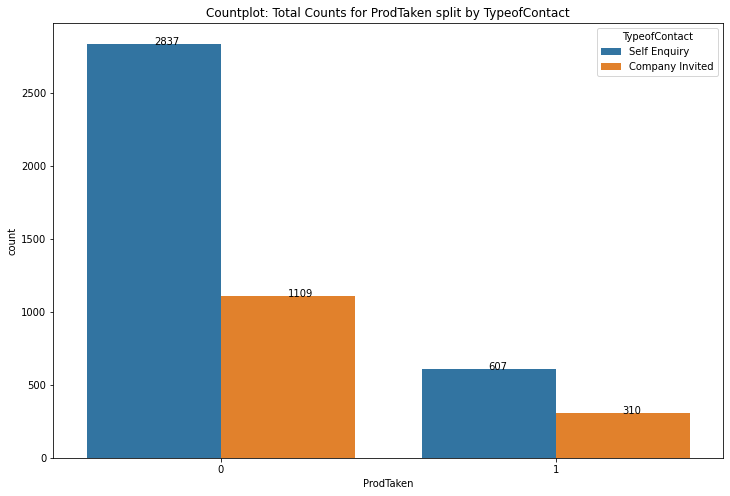

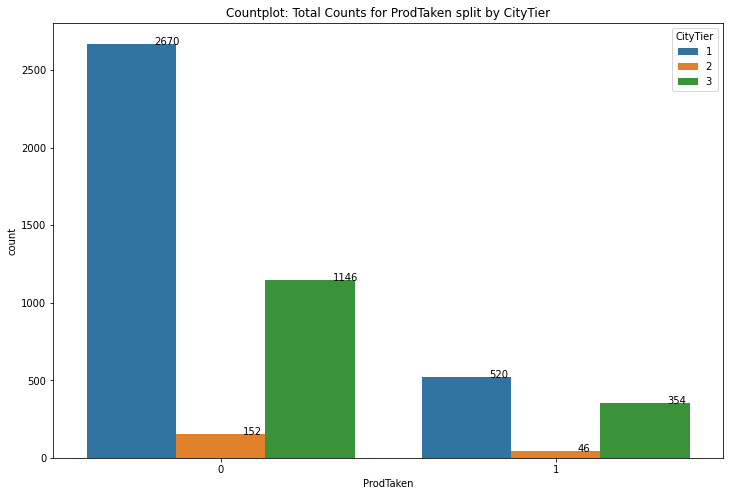

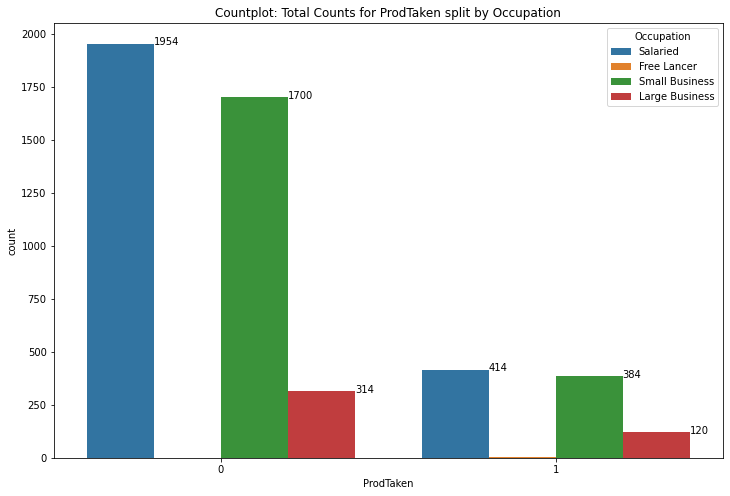

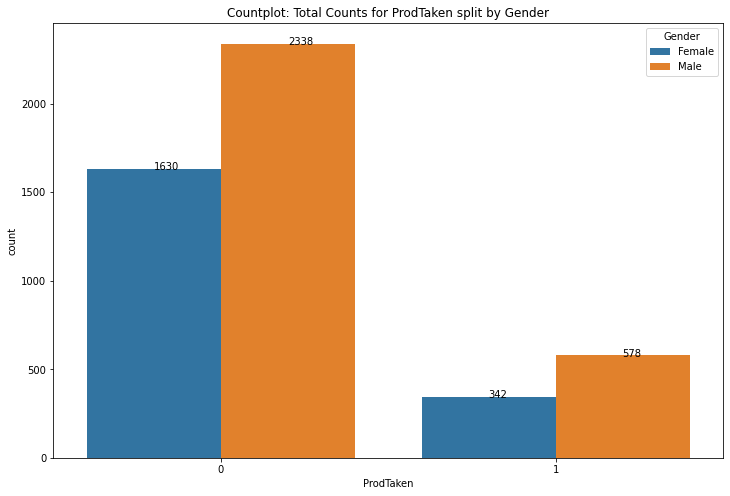

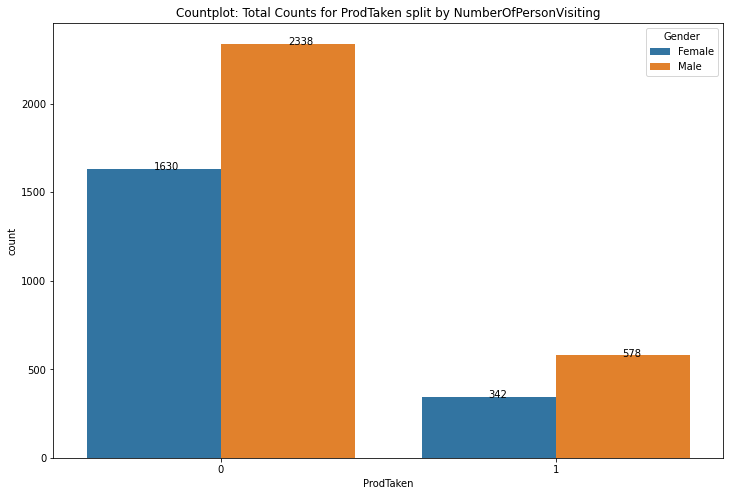

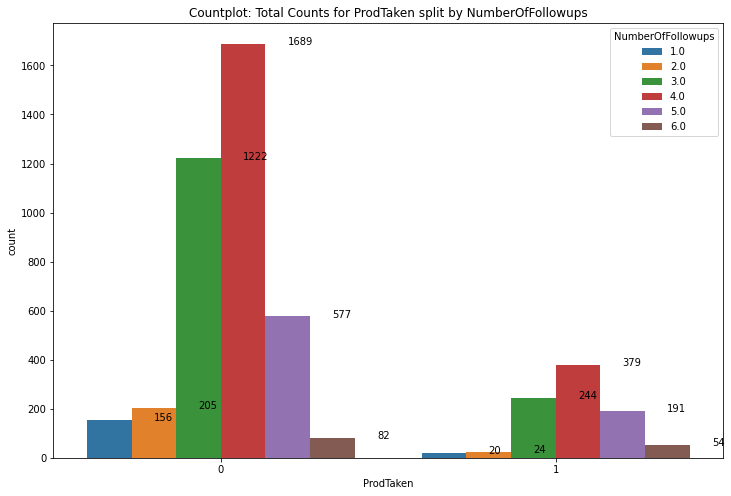

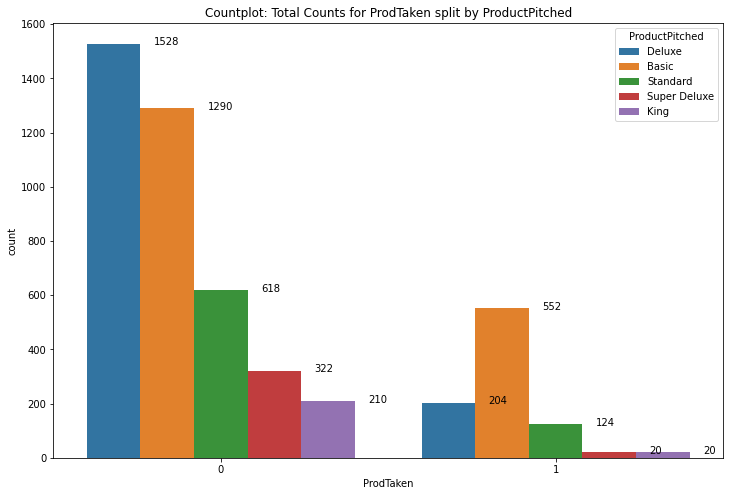

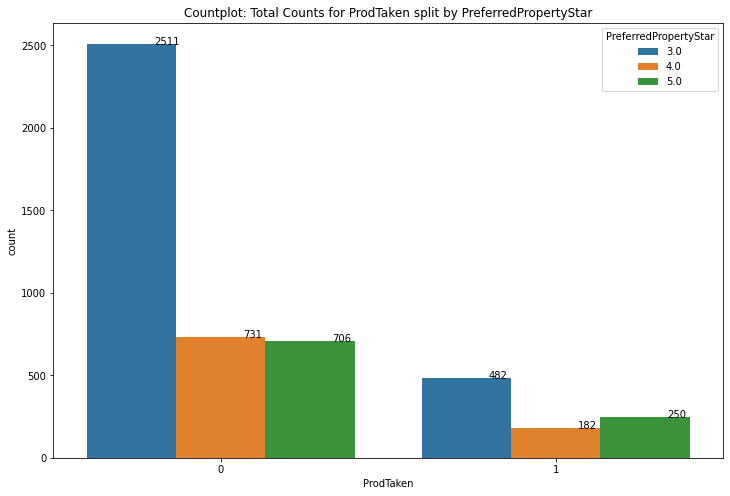

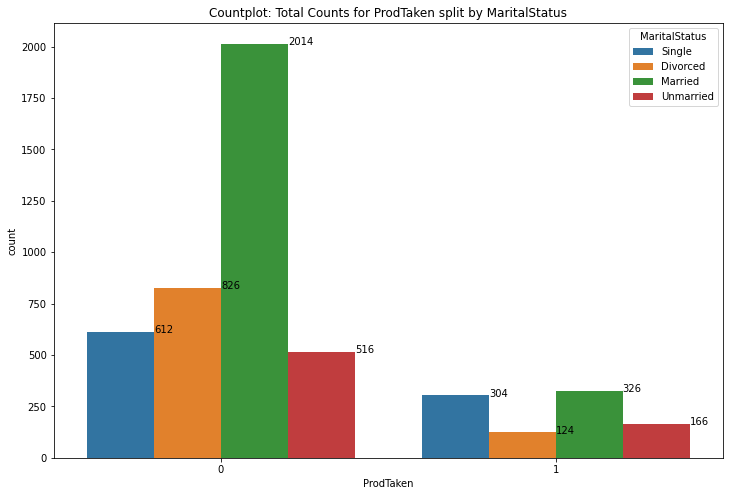

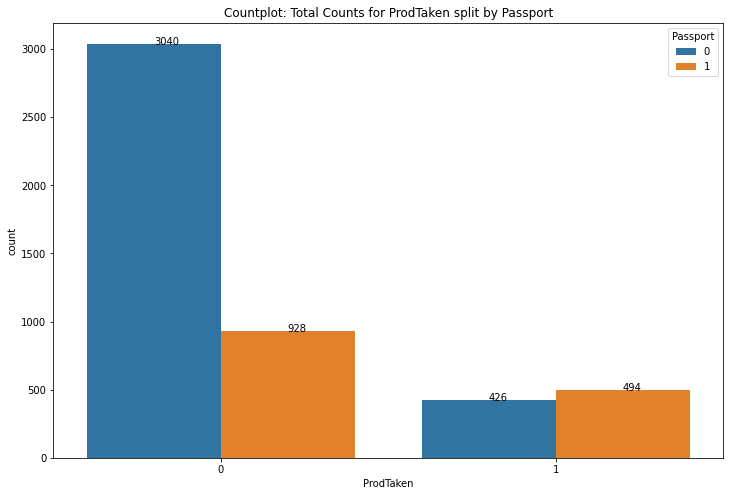

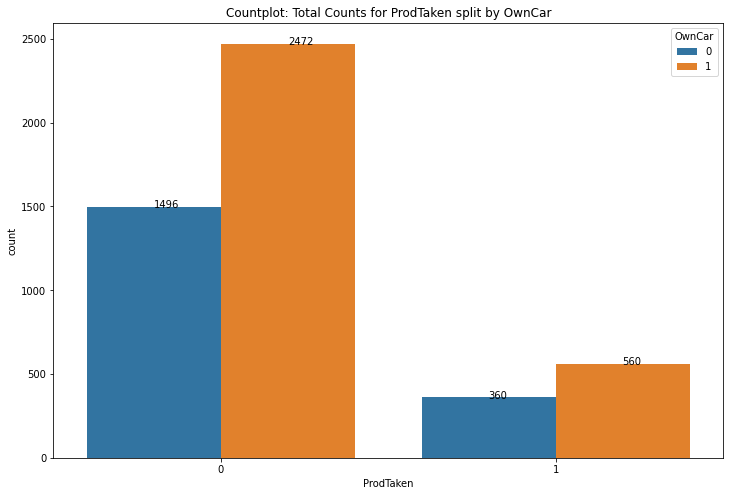

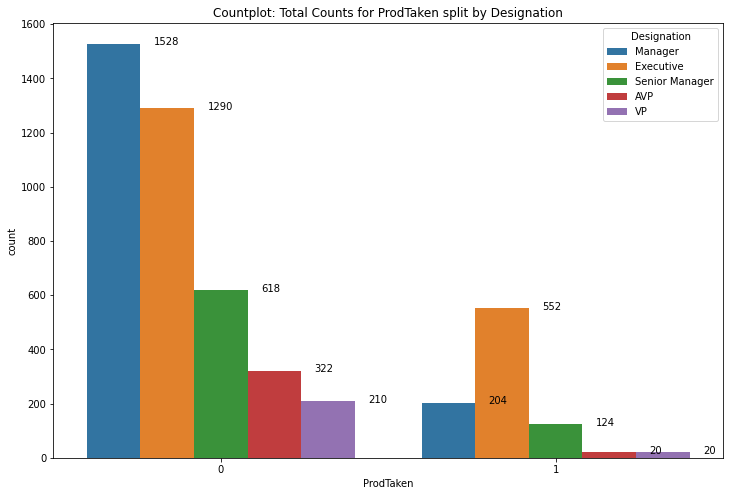

In [28]:
# Use Countplot to see the distribution of ProdTaken.
# This is a Dependent Feature. We will also see the counts split on various other features as well
# This will help us uncover profile of the customers who have taken the products

Temp_v='ProdTaken'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by TypeofContact')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='TypeofContact', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by CityTier')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='CityTier', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Occupation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Occupation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Gender')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Gender', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumberOfPersonVisiting')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Gender', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumberOfFollowups')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumberOfFollowups', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by ProductPitched')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'ProductPitched', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by PreferredPropertyStar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'PreferredPropertyStar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by MaritalStatus')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'MaritalStatus', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()



* As mentioned in the problem statement, about 18% customer s have taken the product.
* Of all the customers who purchansed the product - 
	* Most initiated the enquiry
	* Most are in Tier 1 city, followed by Tier 3
	* Most are either Salaried or Small Business owners. Almost none are Free Lancers
	* Majority are males, but females are not very far behind
	* At least 3 follow-ups are needed
	* Most buy 'Basic' package, minimal Super Deluxe and King packages bought
	* Most are interested in 3 star properties
	* Majority are Married or Single
	* Not much difference based on if they own car and have passport, or not
	* Executive have bought most numbr of packages. Percentage of 'conversion' is great for Executives, 552 out of total 1842 records

Observations for Age
1. Looks evenly distributed, no outliers

### 8a.2. Age

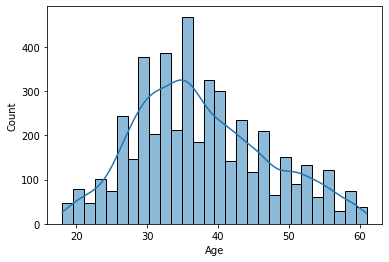

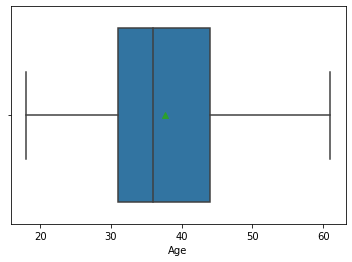

In [29]:
# Use histplots to see distribution for Age

sns.histplot(data=df,x='Age', kde=True)
plt.show()

sns.boxplot(data=df,x='Age', showmeans=True)
plt.show()

Observations for Experience

1. Looks evenly distributed, no outliers

### 8a.3. TypeofContact

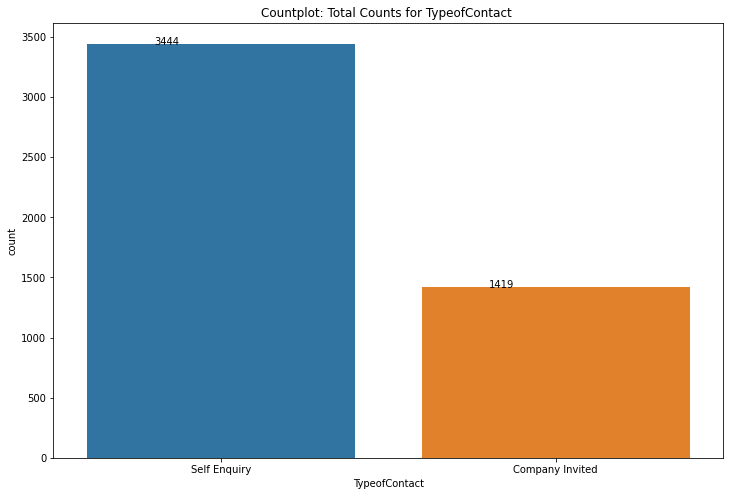

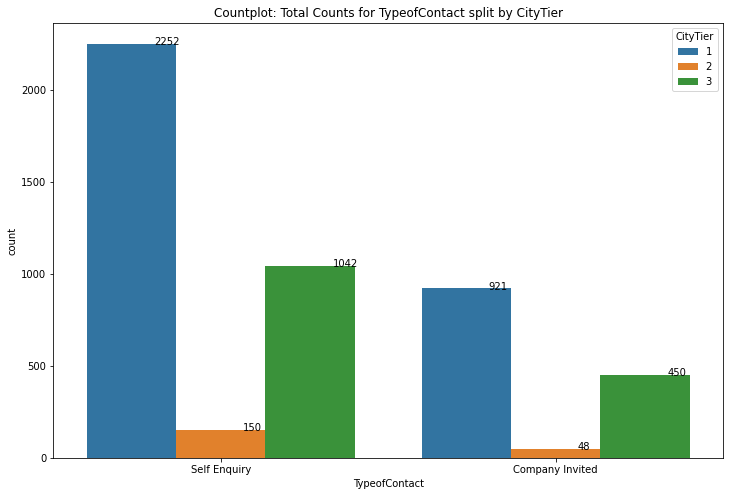

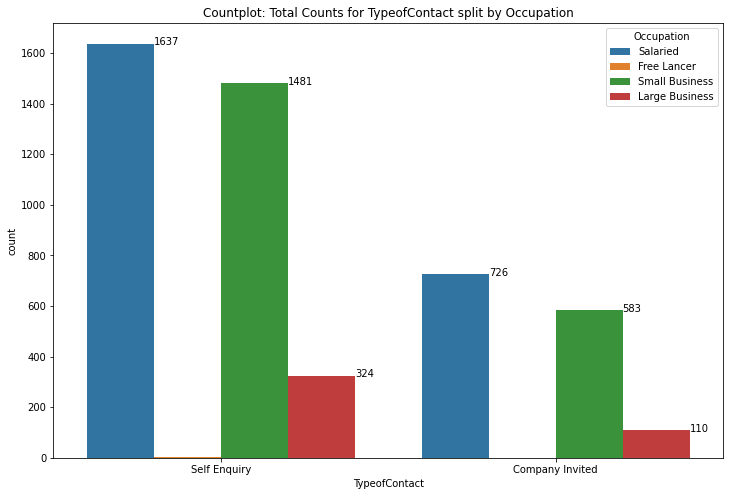

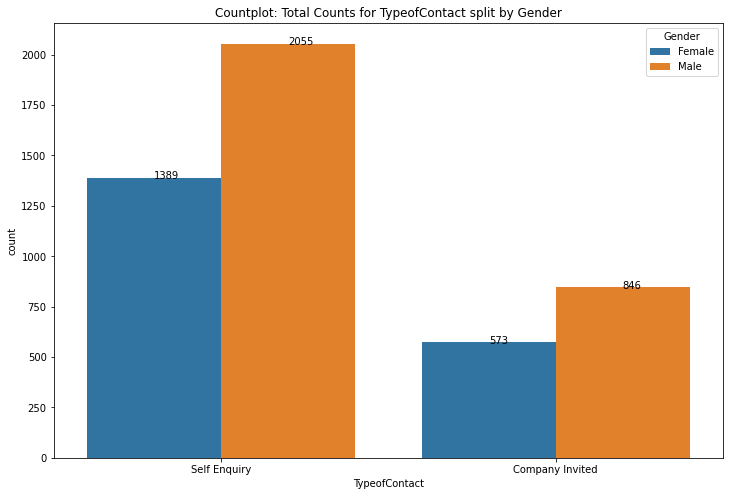

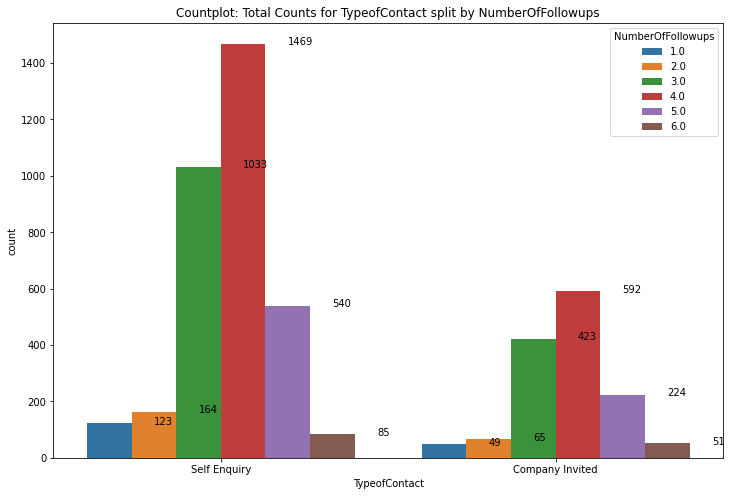

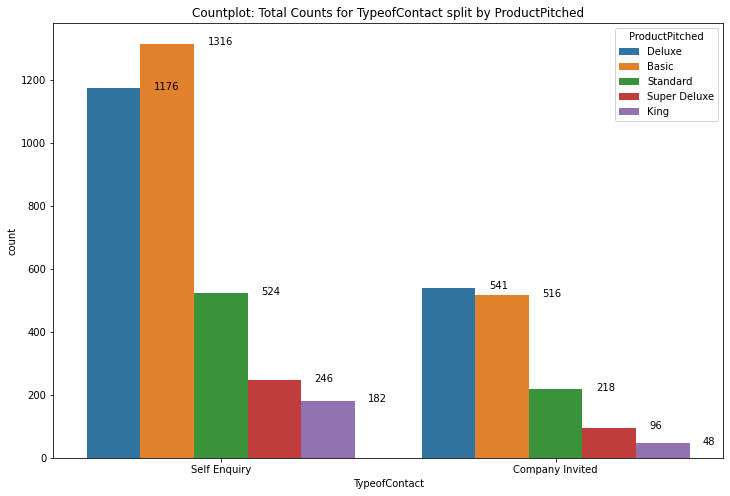

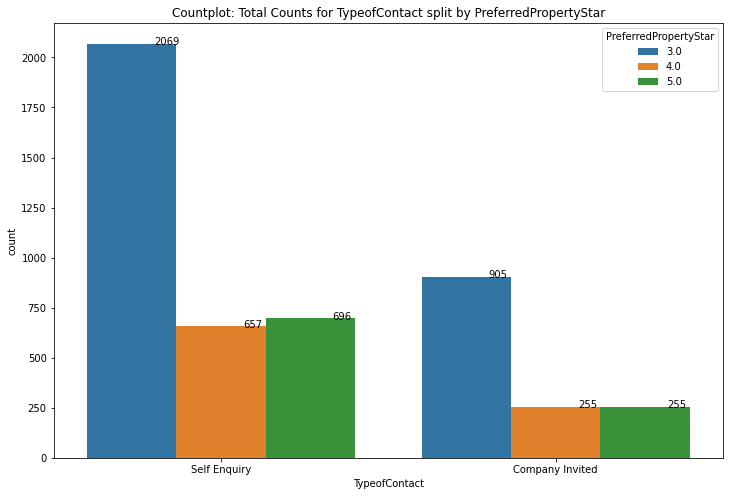

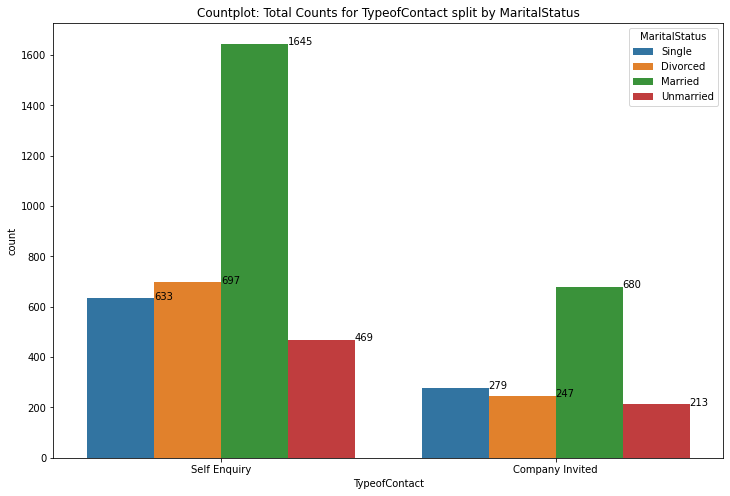

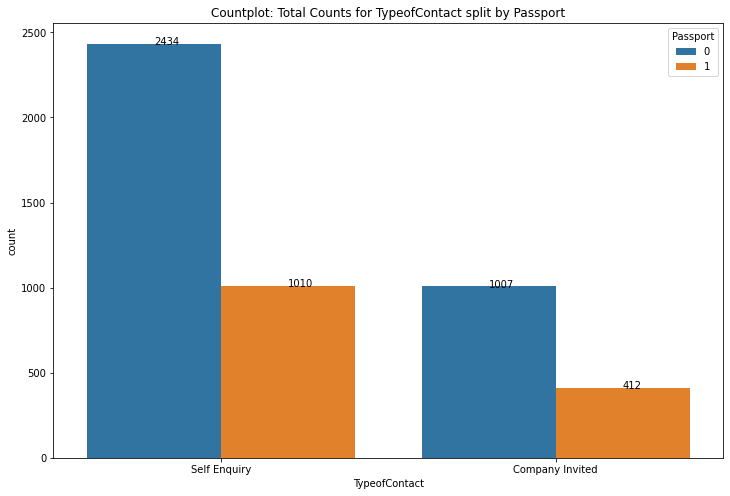

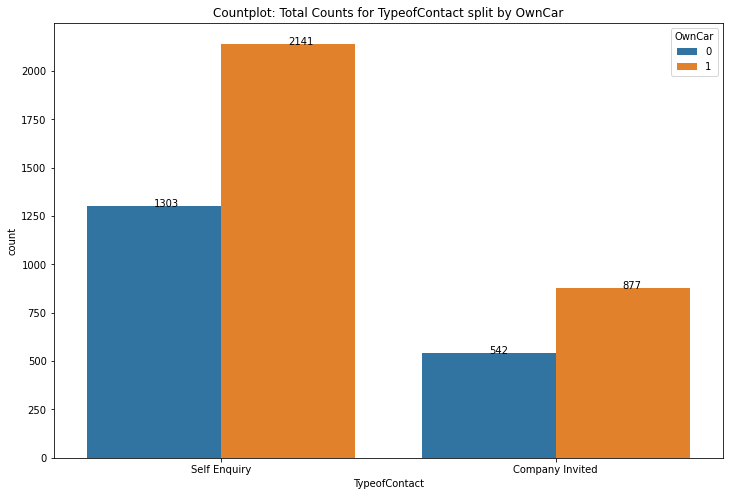

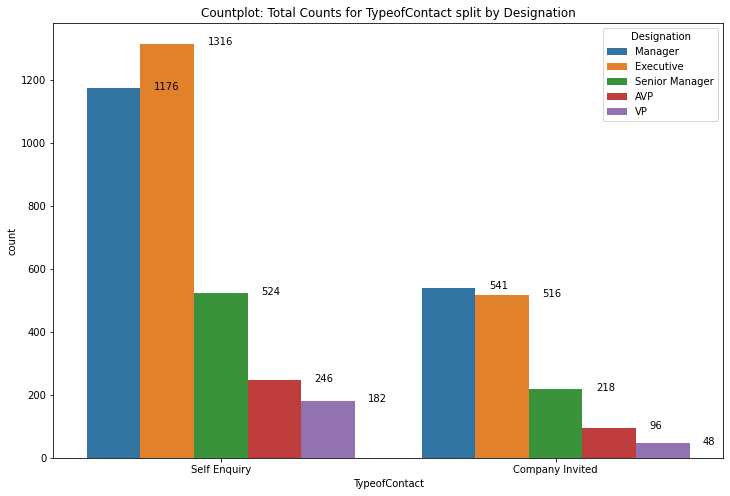

In [30]:
# Use Countplot to see the distribution of TypeofContact.

Temp_v='TypeofContact'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by CityTier')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='CityTier', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Occupation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Occupation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Gender')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Gender', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumberOfFollowups')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumberOfFollowups', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by ProductPitched')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'ProductPitched', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by PreferredPropertyStar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'PreferredPropertyStar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by MaritalStatus')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'MaritalStatus', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()



* Of all the customers who initiated the enquiry, most were Managers and Executives 
* Majority of the customers in Tier 1 cities initiated the enquiry
* Managers and Small Business owners have initiated the contact
* All other patterns are similar to ones identified above for ProdTaken

### 8a.4. CityTier

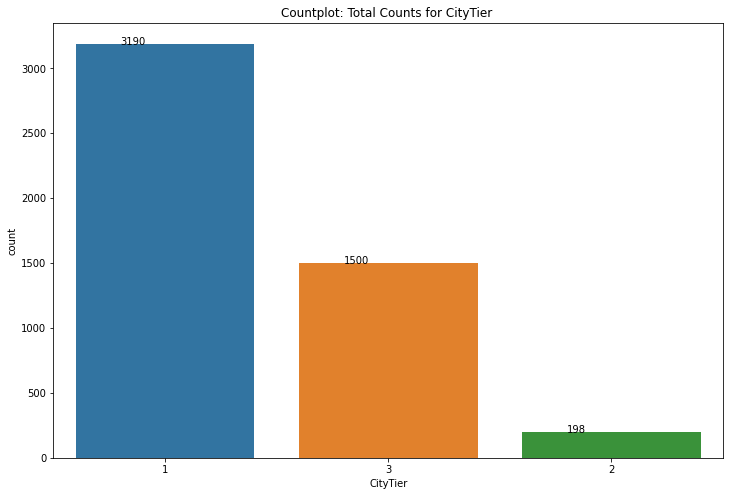

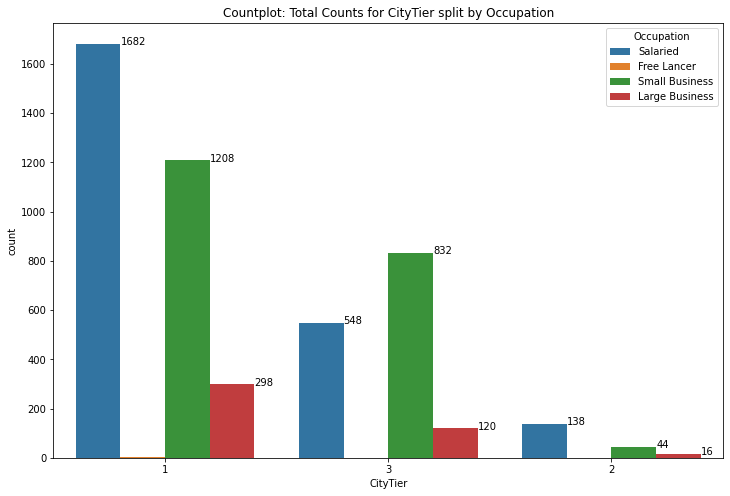

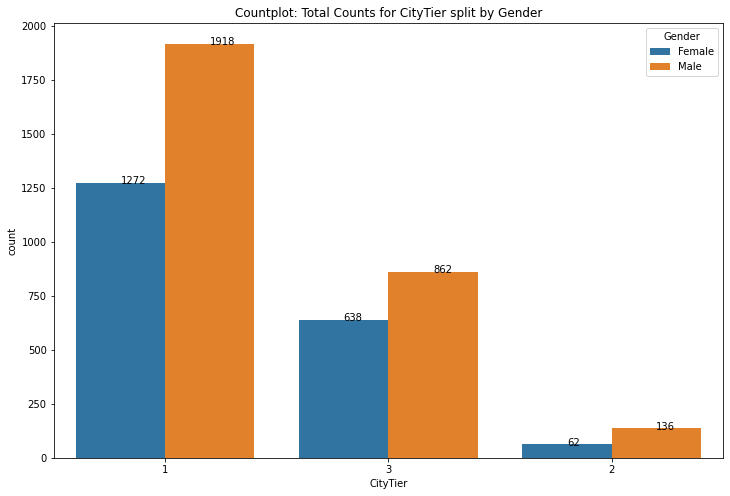

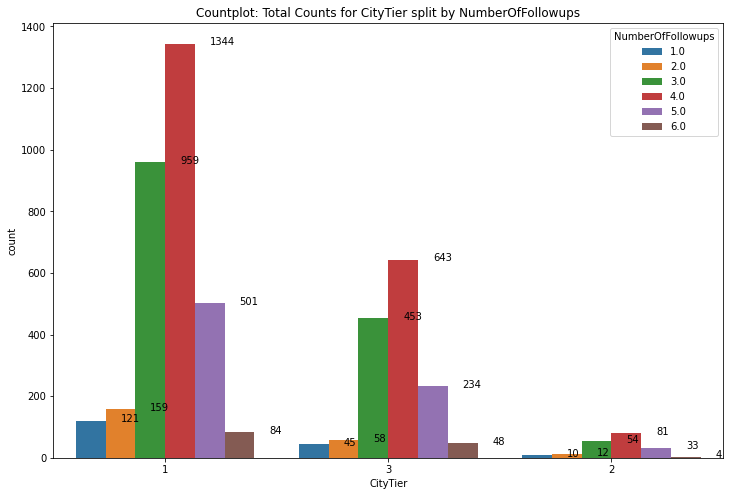

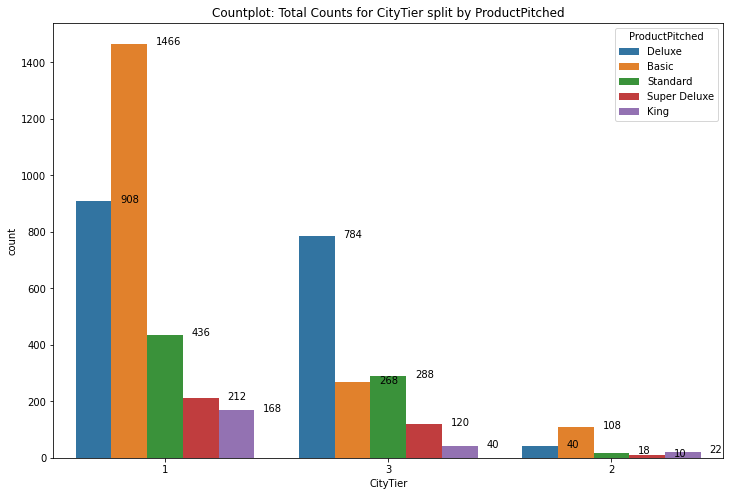

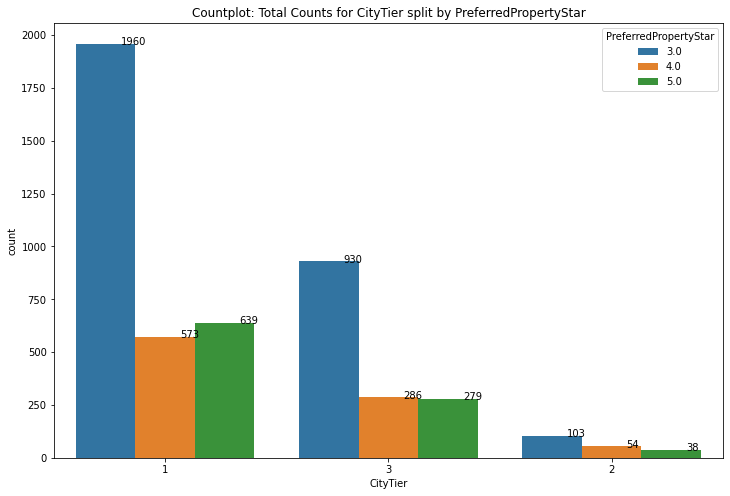

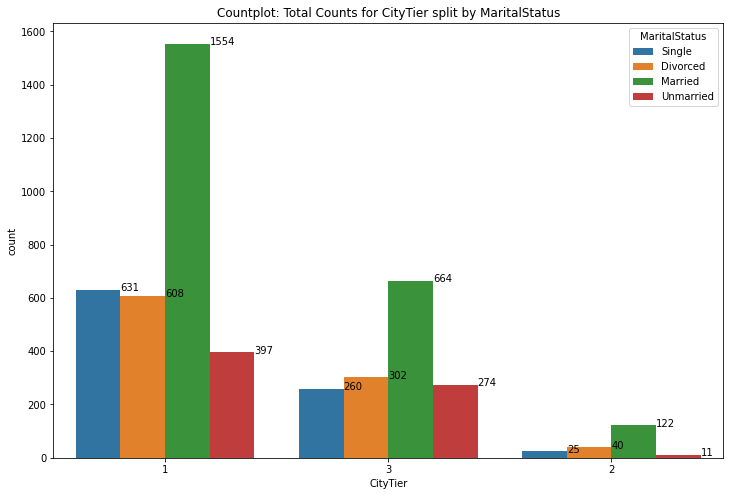

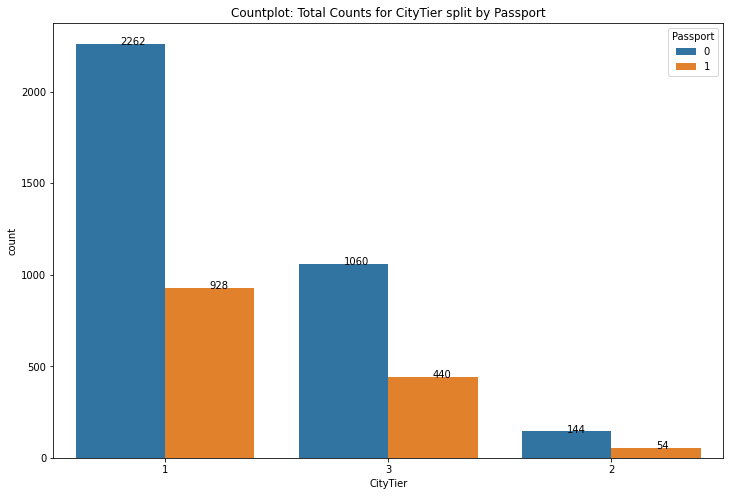

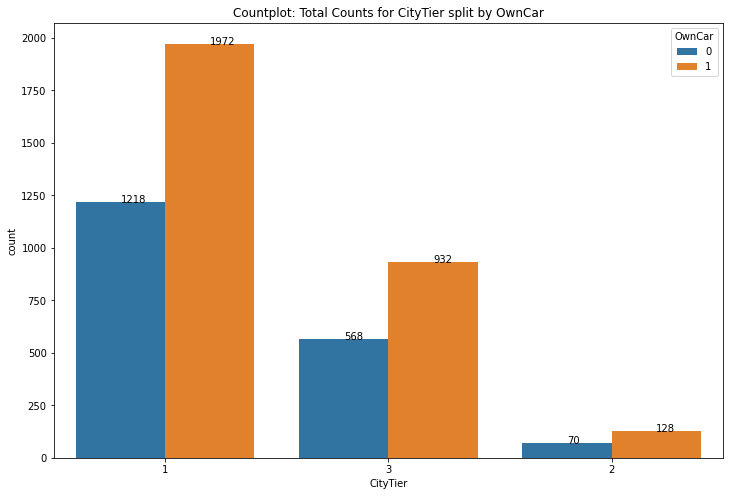

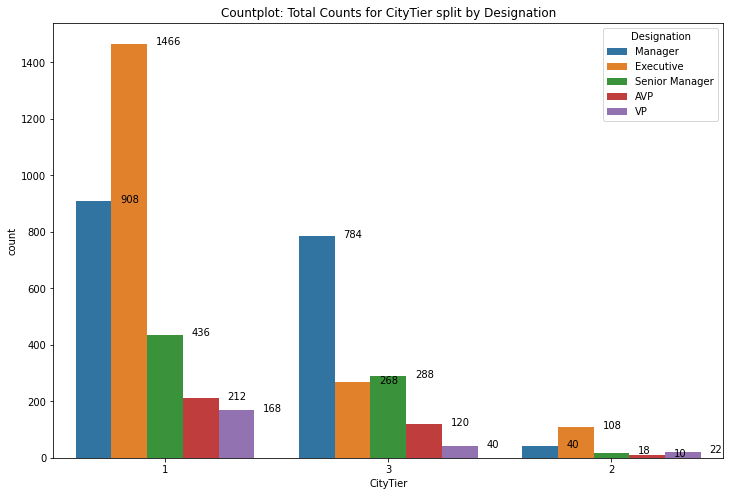

In [31]:
# Use Countplot to see the distribution of CityTier.

Temp_v='CityTier'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Occupation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Occupation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Gender')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Gender', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumberOfFollowups')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumberOfFollowups', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by ProductPitched')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'ProductPitched', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by PreferredPropertyStar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'PreferredPropertyStar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by MaritalStatus')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'MaritalStatus', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Tier 1 cities have the most customers
* Most customers are either - Salaried in Tier 1 cities OR Small Business owners in Tier 3 cities
* Basic, which is the most popular package is pitched mostly in Tier 1 cities, why not in other tier cities?

### 8a.5. DurationOfPitch

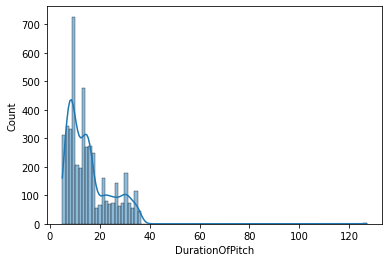

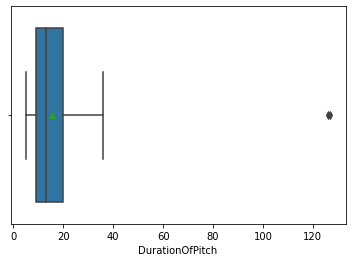

In [32]:
# Use histplots to see distribution for DurationOfPitch

sns.histplot(data=df,x='DurationOfPitch', kde=True)
plt.show()

sns.boxplot(data=df,x='DurationOfPitch', showmeans=True)
plt.show()

* Left skewed distribution, some outliers
* 75% of the pitch duration is less than 20 minutes

### 8a.6. Occupation

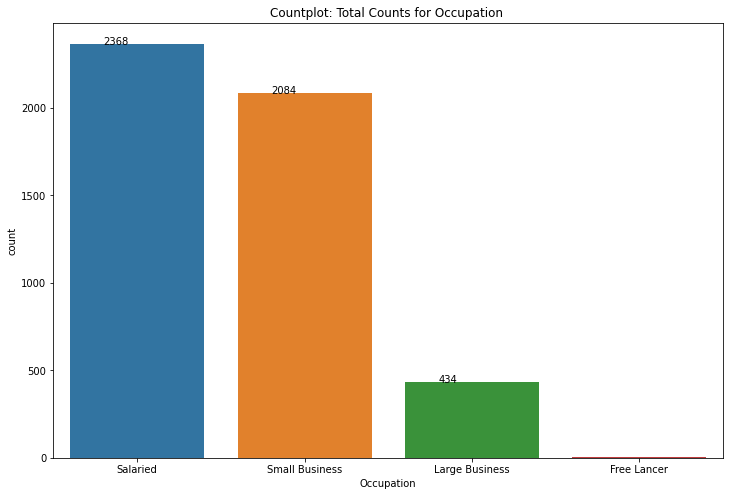

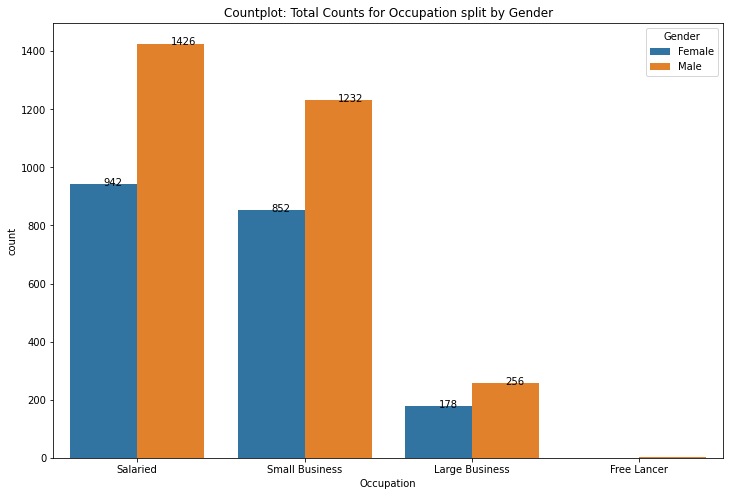

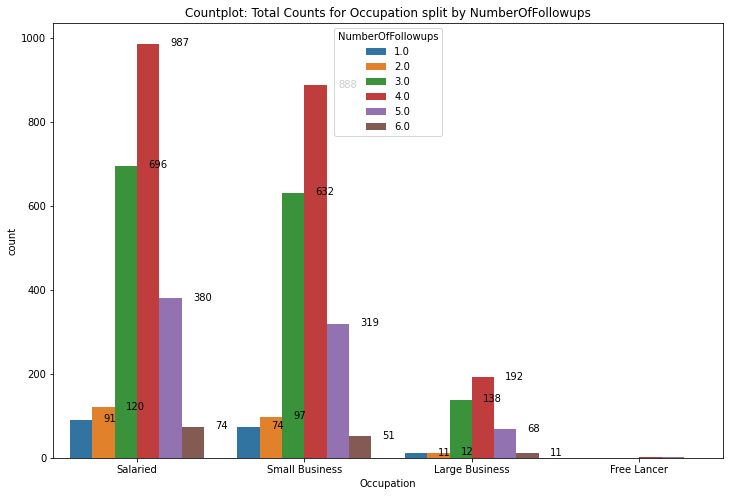

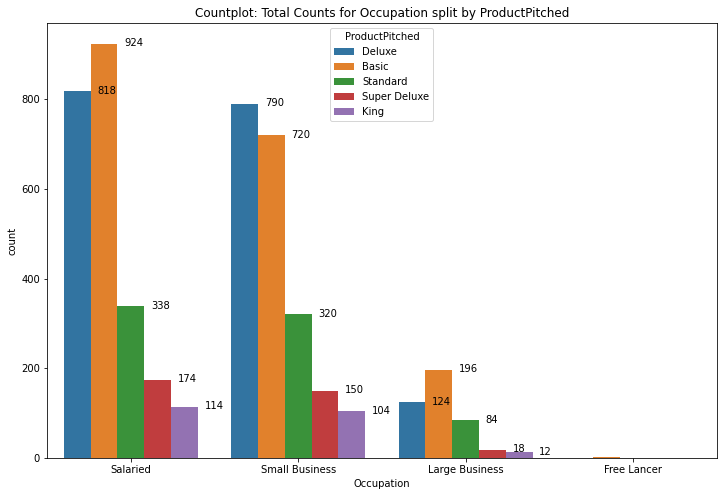

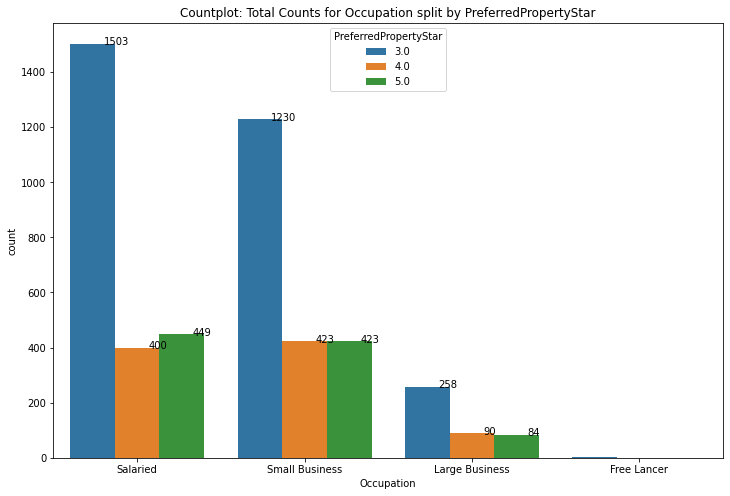

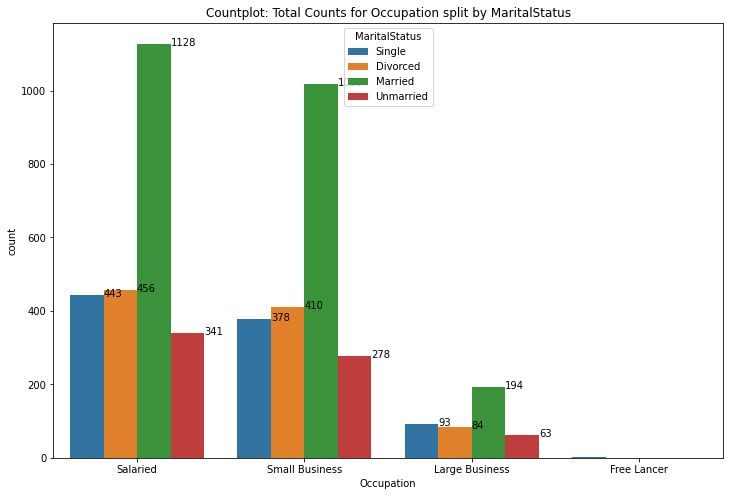

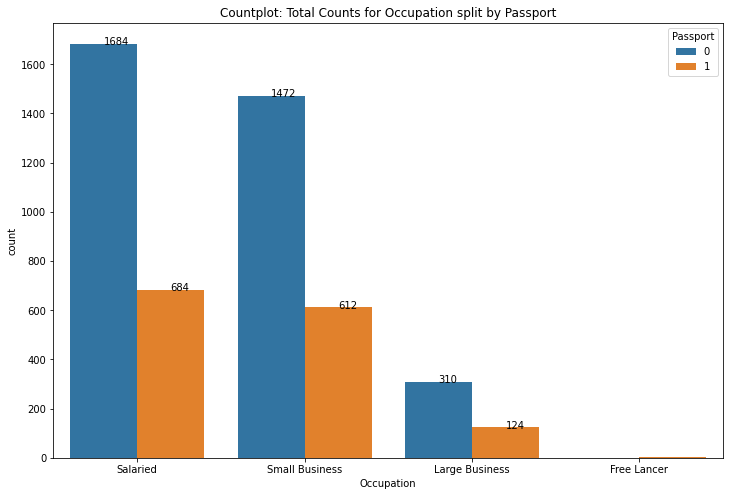

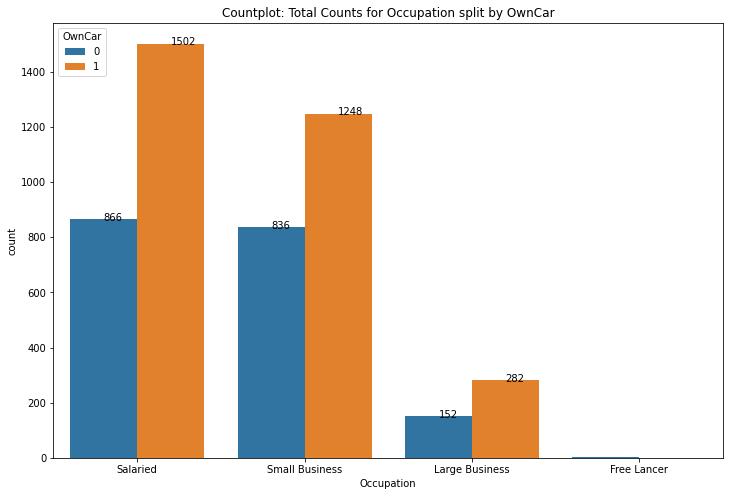

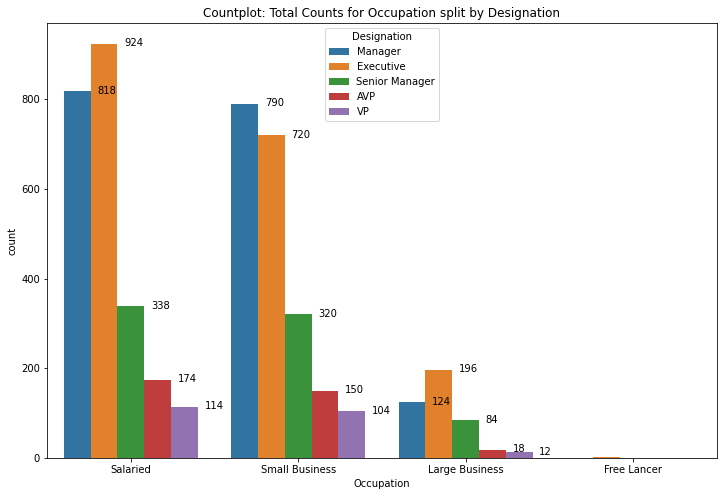

In [33]:
# Use Countplot to see the distribution of Occupation.

Temp_v='Occupation'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Gender')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Gender', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumberOfFollowups')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumberOfFollowups', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by ProductPitched')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'ProductPitched', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by PreferredPropertyStar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'PreferredPropertyStar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by MaritalStatus')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'MaritalStatus', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Salaried and Small Business owners are majority of the customers. Among those majority are females

### 8a.7. Gender

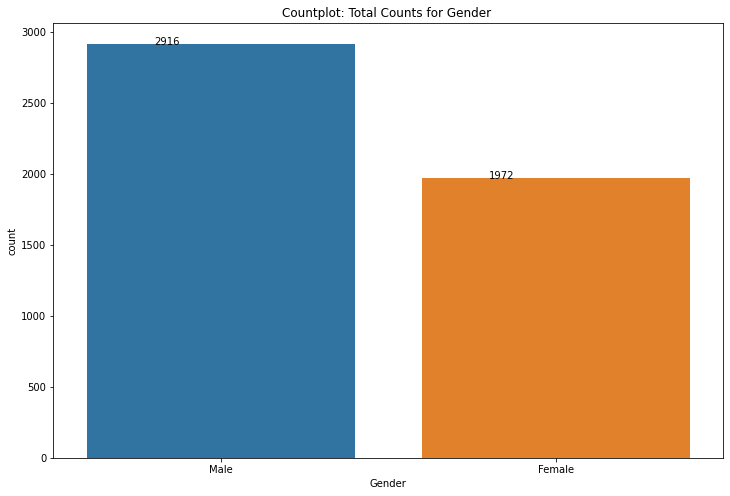

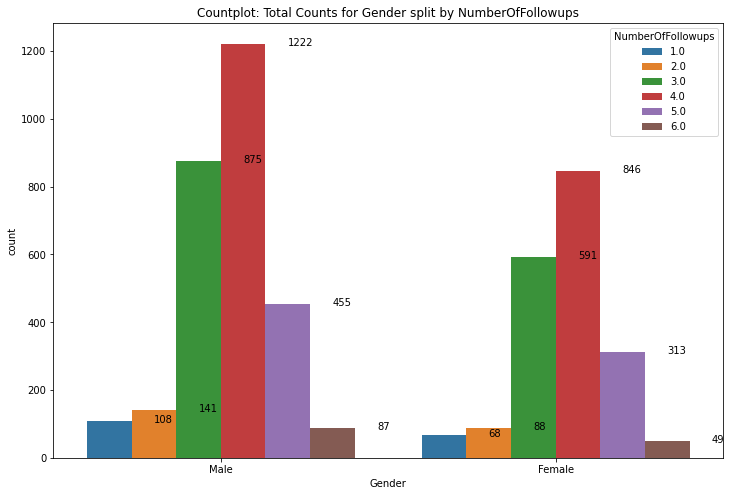

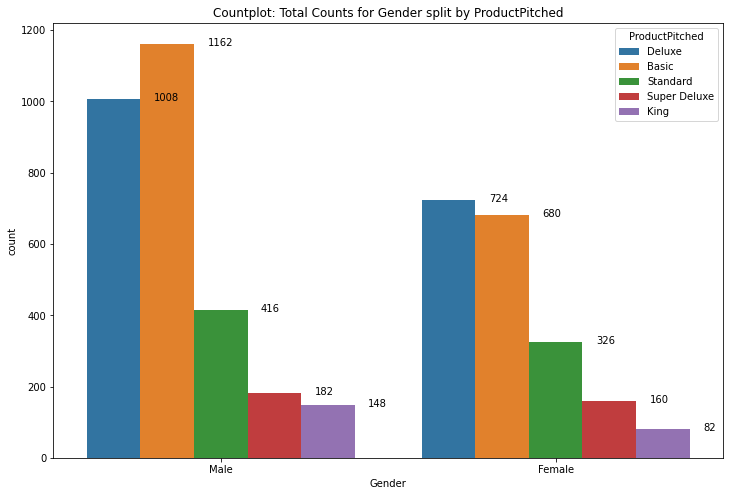

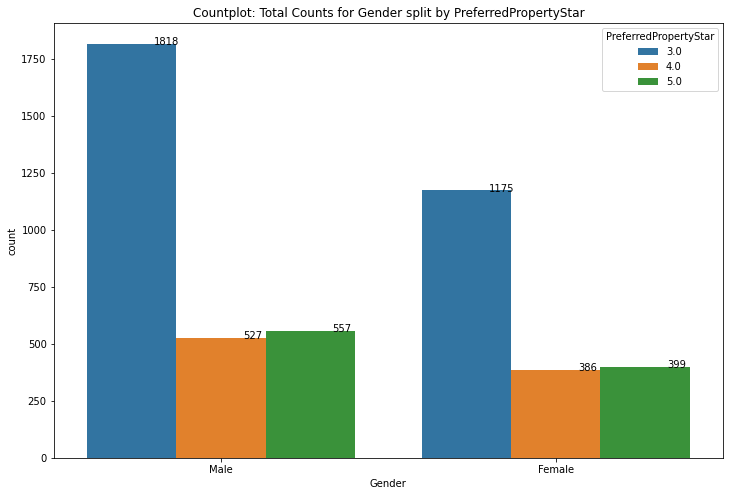

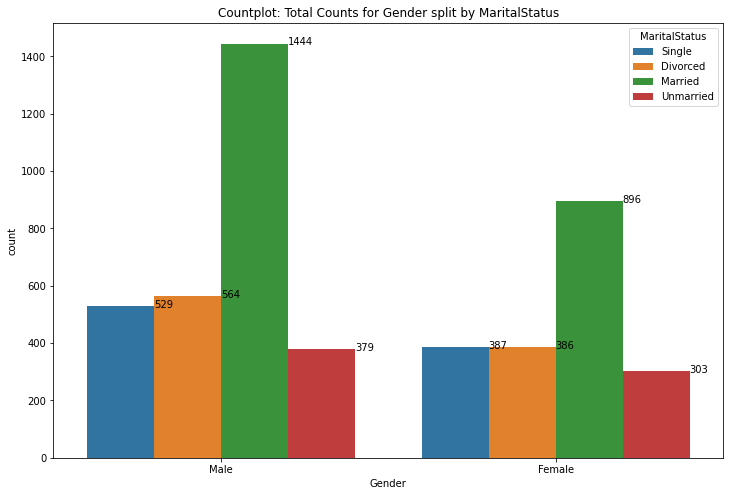

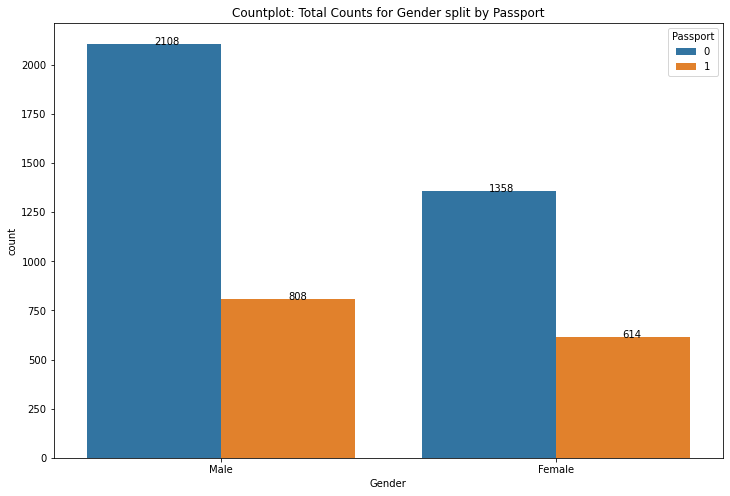

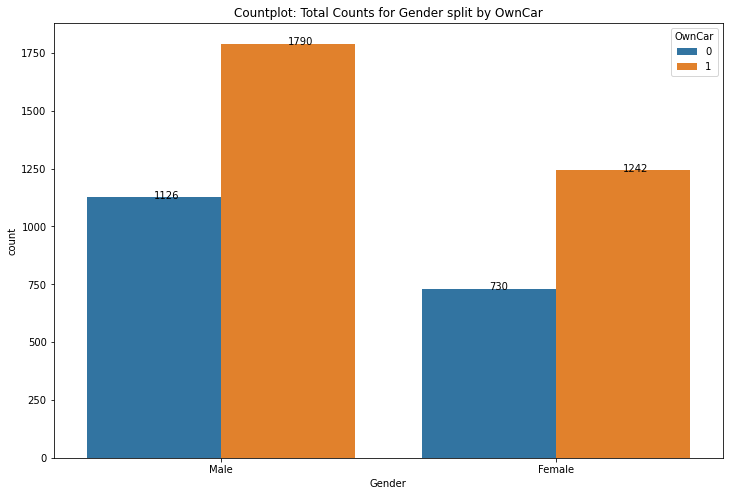

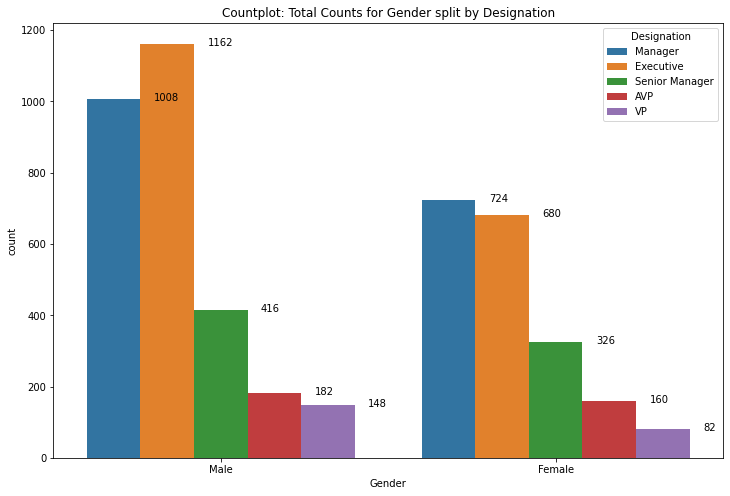

In [34]:
# Use Countplot to see the distribution of Gender.

Temp_v='Gender'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumberOfFollowups')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumberOfFollowups', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by ProductPitched')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'ProductPitched', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by PreferredPropertyStar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'PreferredPropertyStar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by MaritalStatus')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'MaritalStatus', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* More Male customers than Female
* Deluxe package was pitched the most to Females

### 8a.8. NumberOfPersonVisiting

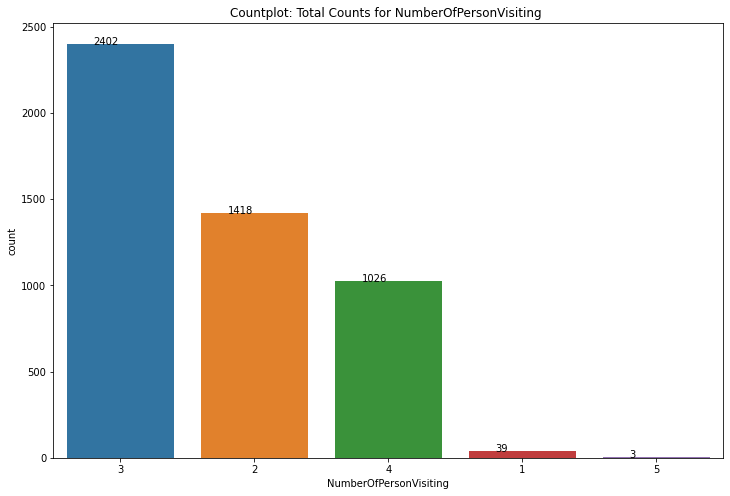

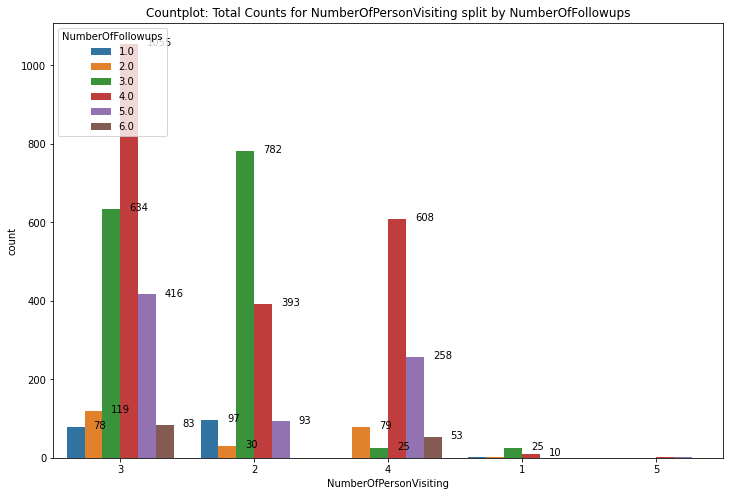

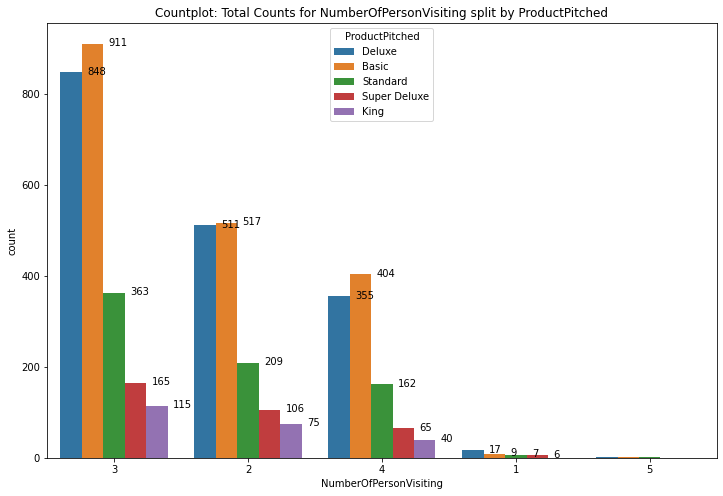

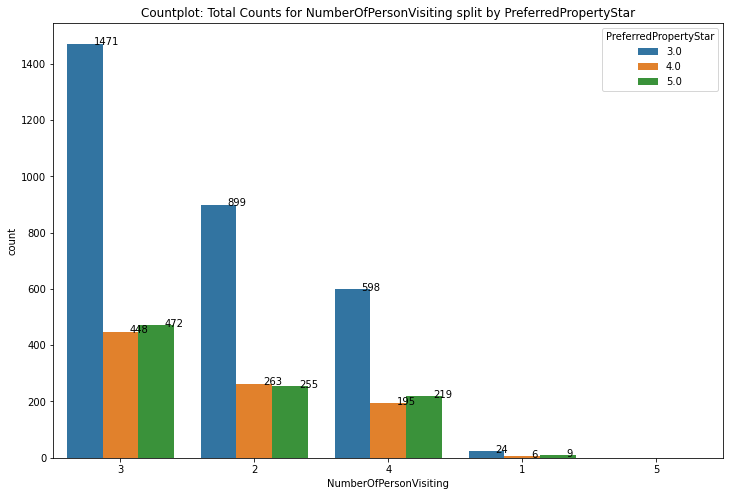

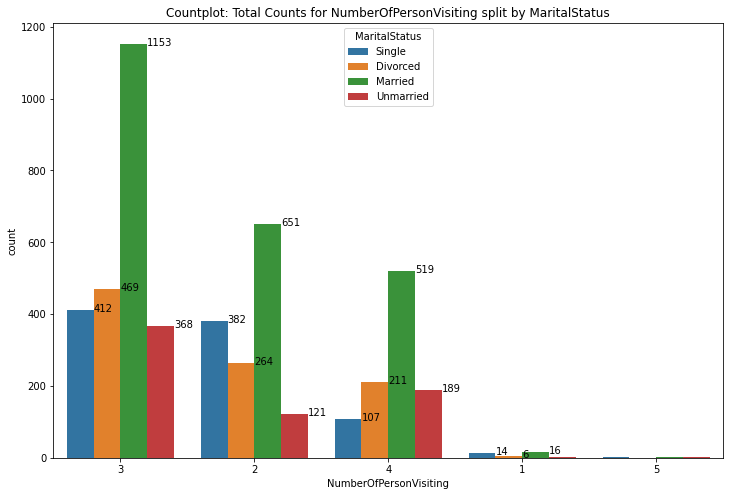

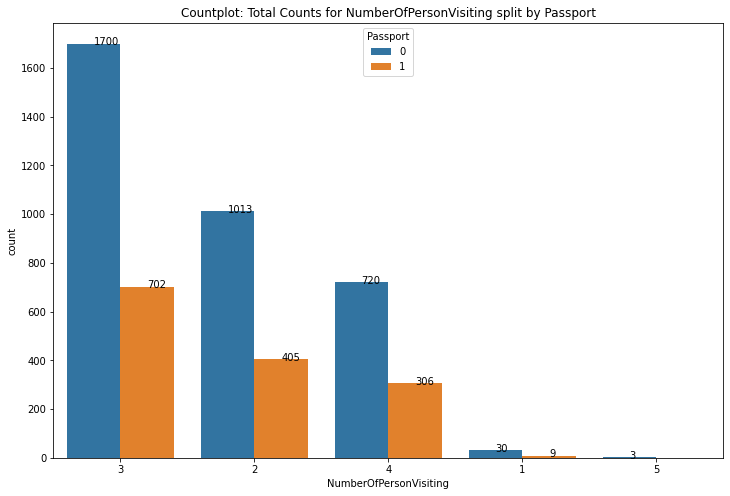

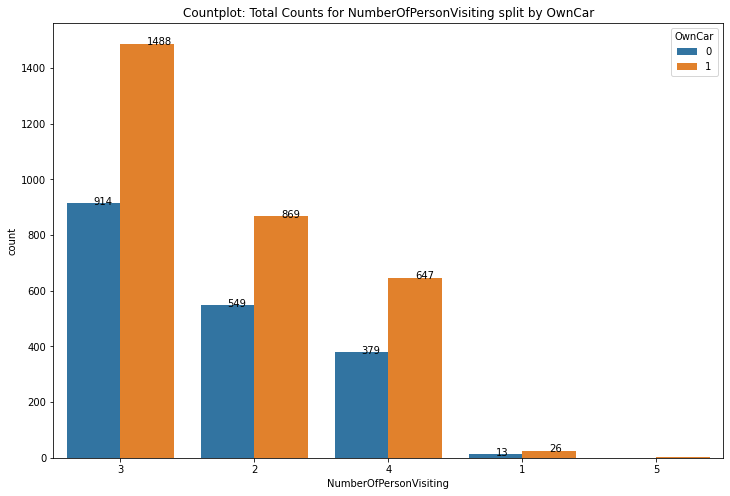

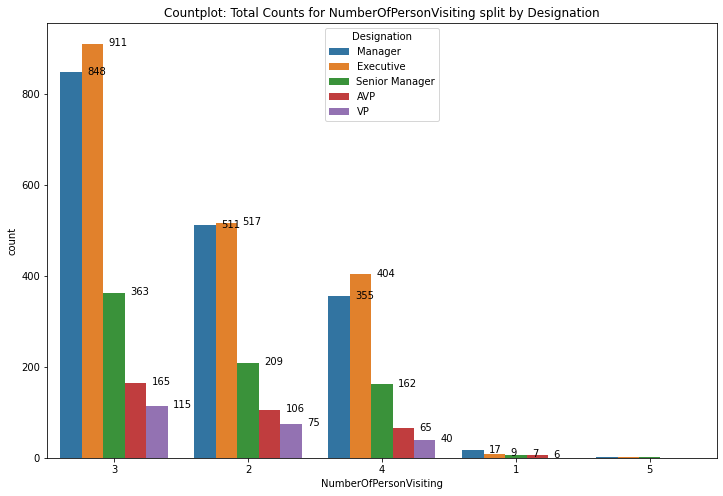

In [35]:
# Use Countplot to see the distribution of NumberOfPersonVisiting.

Temp_v='NumberOfPersonVisiting'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumberOfFollowups')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumberOfFollowups', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by ProductPitched')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'ProductPitched', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by PreferredPropertyStar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'PreferredPropertyStar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by MaritalStatus')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'MaritalStatus', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Most customers have a group of 3


### 8a.9. NumberOfFollowups

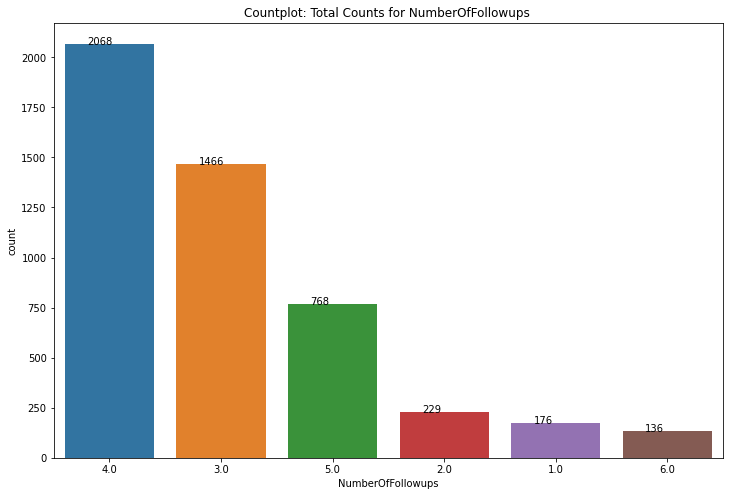

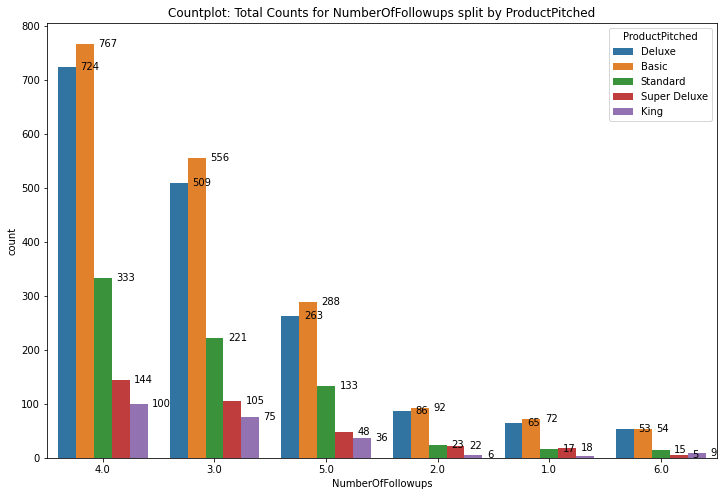

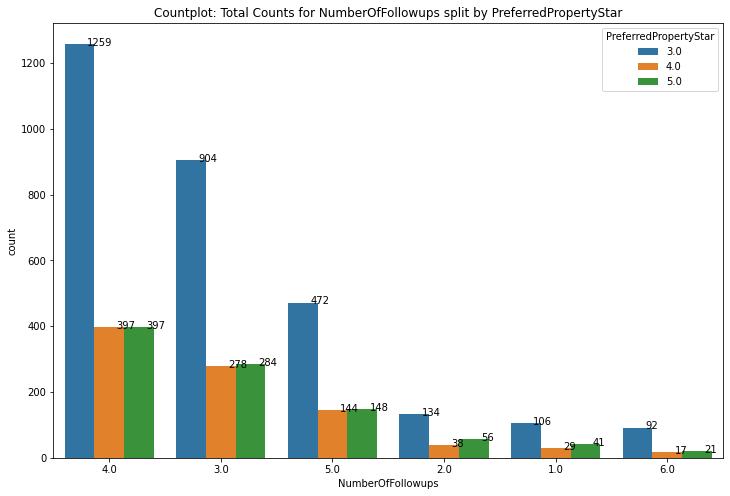

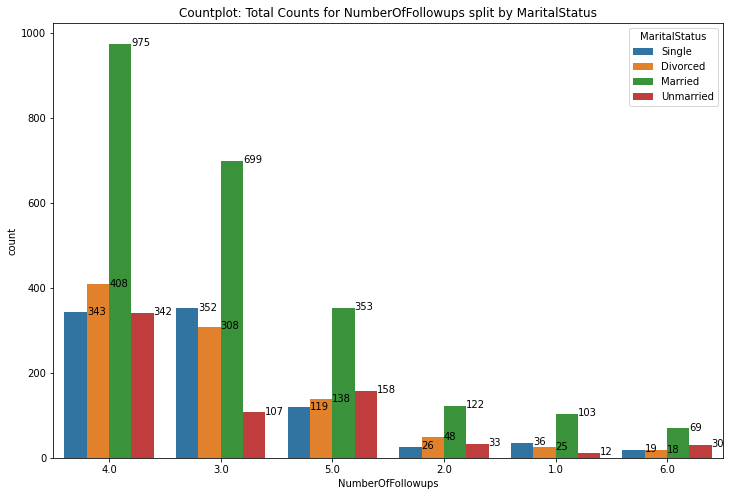

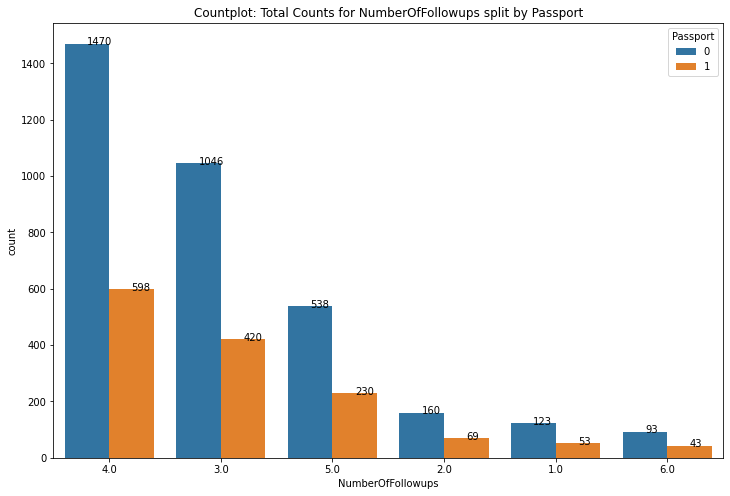

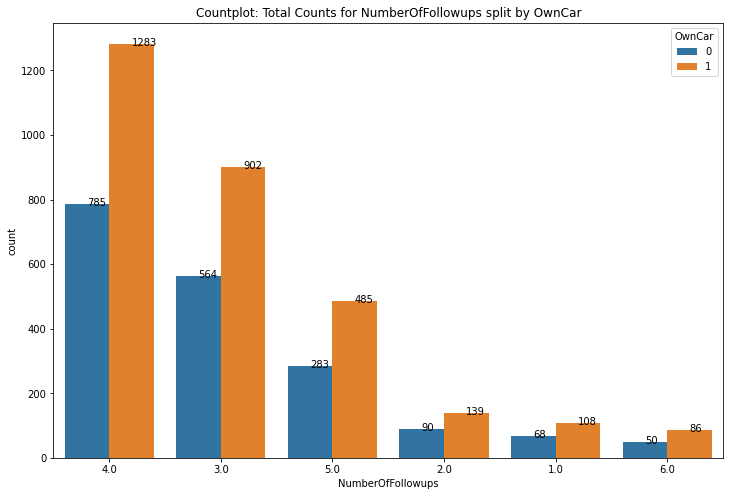

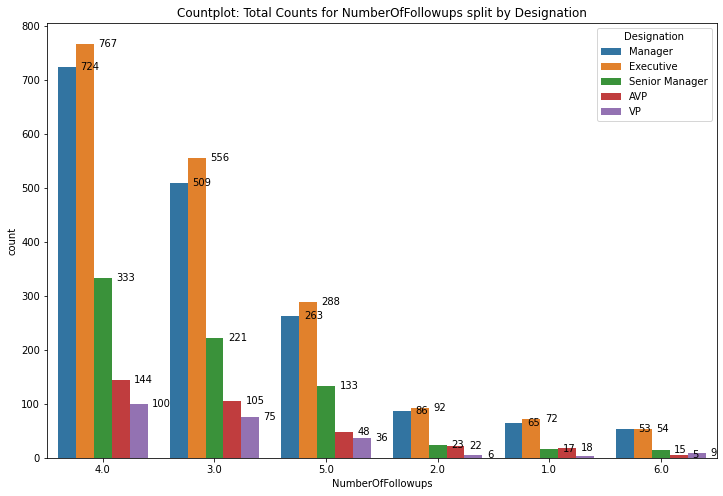

In [36]:
# Use Countplot to see the distribution of NumberOfFollowups.

Temp_v='NumberOfFollowups'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by ProductPitched')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'ProductPitched', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by PreferredPropertyStar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'PreferredPropertyStar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by MaritalStatus')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'MaritalStatus', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* 3 and 4 times follow-up seems to be the norm
* Executives need more follow-up than other designations

### 8a.10. ProductPitched

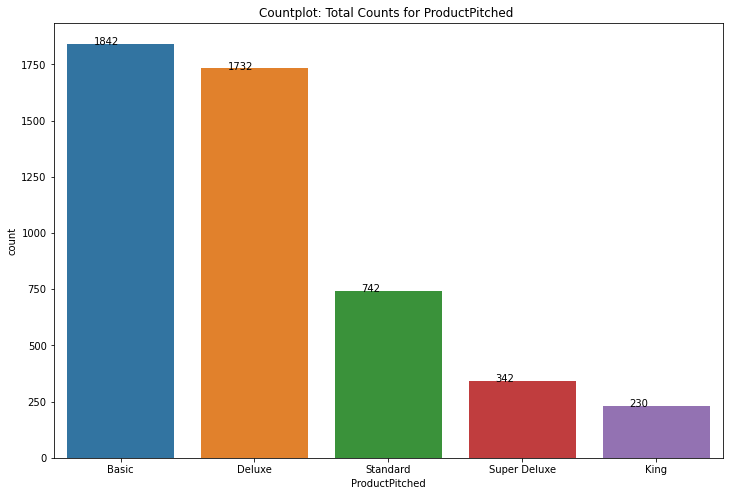

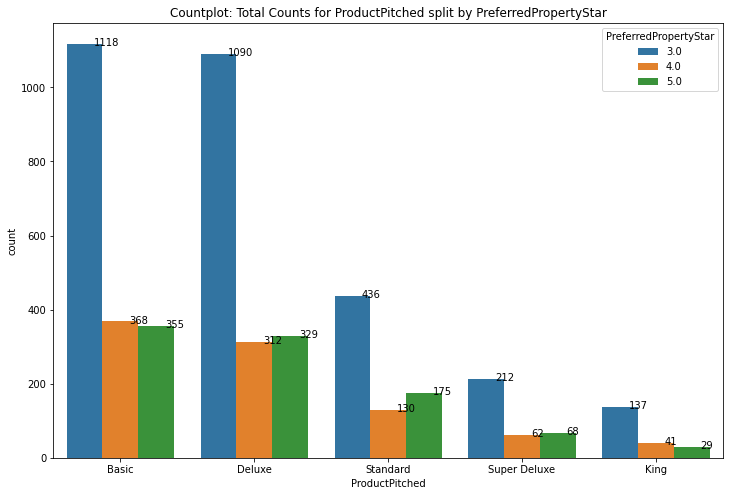

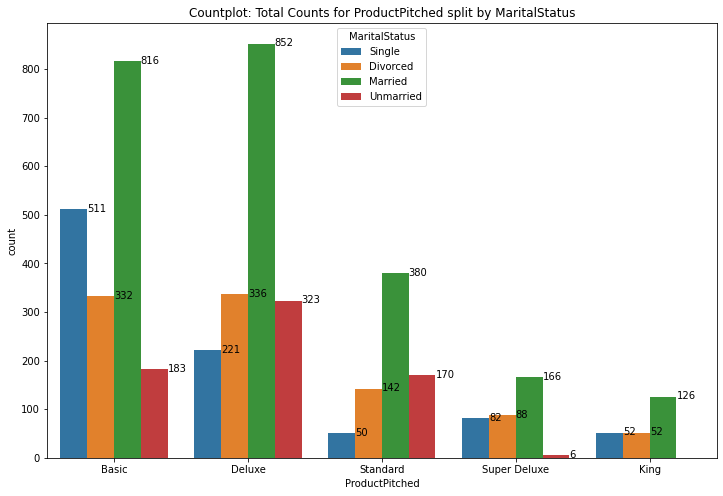

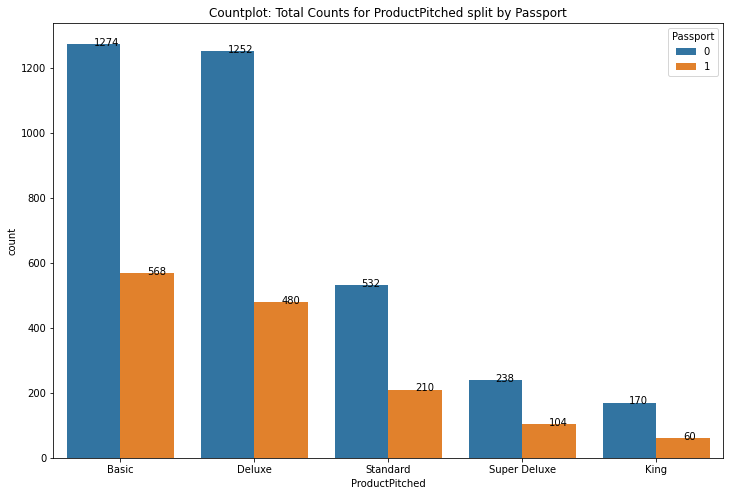

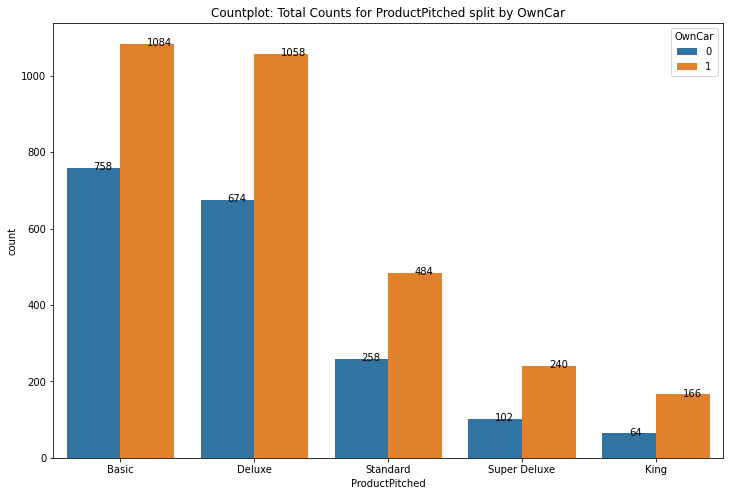

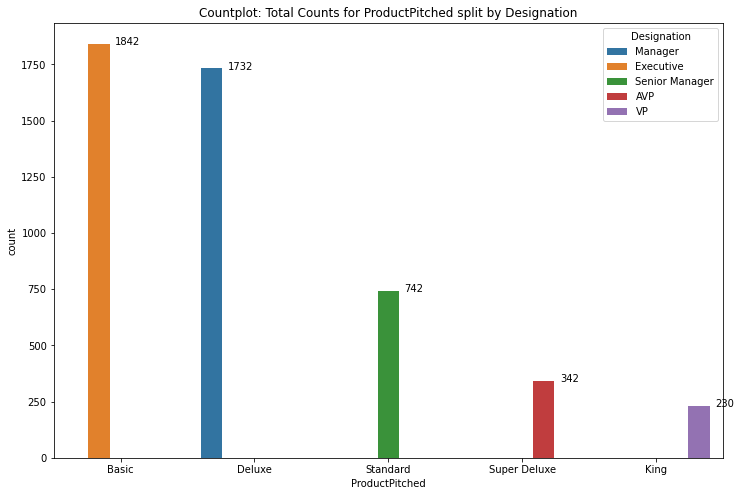

In [37]:
# Use Countplot to see the distribution of ProductPitched.

Temp_v='ProductPitched'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by PreferredPropertyStar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'PreferredPropertyStar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by MaritalStatus')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'MaritalStatus', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Basic and Deluxe are the most pitched packages
* Irrespective of the package, 3 star is most preferred

### 8a.11. PreferredPropertyStar

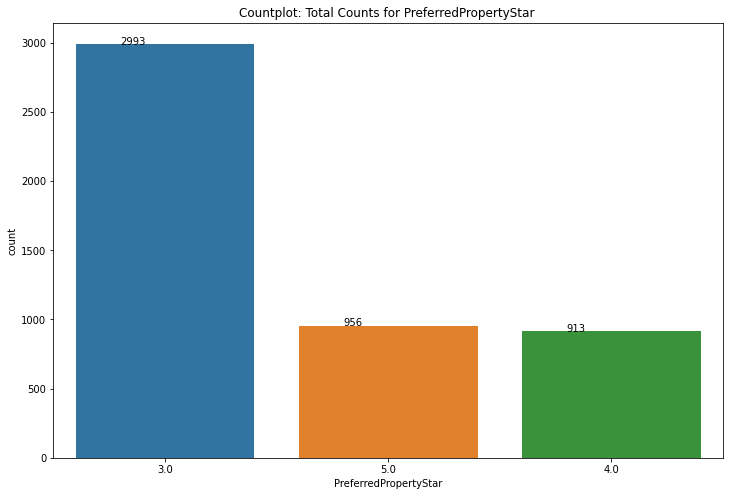

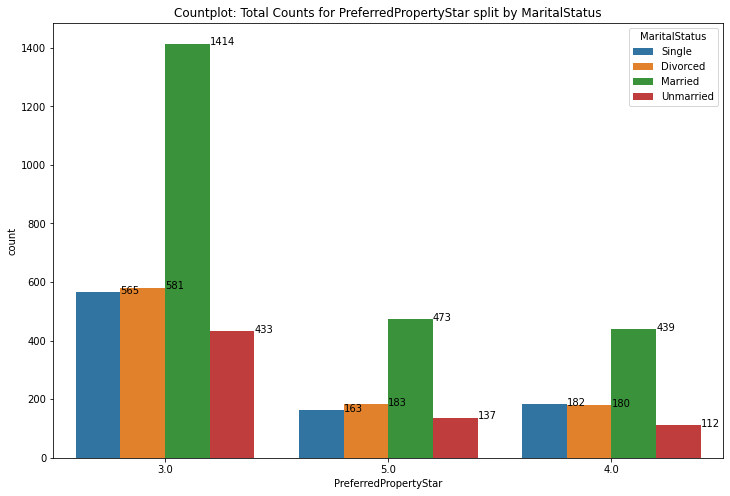

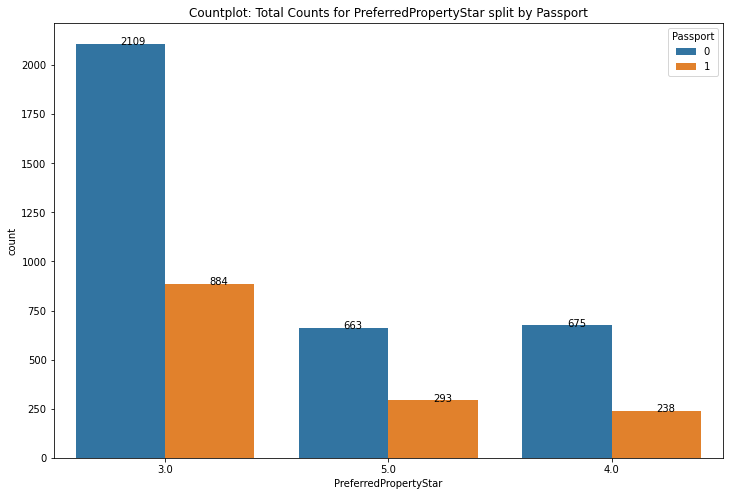

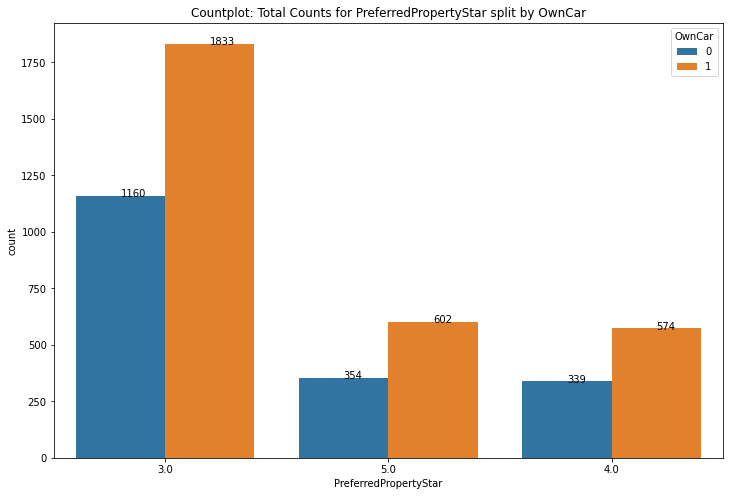

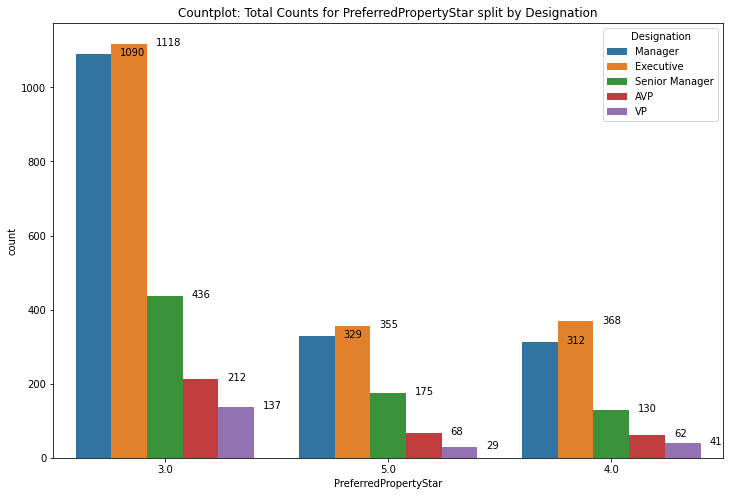

In [38]:
# Use Countplot to see the distribution of PreferredPropertyStar.

Temp_v='PreferredPropertyStar'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by MaritalStatus')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'MaritalStatus', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* 3 star properties are the most popular


### 8a.12. MaritalStatus

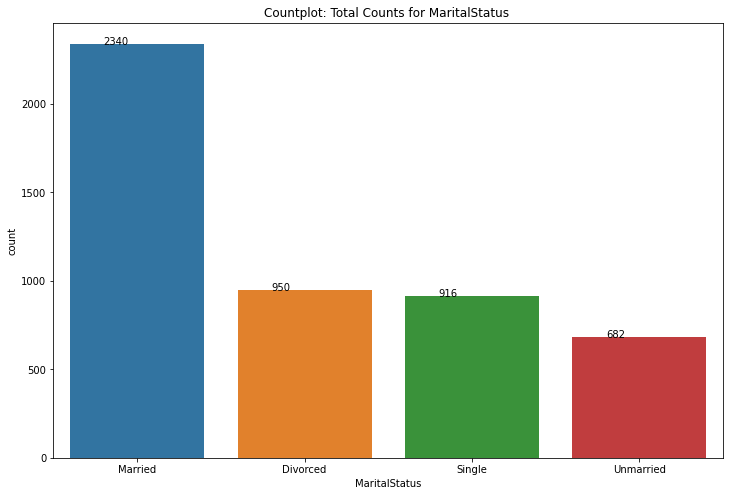

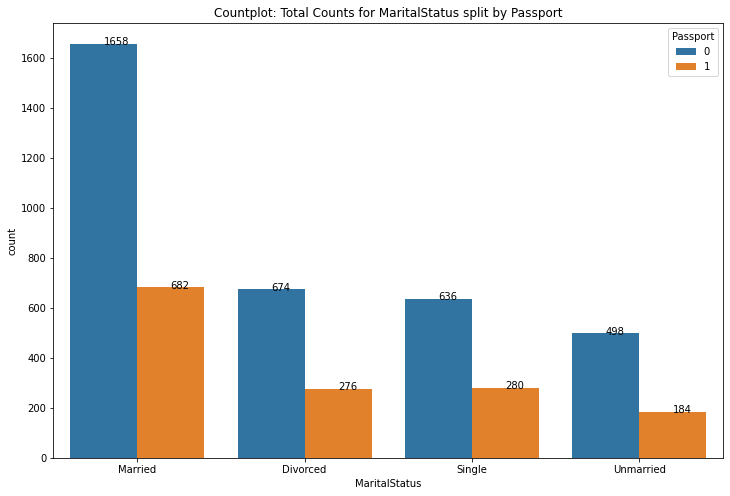

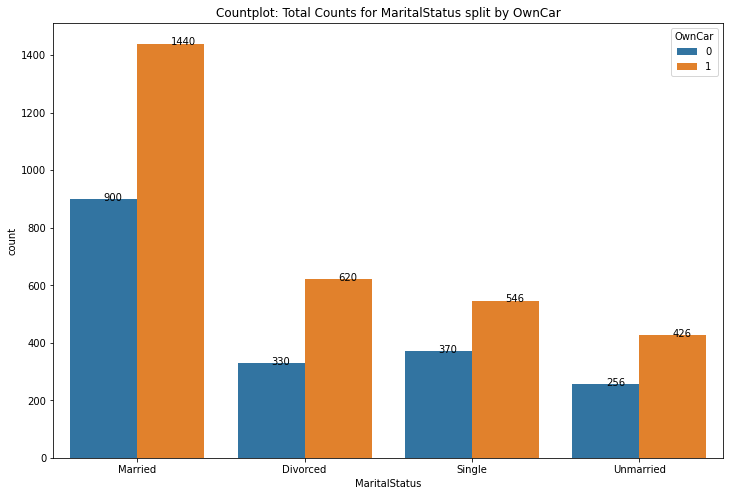

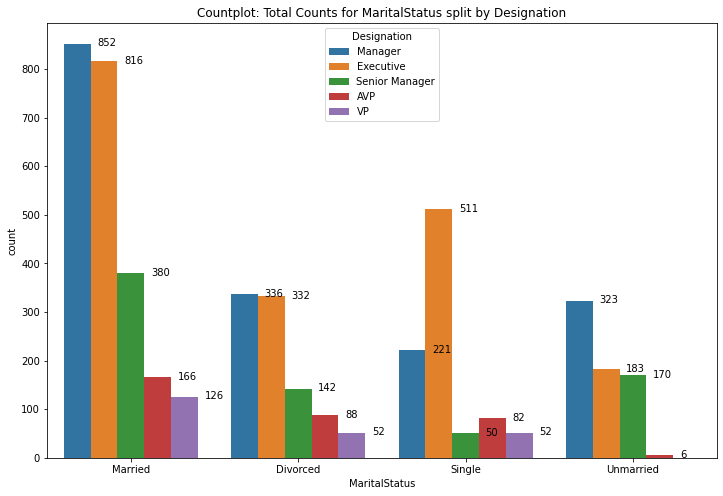

In [39]:
# Use Countplot to see the distribution of MaritalStatus.

Temp_v='MaritalStatus'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Passport')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Passport', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Manager and Executive are most common designations, in that order
* Single customers have disproportionate number of Executives

### 8a.13. NumberOfTrips

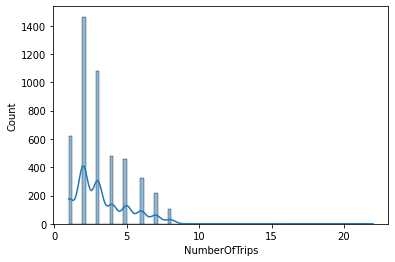

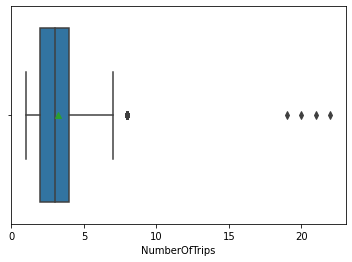

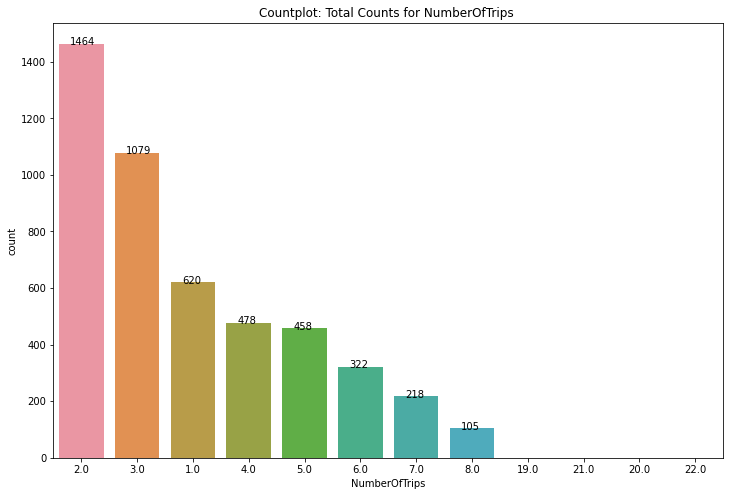

In [40]:
# Use histplots to see distribution for NumberOfTrips

sns.histplot(data=df,x='NumberOfTrips', kde=True)
plt.show()

sns.boxplot(data=df,x='NumberOfTrips', showmeans=True)
plt.show()

Temp_v = 'NumberOfTrips'
plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Most common number of trips are 2 & 3
* There are some outliers with significantly high number of trips

### 8a.14. Passport

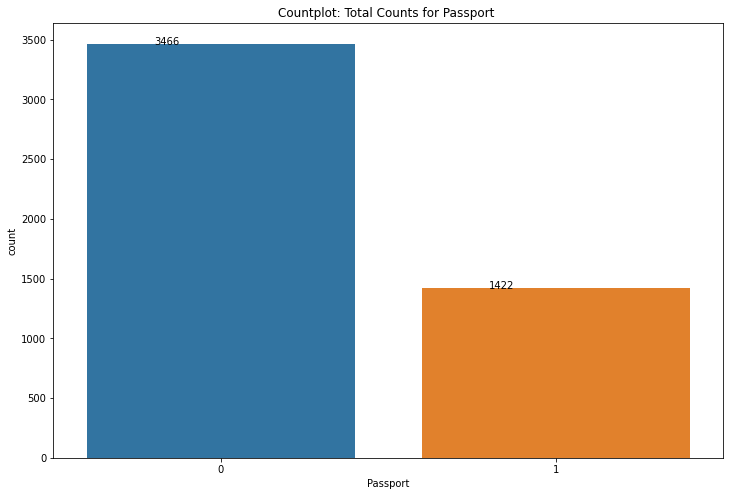

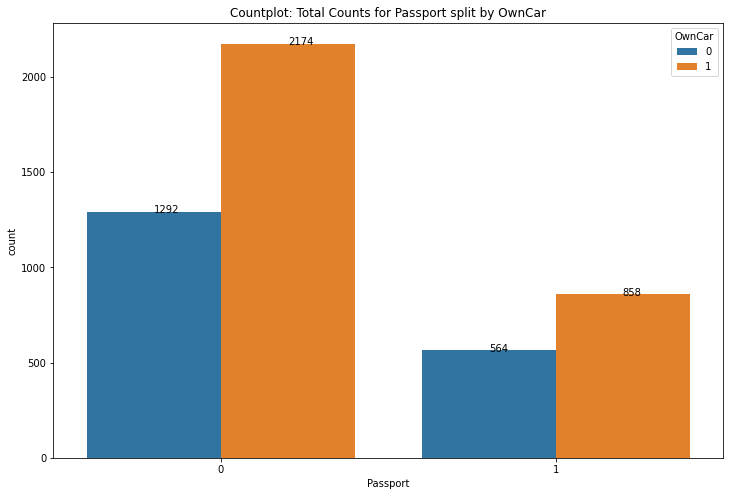

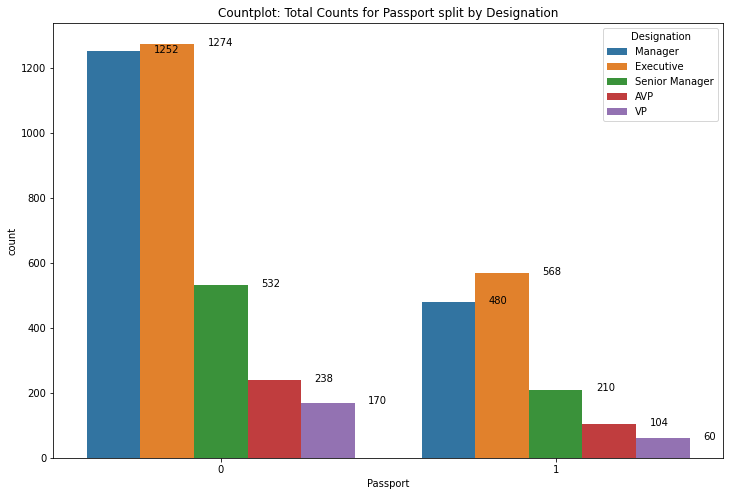

In [41]:
# Use Countplot to see the distribution of Passport.

Temp_v='Passport'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by OwnCar')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'OwnCar', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Majority customers do not have passport

### 8a.15. PitchSatisfactionScore

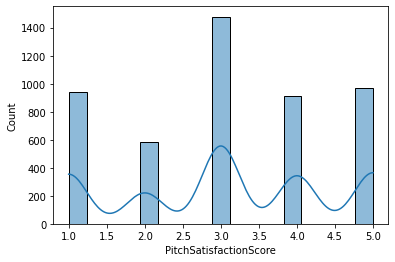

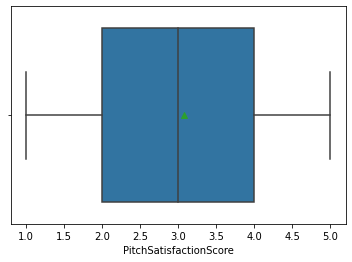

In [42]:
# Use histplots to see distribution for PitchSatisfactionScore

sns.histplot(data=df,x='PitchSatisfactionScore', kde=True)
plt.show()

sns.boxplot(data=df,x='PitchSatisfactionScore', showmeans=True)
plt.show()

* 50% of the pitch scores are equal to or more than 3

### 8a.16. OwnCar

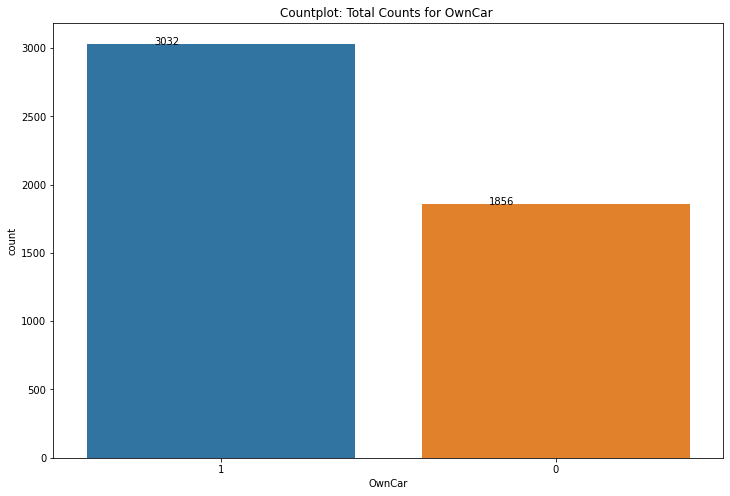

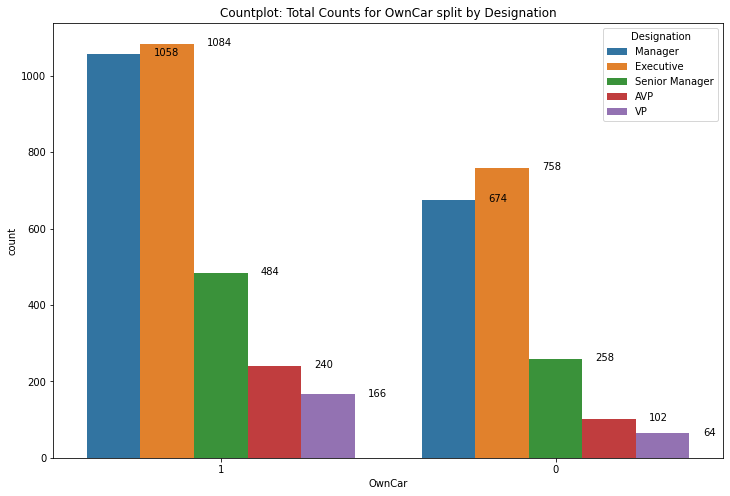

In [43]:
# Use Countplot to see the distribution of OwnCar.

Temp_v='OwnCar'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Most customers do have a car

### 8a.17. NumberOfChildrenVisiting

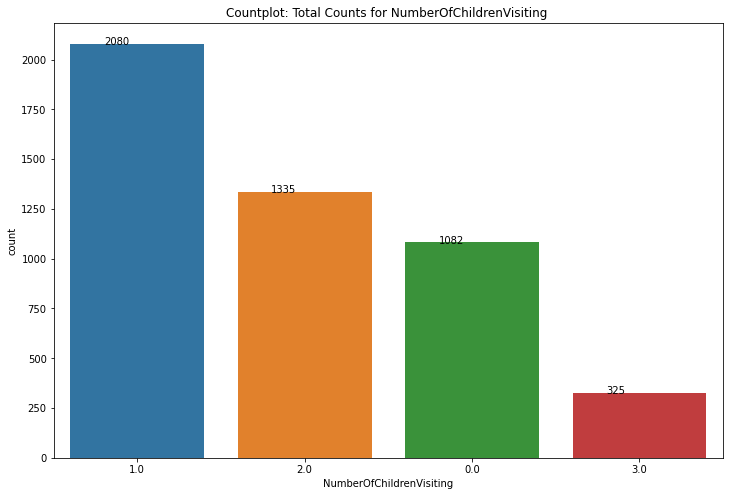

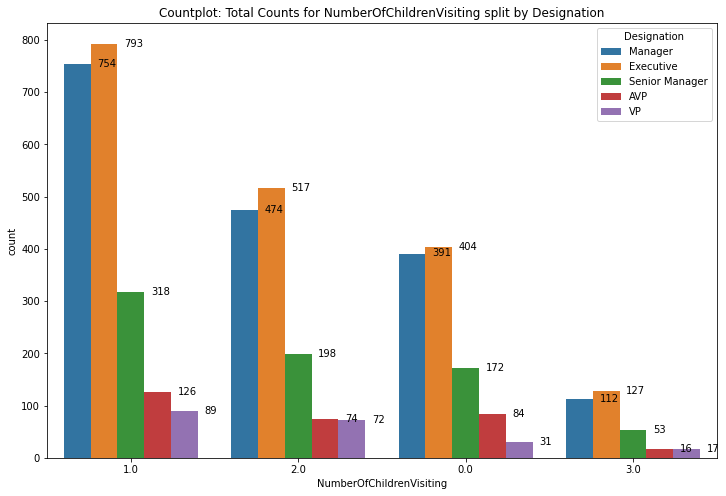

In [44]:
# Use Countplot to see the distribution of NumberOfChildrenVisiting.

Temp_v='NumberOfChildrenVisiting'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Designation')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Designation', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Significant number of customers have 1 or 2 children under 5 in the group

### 8a.18. Designation

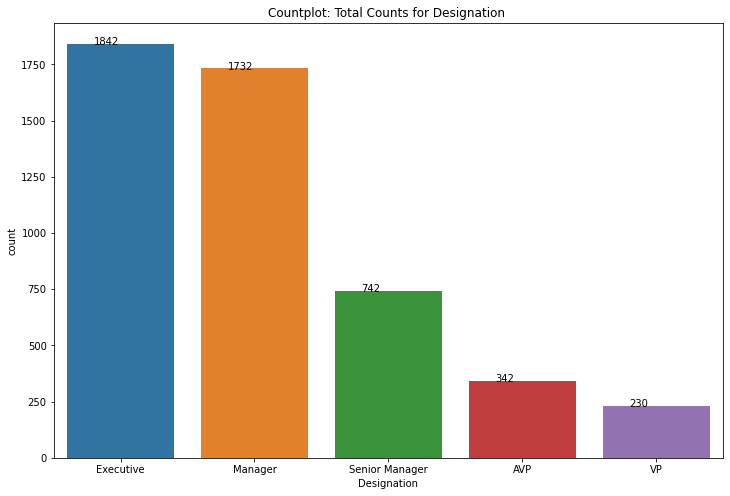

In [45]:
# Use Countplot to see the distribution of Designation.

Temp_v='Designation'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Manager and Executive are most common designations, in that order

### 8a.19. MonthlyIncome

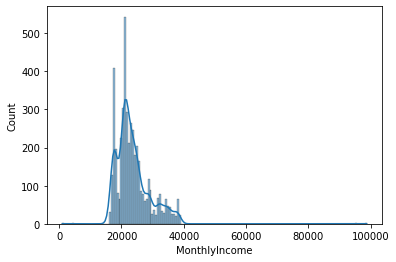

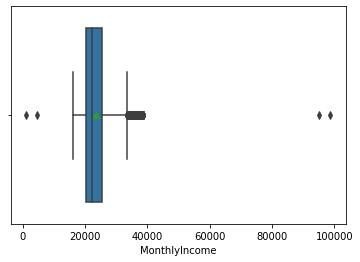

In [46]:
# Use histplots to see distribution for MonthlyIncome

sns.histplot(data=df,x='MonthlyIncome', kde=True)
plt.show()

sns.boxplot(data=df,x='MonthlyIncome', showmeans=True)
plt.show()


* 50% of the customers have narrow range of salaries
* There are some lower as well as upper outliers

## 8b. EDA - Multivariate Analysis

Purpose of this analysis is to identify inter relationships between multiple features.

Main focus will be understaning relationships of several features with Price.

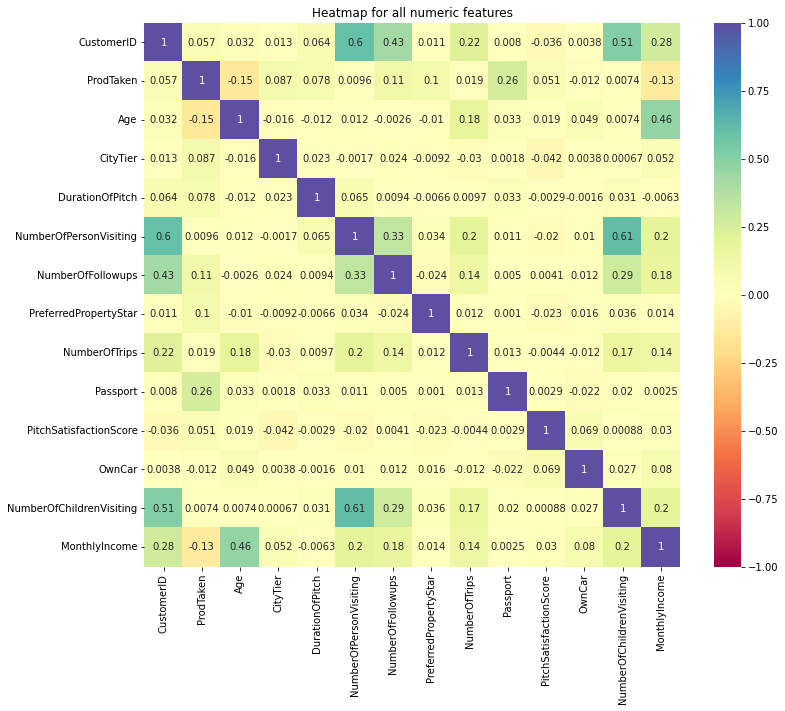

In [47]:
#Let's start with Heatmap to check relationships between all numeric features

plt.figure(figsize=(12,10))
plt.title('Heatmap for all numeric features')

sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observations

1. NO Strong corelation (>= 0.7 absolute value) exists between any features.
  
2. Moderately corelation (between 0.3 and 0.7 absolute value) exist between below features - 

  a. Age and MonthlyIncome - More age , more income

  b. NumberOfPersonVisiting and NumberofFollowups - Incidental corelation

  c. NumberOfPersonVisiting and NumberOfChildrenVisiting - Obvious

3. No strong or moderate negative corelation observed.

4. Corelations with CustomerID is not considered, it obviously incidental

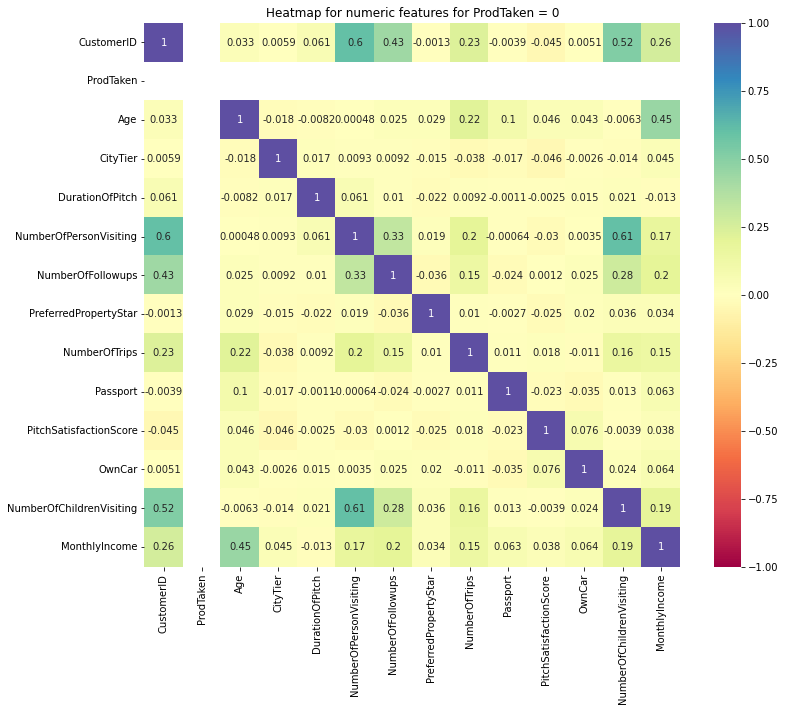

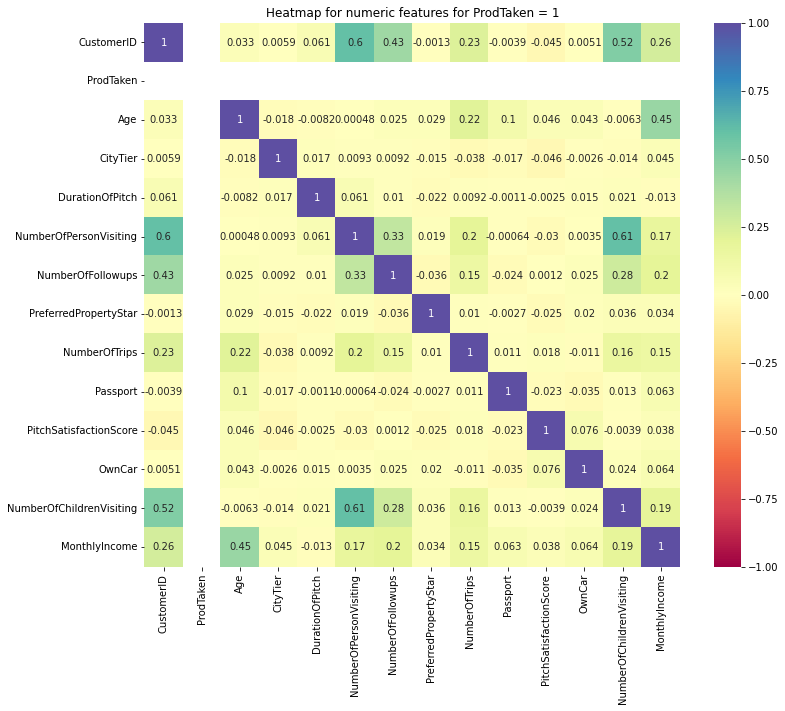

In [48]:
# Let's check Heatmap for numeric features, but for groups segregated by ProdTaken. This is to see if there are any different relationships for the customers who have purchased the product.

plt.figure(figsize=(12,10))
plt.title('Heatmap for numeric features for ProdTaken = 0')
sns.heatmap(df[df['ProdTaken'] == 0 ].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.figure(figsize=(12,10))
plt.title('Heatmap for numeric features for ProdTaken = 1')
sns.heatmap(df[df['ProdTaken'] == 0 ].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

No difference in the corelations based on whether customers have taken package or not

Let's check how ProdTaken and some other continuous numeric features are related.

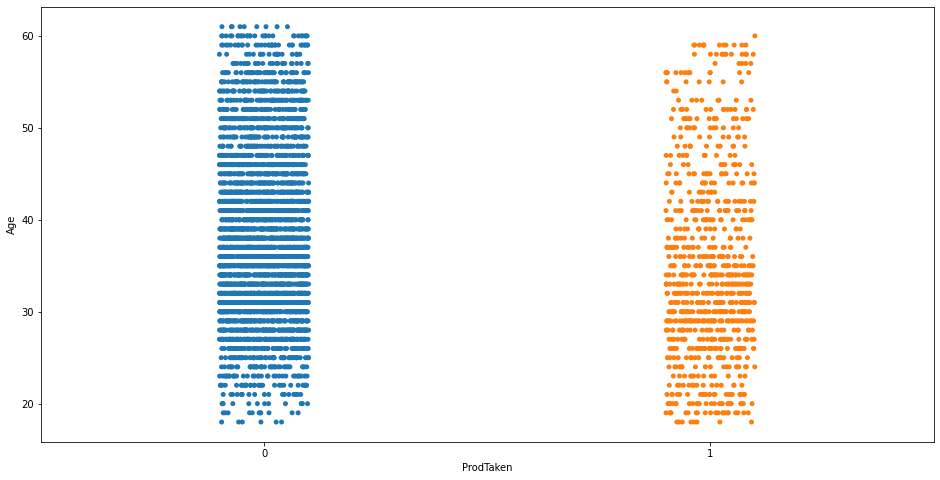

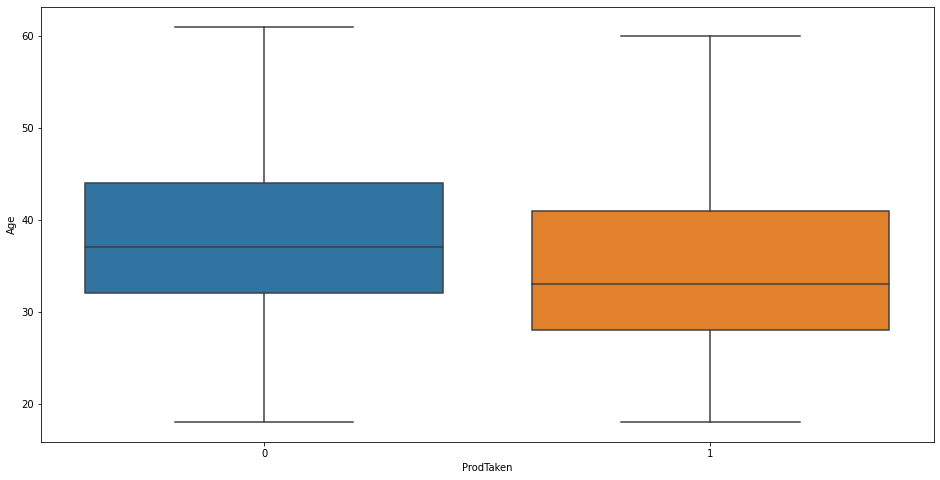

In [49]:
# Create stripplot for ProdTake and Age.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='ProdTaken', y='Age');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='ProdTaken', y='Age')
plt.show()

* Overall, customers who have opted for the packages have lower Age

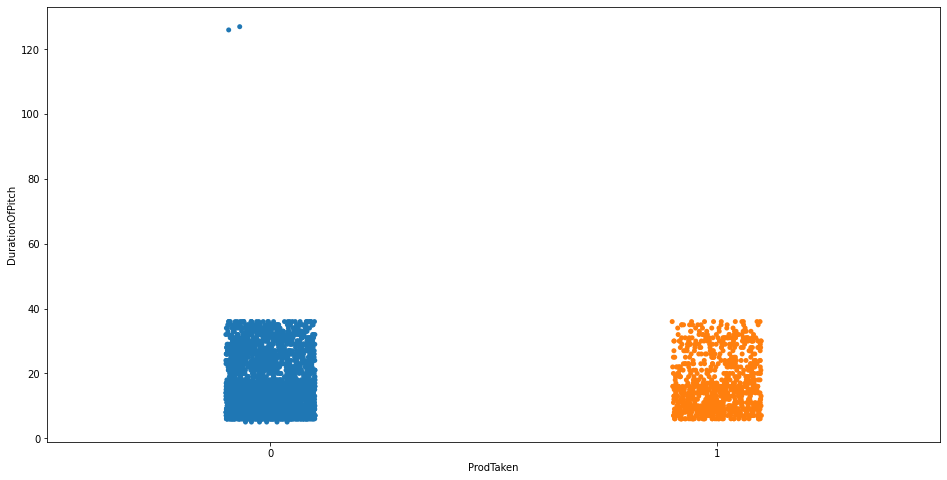

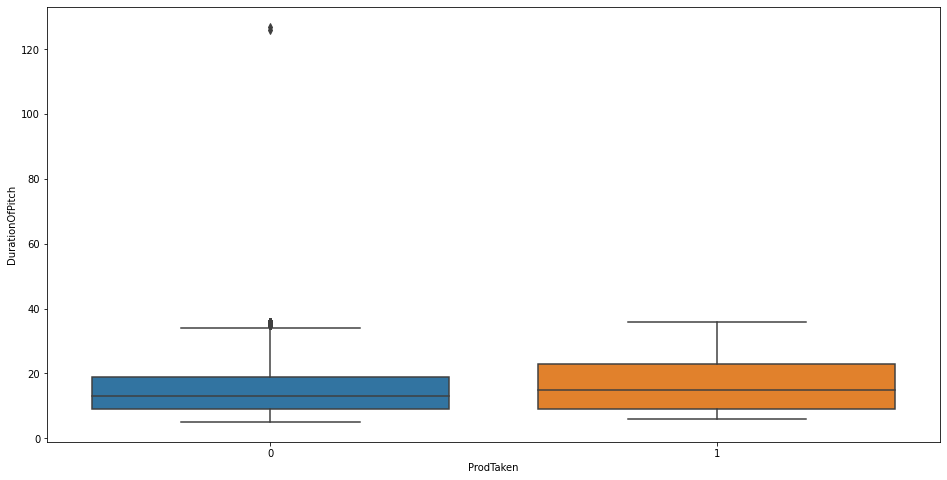

In [50]:
# Create stripplot for ProdTaken and DurationOfPitch.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='ProdTaken', y='DurationOfPitch');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='ProdTaken', y='DurationOfPitch')
plt.show()


* Duration of the picth may have helped, its little higher for customers who purchased the packages

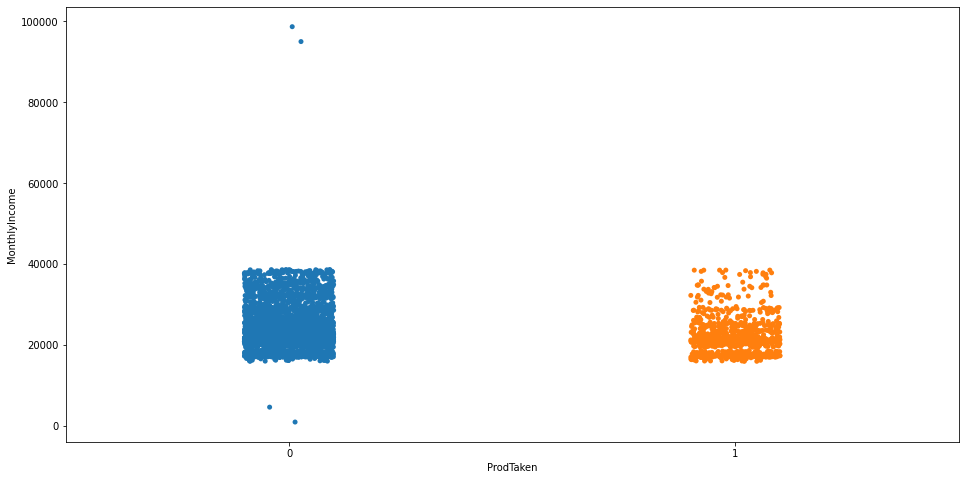

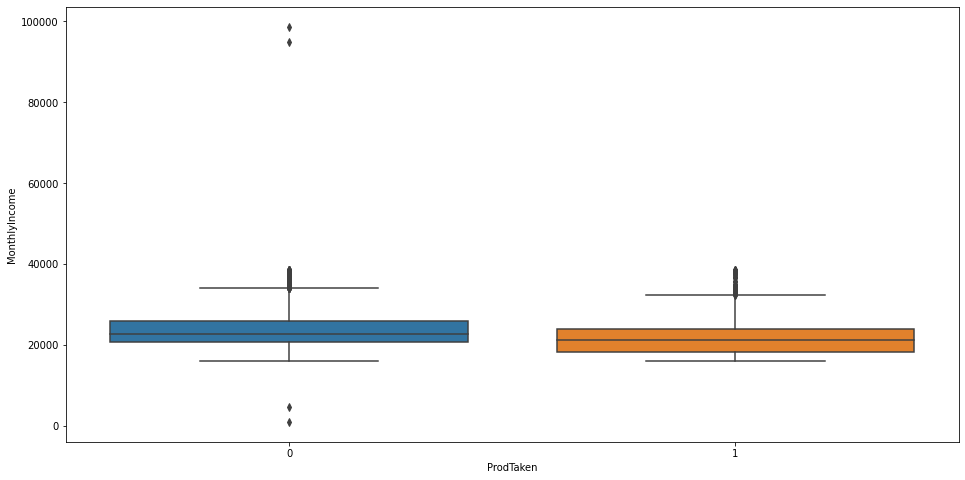

In [51]:
# Create stripplot for ProdTaken and MonthlyIncome.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='ProdTaken', y='MonthlyIncome');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='ProdTaken', y='MonthlyIncome')
plt.show()

* Not much difference in the monthly income for customers who have or have not purchased the packages

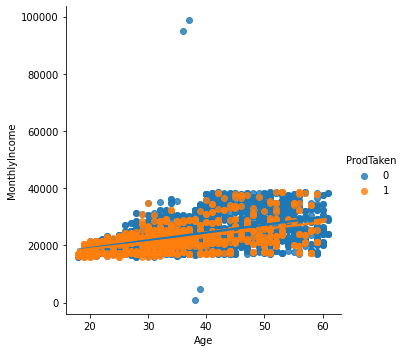

In [52]:
# Let's use Lmplot to see relations between 2 features - Age and MonthlyIncome, split by Personal_Loan

sns.lmplot(data=df,x='Age', y='MonthlyIncome', hue='ProdTaken');

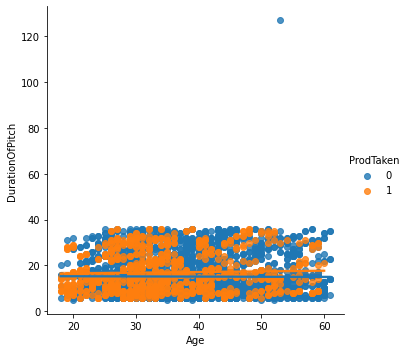

In [53]:
# Let's use Lmplot to see relations between 2 features - Age and DurationOfPitch, split by ProdTaken

sns.lmplot(data=df,x='Age', y='DurationOfPitch', hue='ProdTaken');

Now, lets check relation between other categorical features and numeric continuous features. Again, purpose is to get more insights into the customer profile.

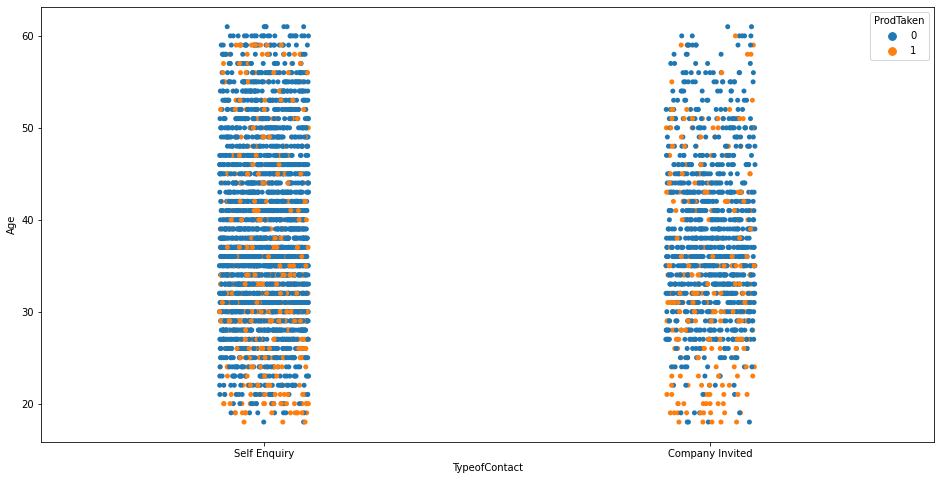

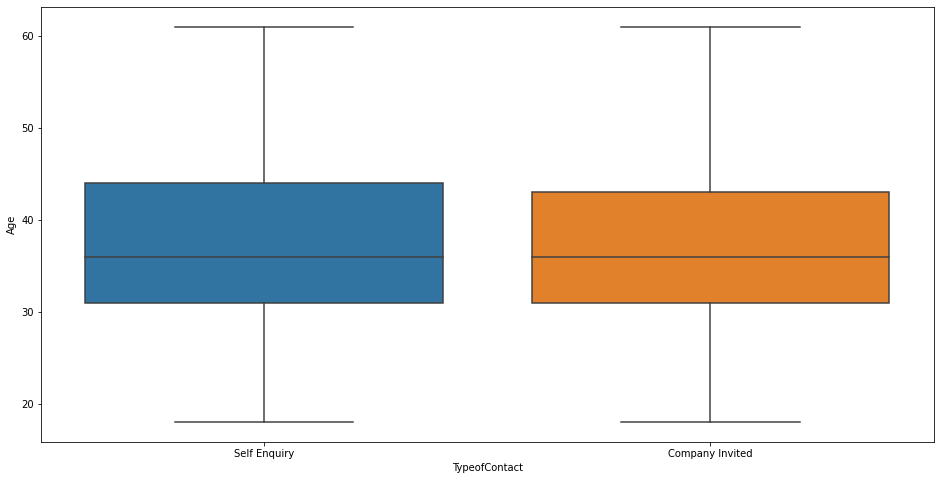

In [54]:
# Create stripplot for TypeofContact and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='TypeofContact', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='TypeofContact', y='Age')
plt.show()

Nothing specific observed

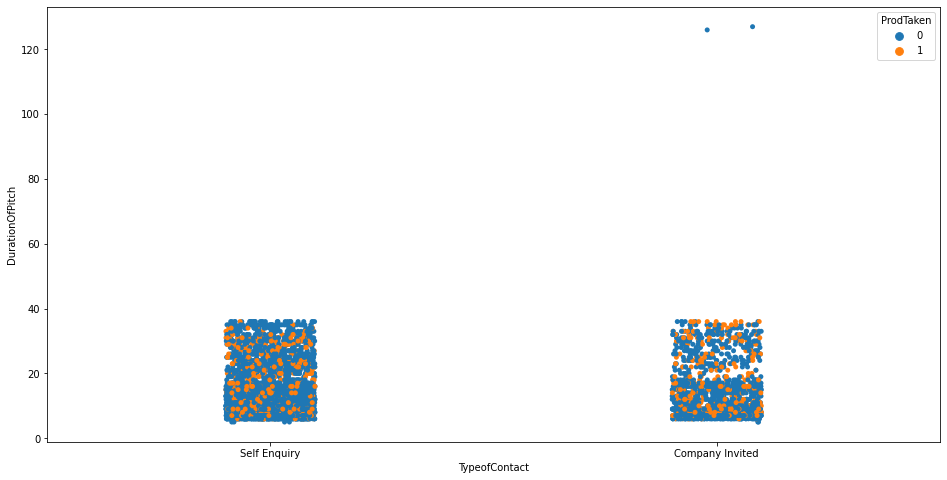

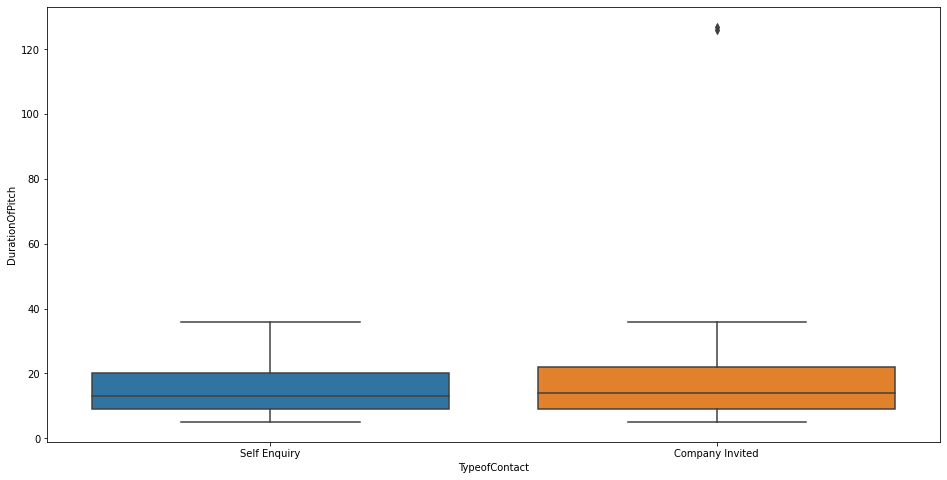

In [55]:
# Create stripplot for TypeofContact and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='TypeofContact', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='TypeofContact', y='DurationOfPitch')
plt.show()

Nothing specific observed, duration of the pitch is not very different based on the type of contact

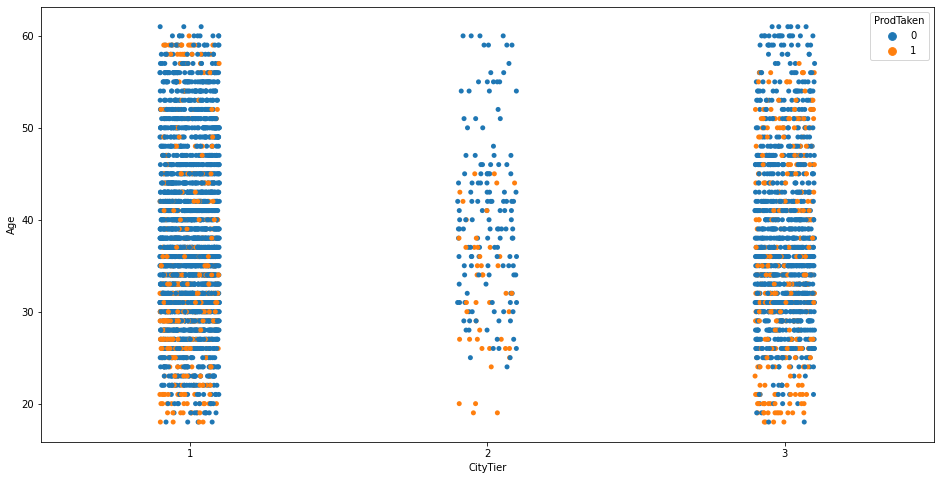

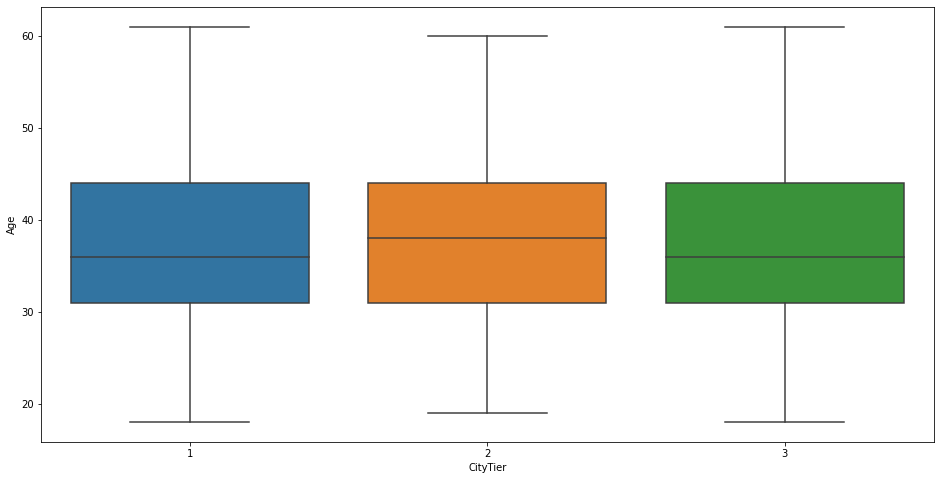

In [56]:
# Create stripplot for CityTier and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='CityTier', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='CityTier', y='Age')
plt.show()

Nothing specific observed

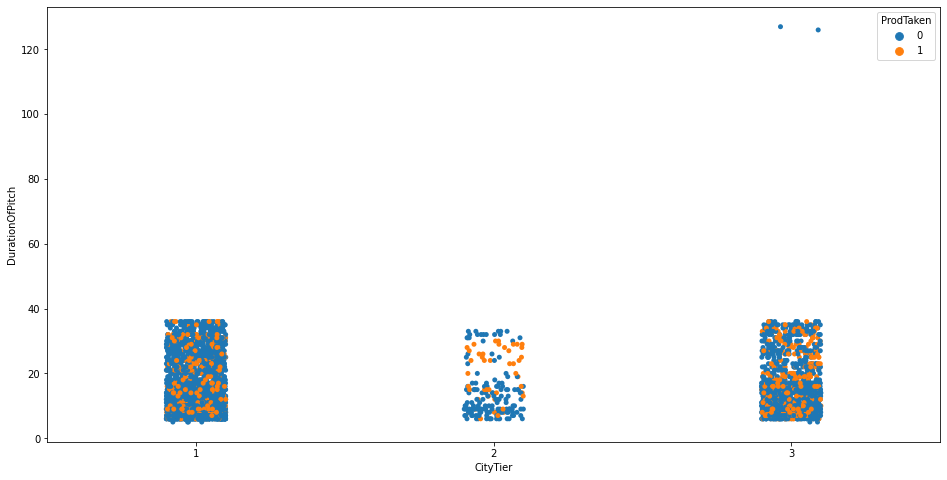

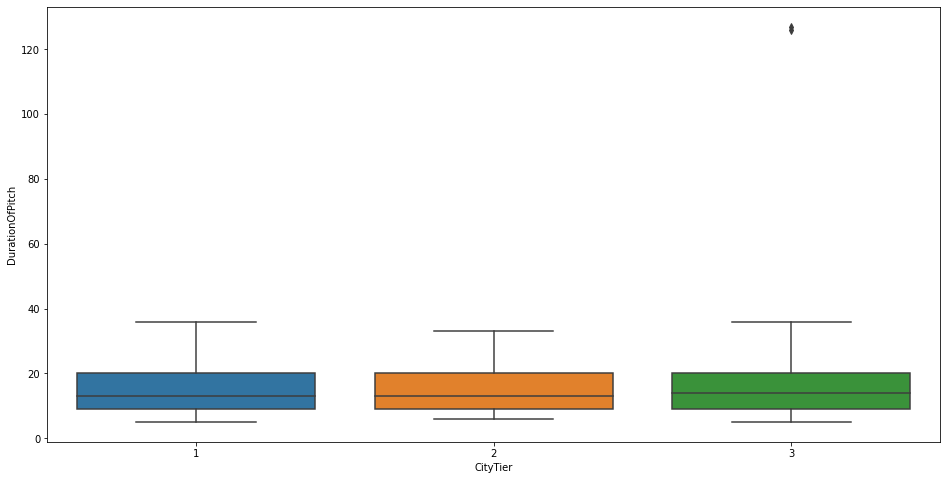

In [57]:
# Create stripplot for CityTier and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='CityTier', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='CityTier', y='DurationOfPitch')
plt.show()

Nothing specific observed

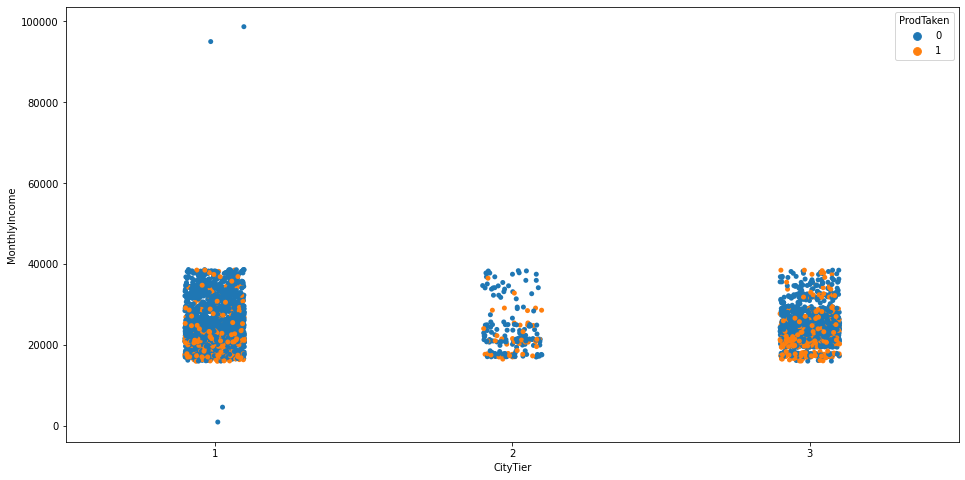

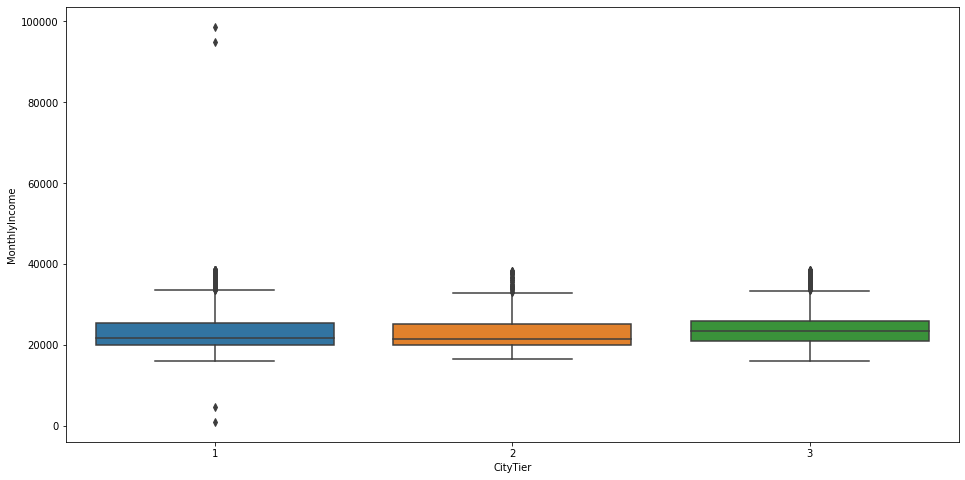

In [58]:
# Create stripplot for CityTier and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='CityTier', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='CityTier', y='MonthlyIncome')
plt.show()

Nothing specific observed

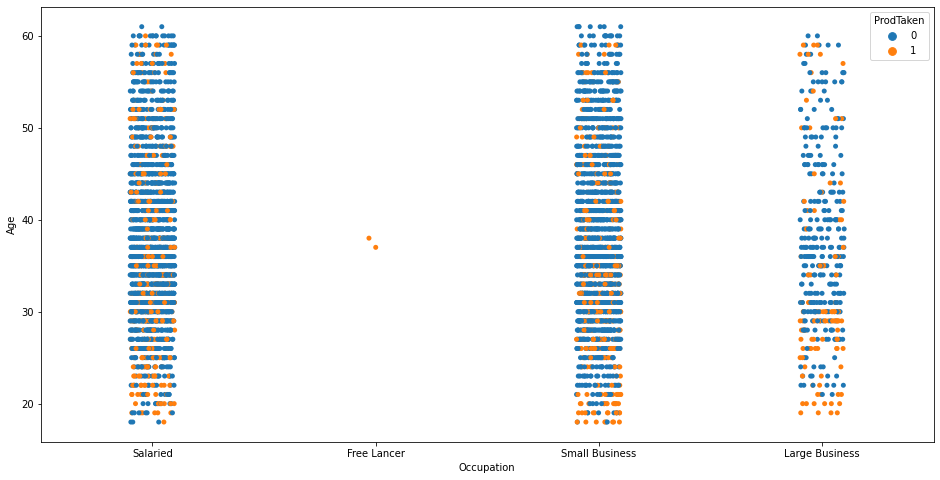

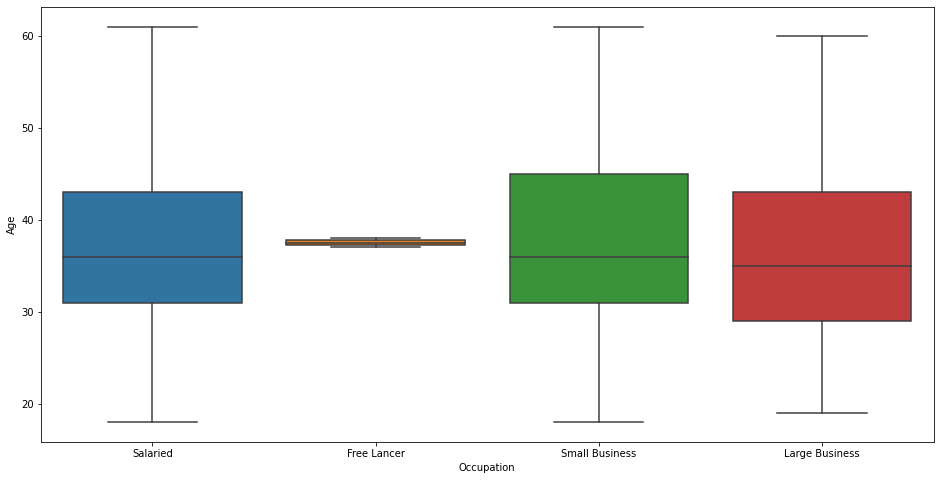

In [59]:
# Create stripplot for Occupation and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Occupation', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Occupation', y='Age')
plt.show()

* Similar Age distribution for all designations, except Free Lancers
* Median Age is very similar across all occupations

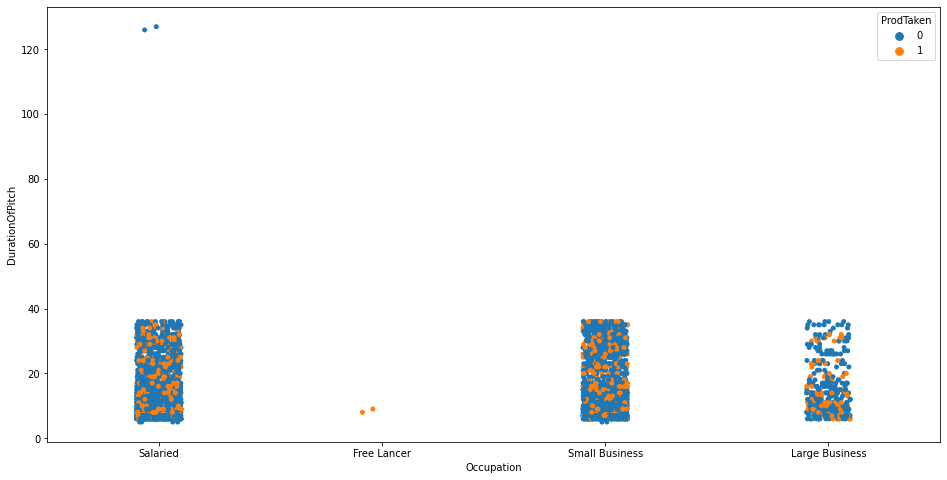

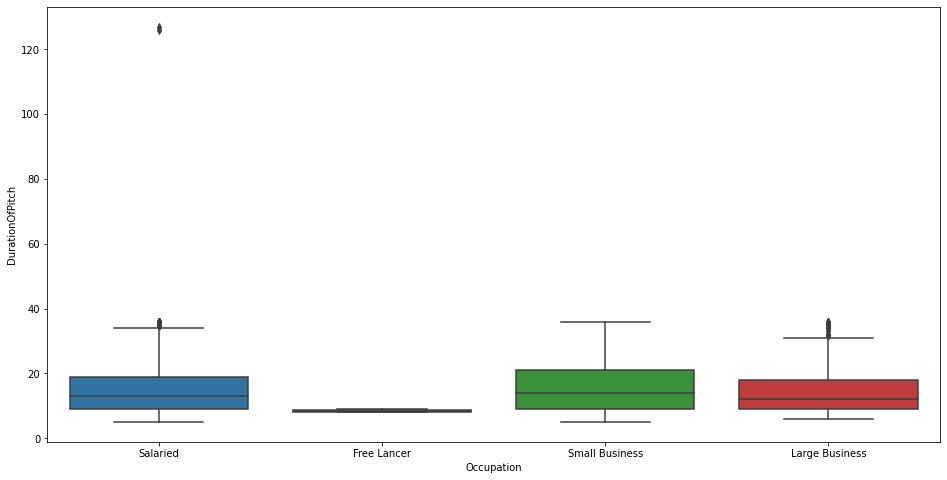

In [60]:
# Create stripplot for Occupation and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Occupation', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Occupation', y='DurationOfPitch')
plt.show()

* Similar Duration of pitch distribution for all designations, except Free Lancers

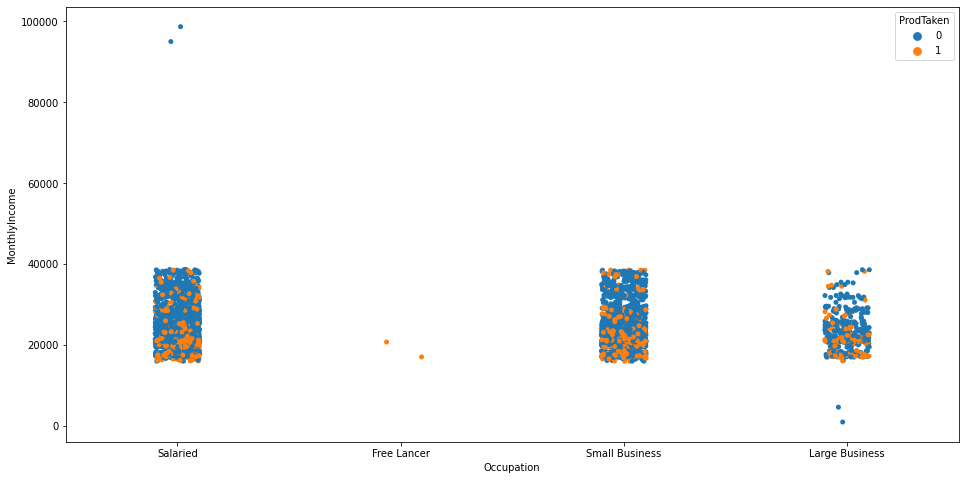

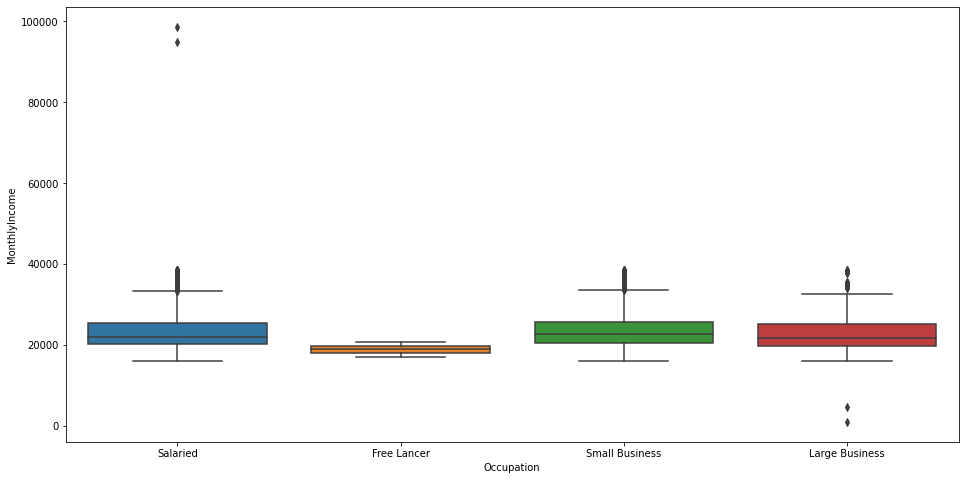

In [61]:
# Create stripplot for Occupation and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Occupation', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Occupation', y='MonthlyIncome')
plt.show()

* Similar Monthly income distribution for all designations, except Free Lancers

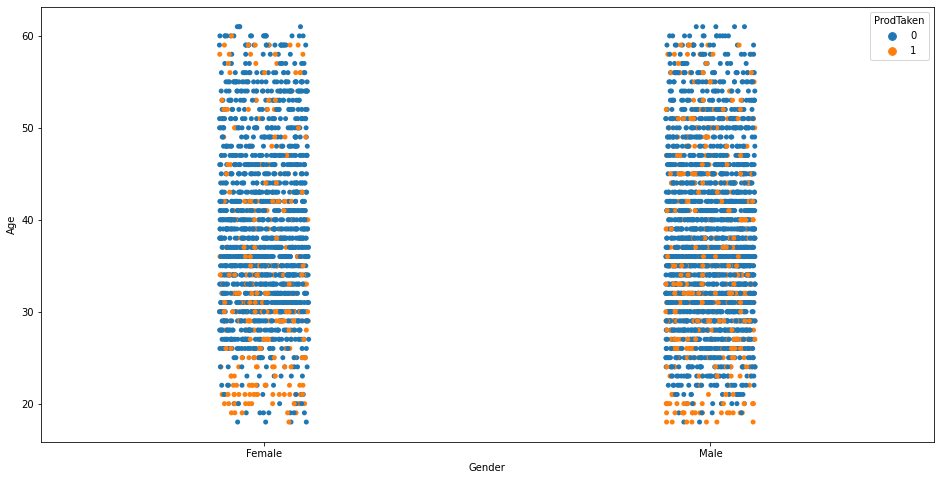

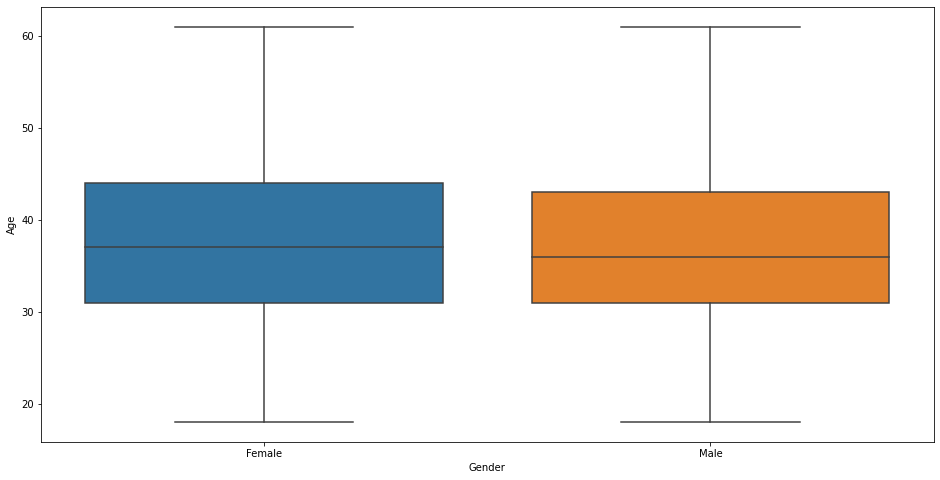

In [62]:
# Create stripplot for Gender and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Gender', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Gender', y='Age')
plt.show()

Nothing specific observed

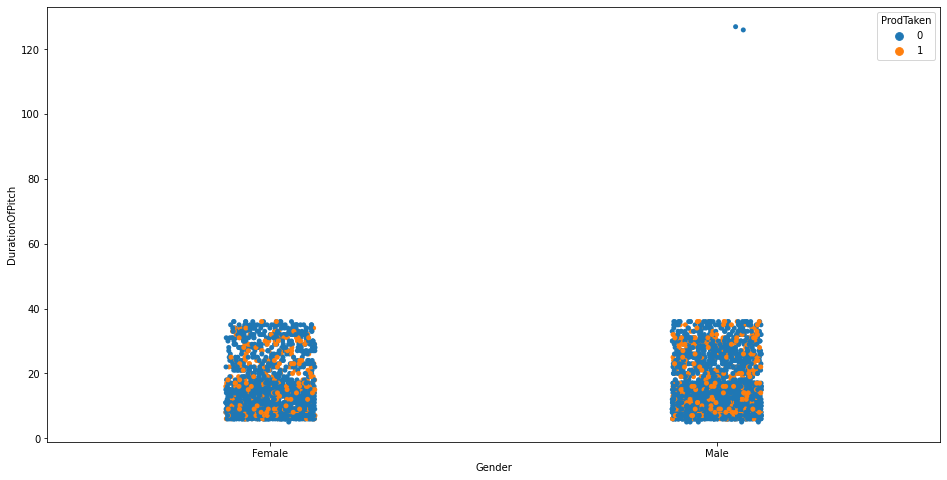

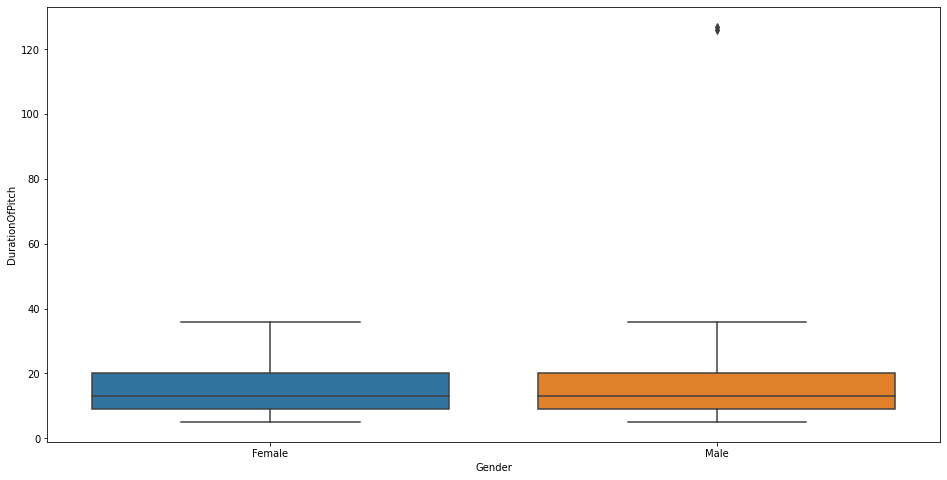

In [63]:
# Create stripplot for Gender and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Gender', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Gender', y='DurationOfPitch')
plt.show()

Nothing specific observed

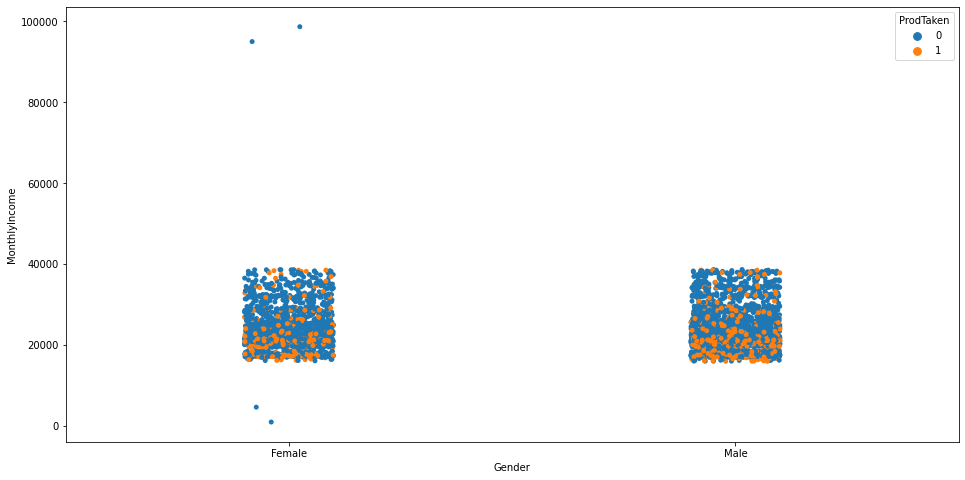

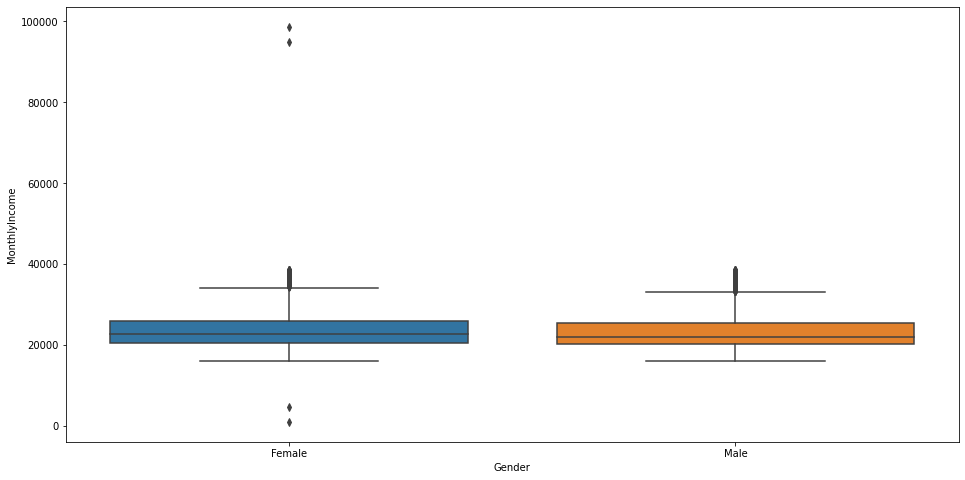

In [64]:
# Create stripplot for Gender and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Gender', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Gender', y='MonthlyIncome')
plt.show()

* Not much difference in the monthly incomes of Males and Females. Equality in play!
* Some female customers have significantly high income

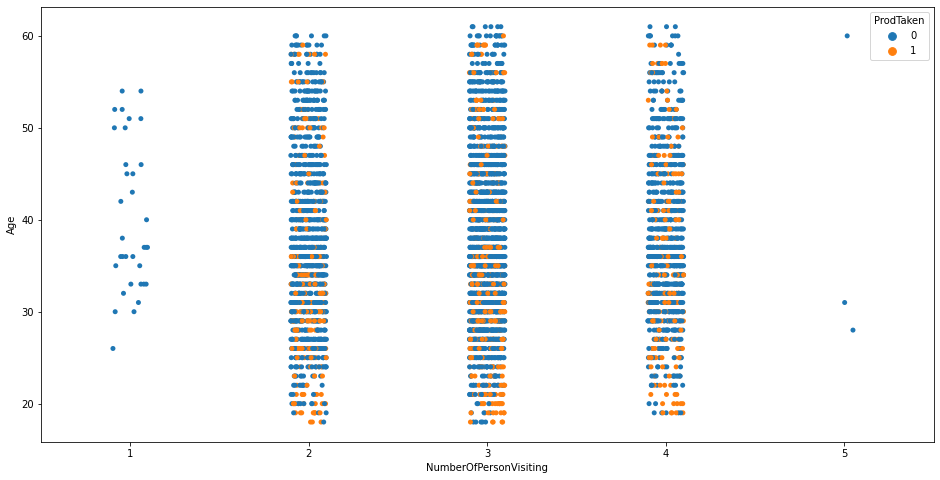

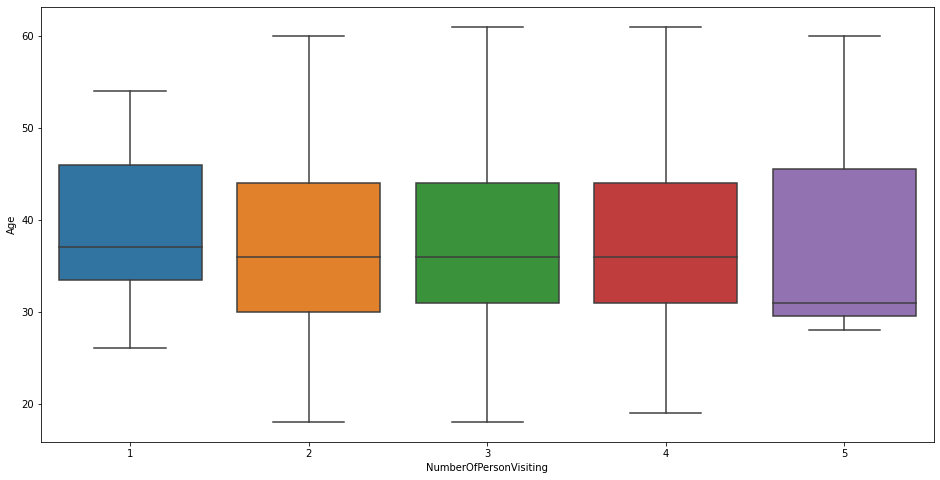

In [65]:
# Create stripplot for NumberOfPersonVisiting and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='NumberOfPersonVisiting', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='NumberOfPersonVisiting', y='Age')
plt.show()

Overall, similar Age distribution across different sizes of groups.
Most popular group size is 2,3,4

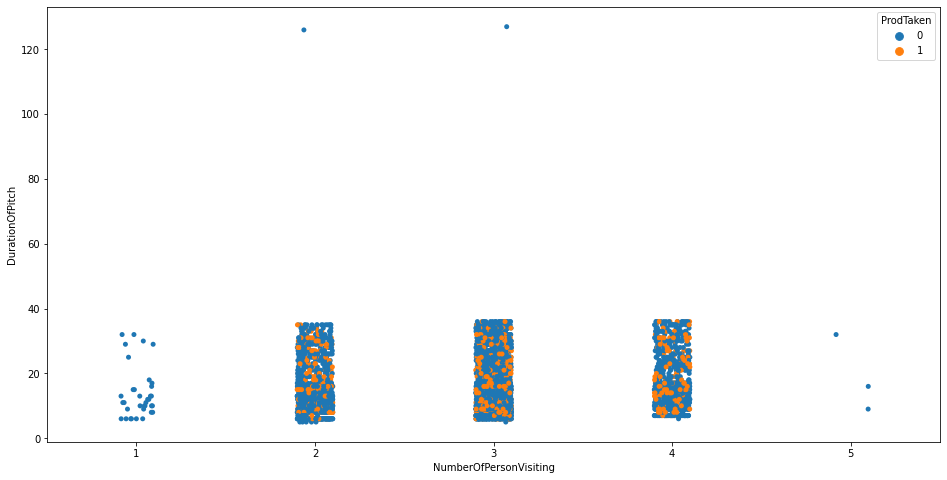

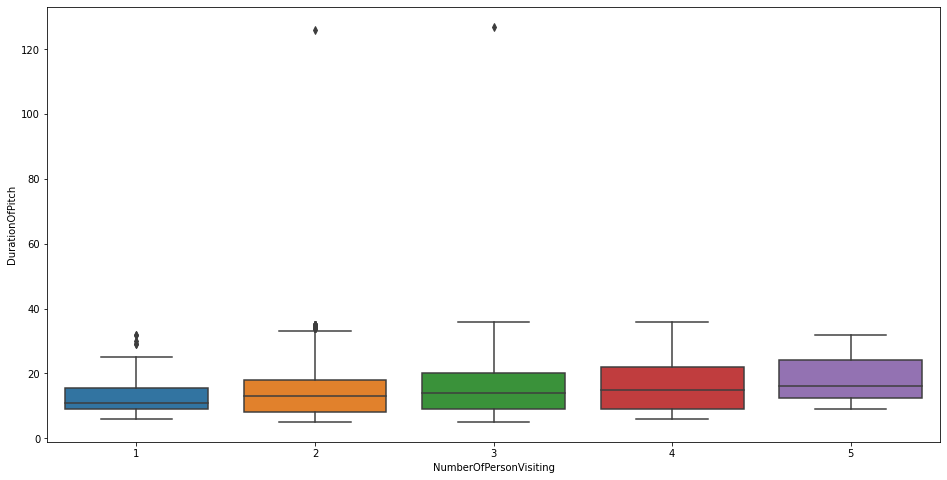

In [66]:
# Create stripplot for NumberOfPersonVisiting and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='NumberOfPersonVisiting', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='NumberOfPersonVisiting', y='DurationOfPitch')
plt.show()

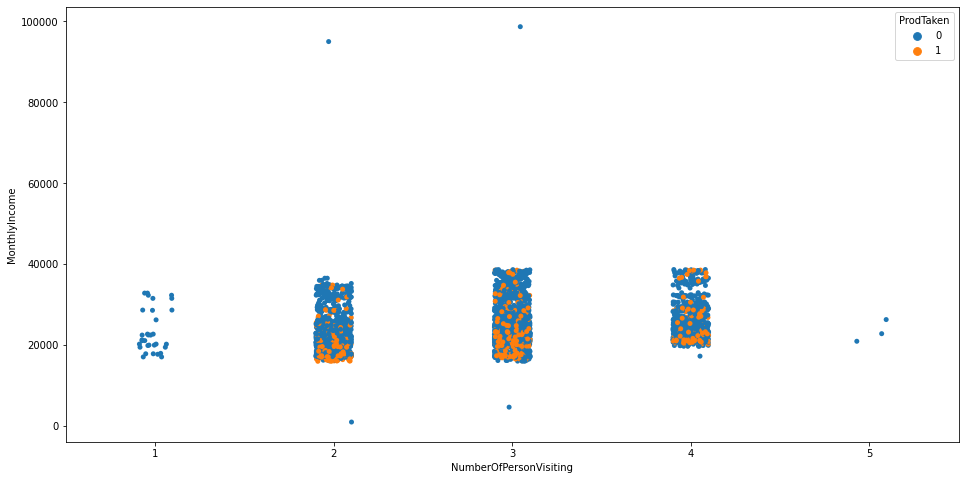

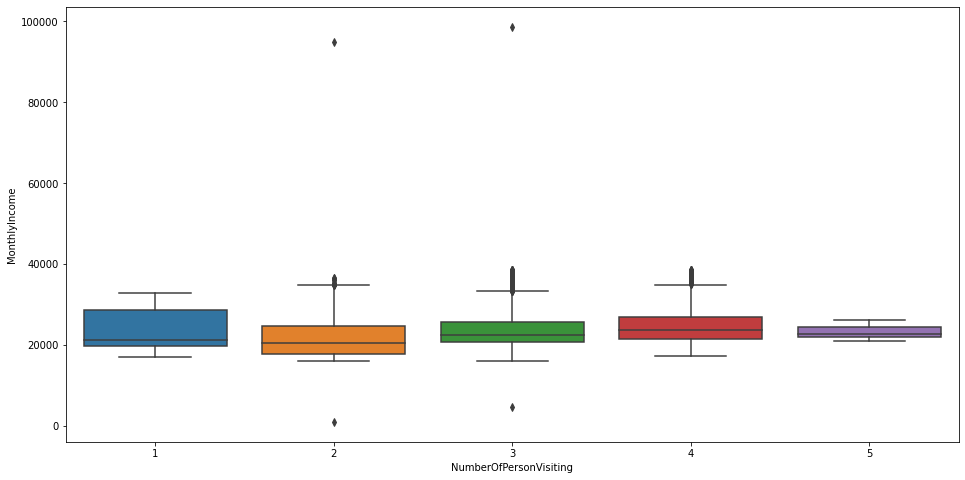

In [67]:
# Create stripplot for NumberOfPersonVisiting and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='NumberOfPersonVisiting', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='NumberOfPersonVisiting', y='MonthlyIncome')
plt.show()

Minor difference in the monthly income distributions based on the family size

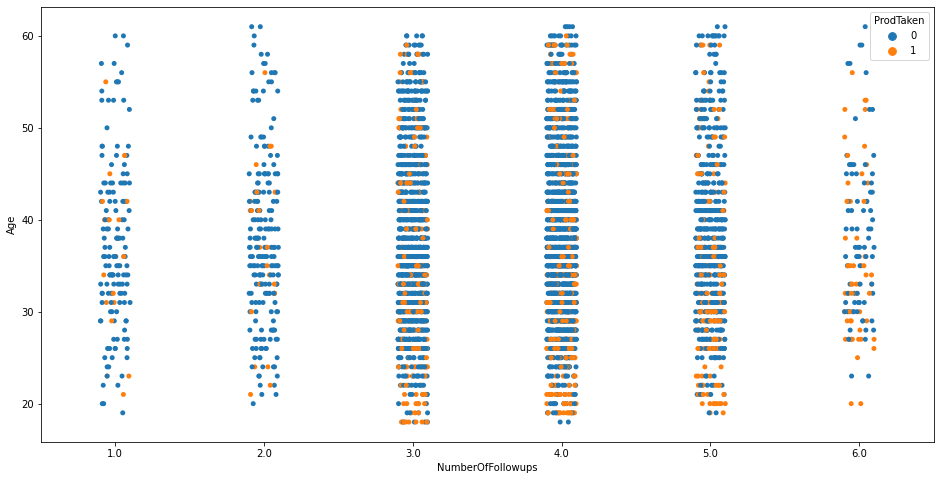

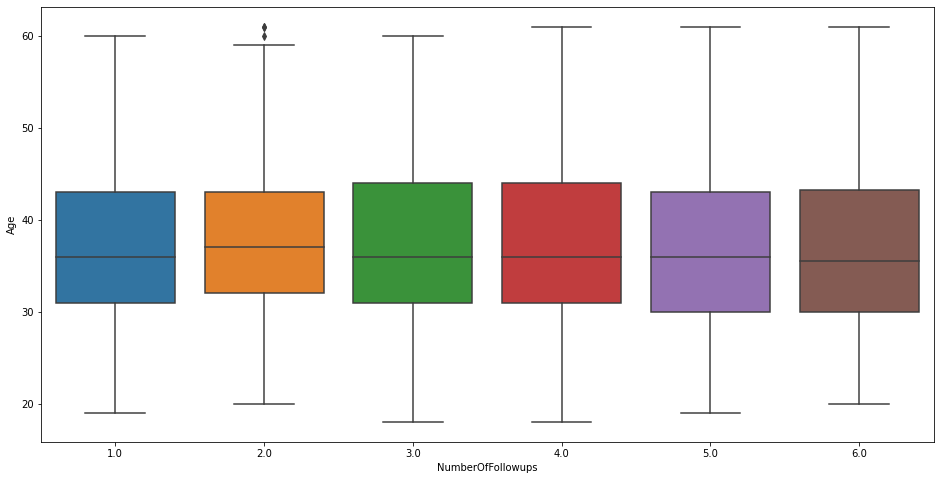

In [68]:
# Create stripplot for NumberOfFollowups and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='NumberOfFollowups', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='NumberOfFollowups', y='Age')
plt.show()

Age group of the customers is more or less same across all number of follow-ups

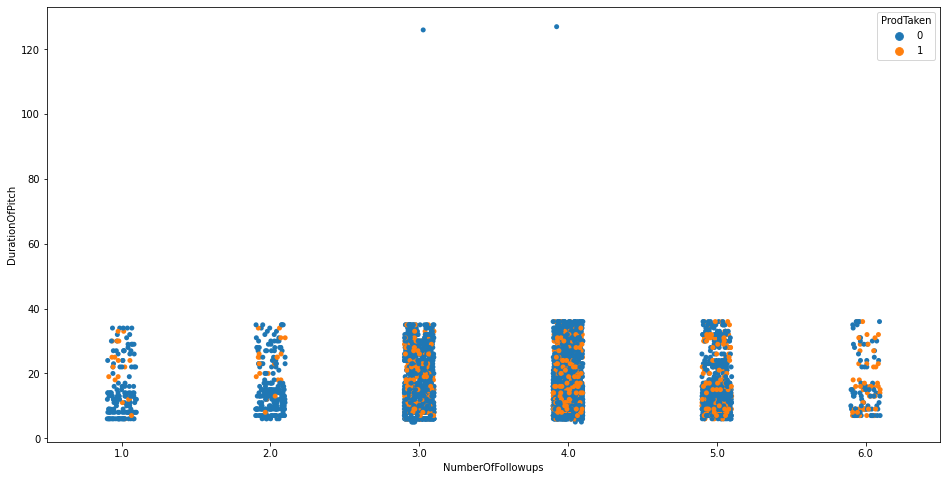

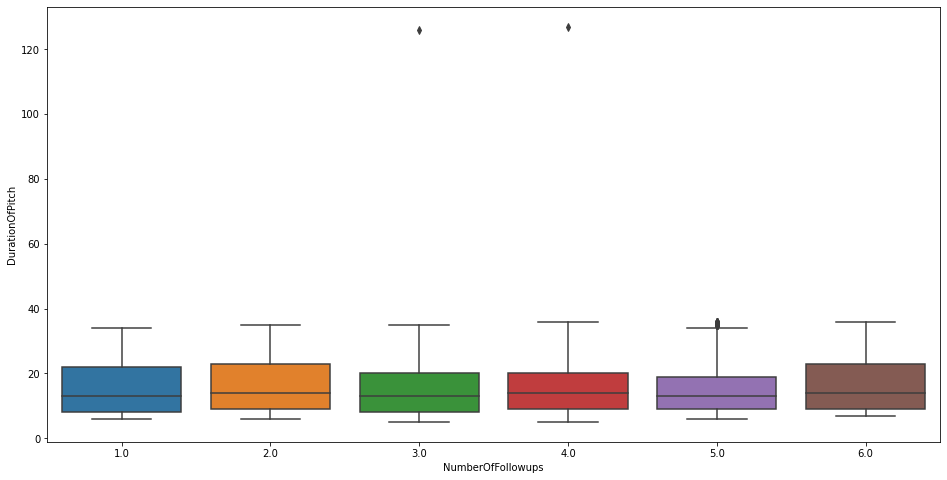

In [69]:
# Create stripplot for NumberOfFollowups and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='NumberOfFollowups', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='NumberOfFollowups', y='DurationOfPitch')
plt.show()

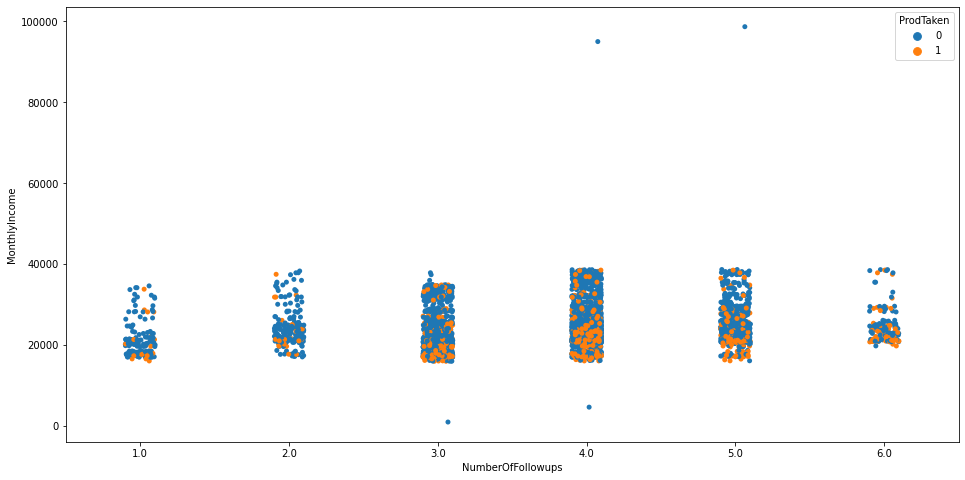

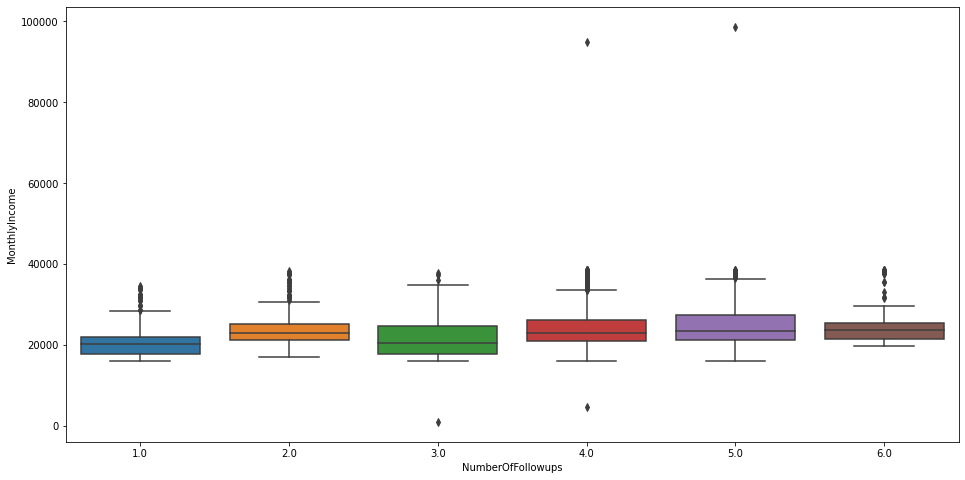

In [70]:
# Create stripplot for NumberOfFollowups and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='NumberOfFollowups', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='NumberOfFollowups', y='MonthlyIncome')
plt.show()

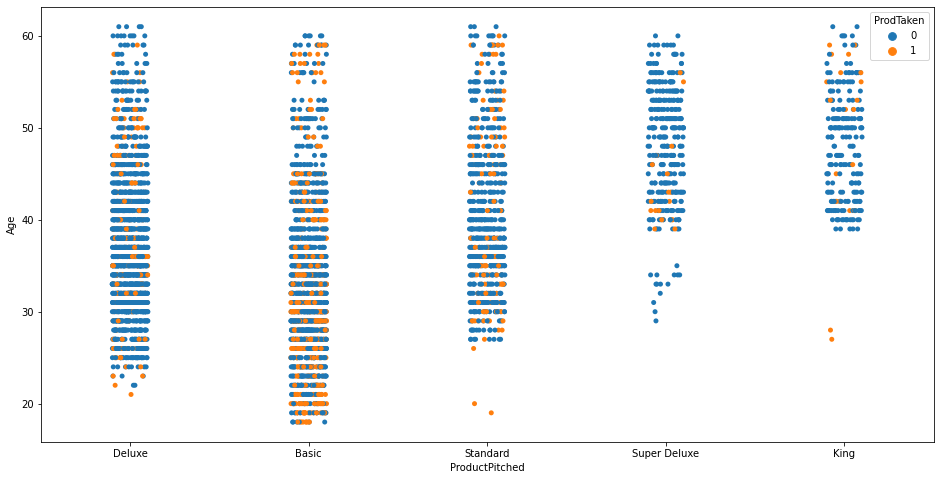

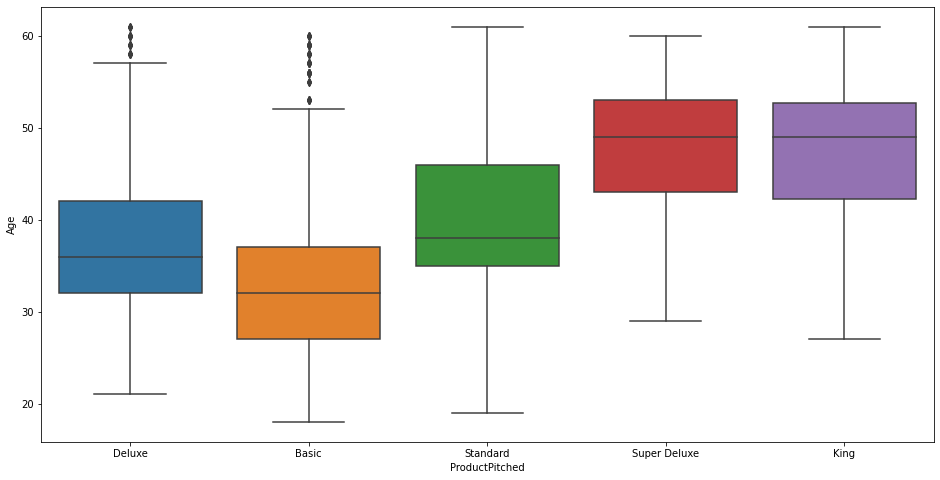

In [71]:
# Create stripplot for ProductPitched and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='ProductPitched', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='ProductPitched', y='Age')
plt.show()

* Clearly seen than higher Age customers have been pitched with Super Deluxe and King packages. Although not many actually purchased
* Basic package is pitched to younger customers 

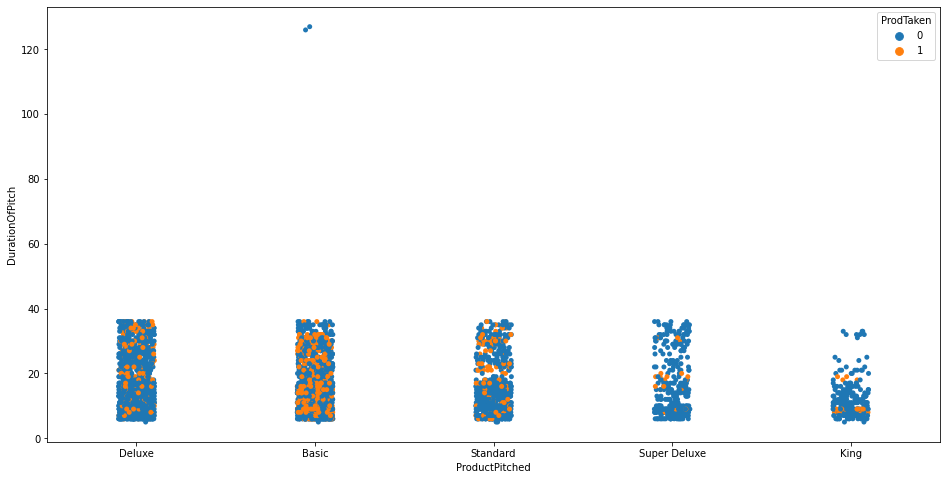

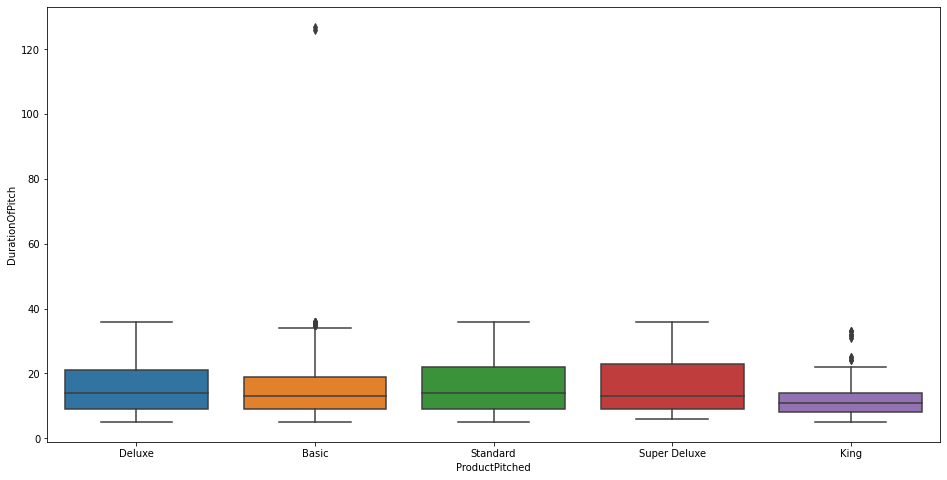

In [72]:
# Create stripplot for ProductPitched and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='ProductPitched', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='ProductPitched', y='DurationOfPitch')
plt.show()

Duration of the pitch is the lowest for King package. All other packages are comparable

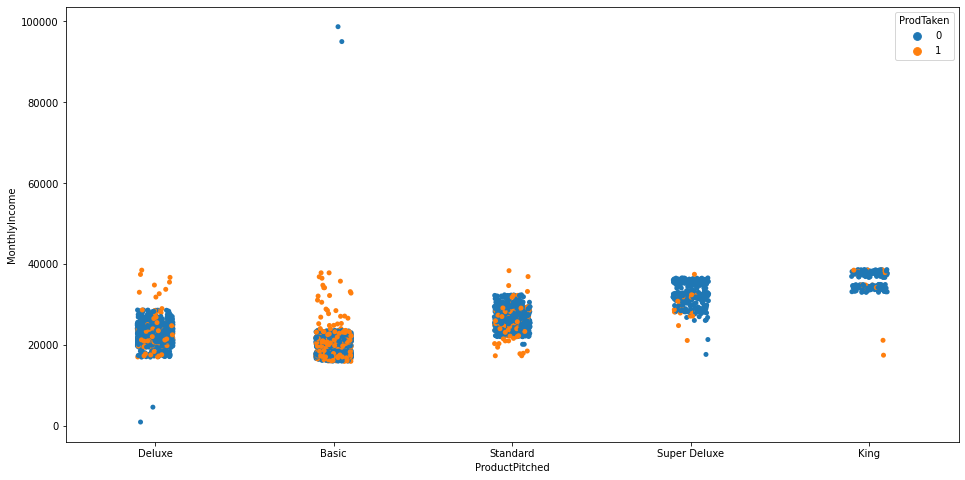

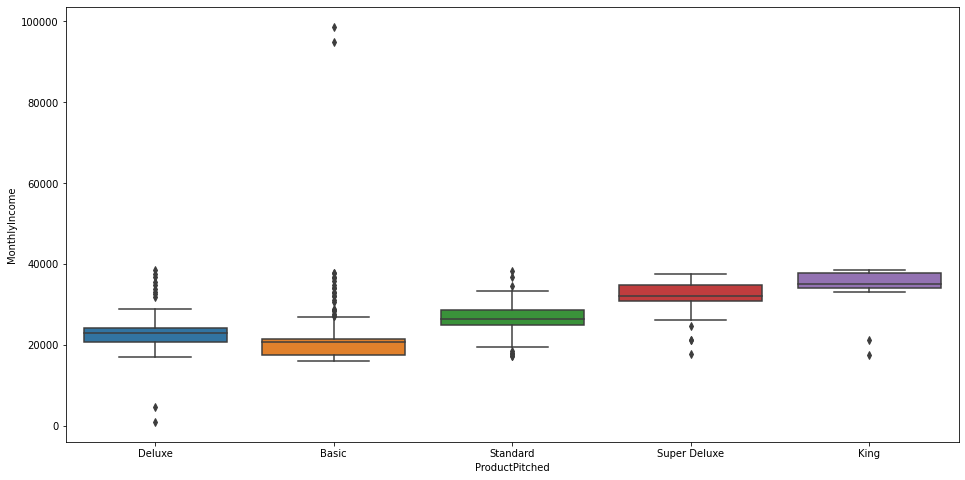

In [73]:
# Create stripplot for ProductPitched and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='ProductPitched', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='ProductPitched', y='MonthlyIncome')
plt.show()  

Super Deluxe and King packages are pitched to higher income customers while Basic is pitched to comparatively lower income customers.

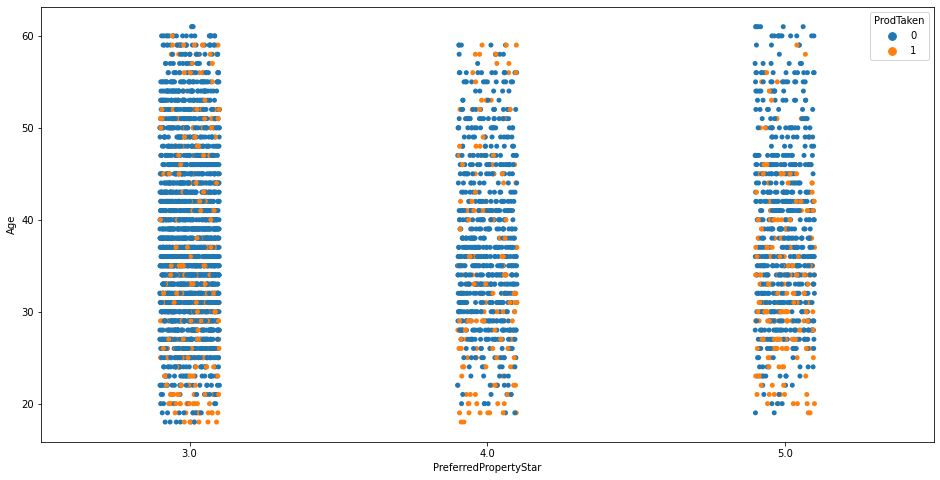

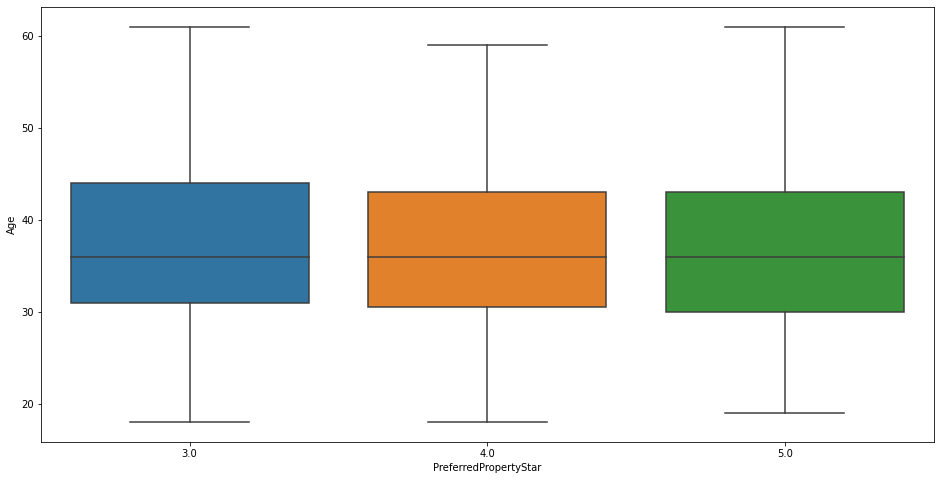

In [74]:
# Create stripplot for PreferredPropertyStar and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='PreferredPropertyStar', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='PreferredPropertyStar', y='Age')
plt.show() 



Not much difference in the pattern observed

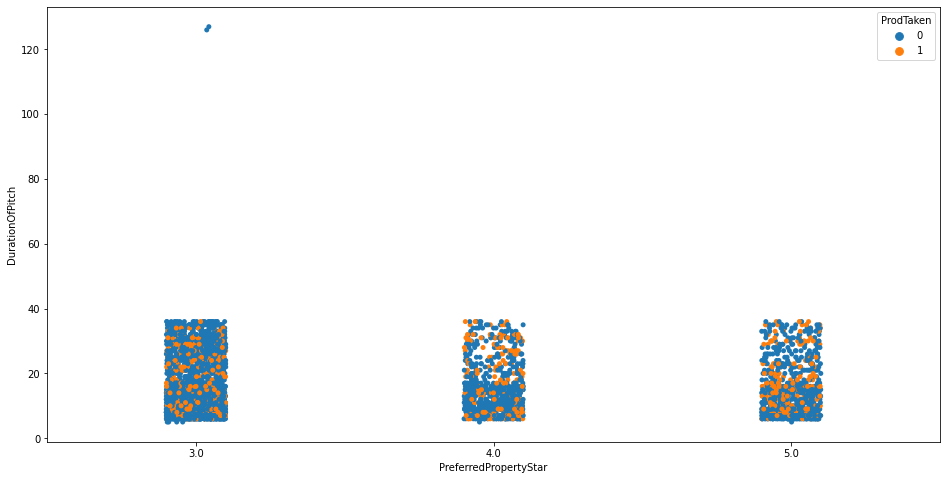

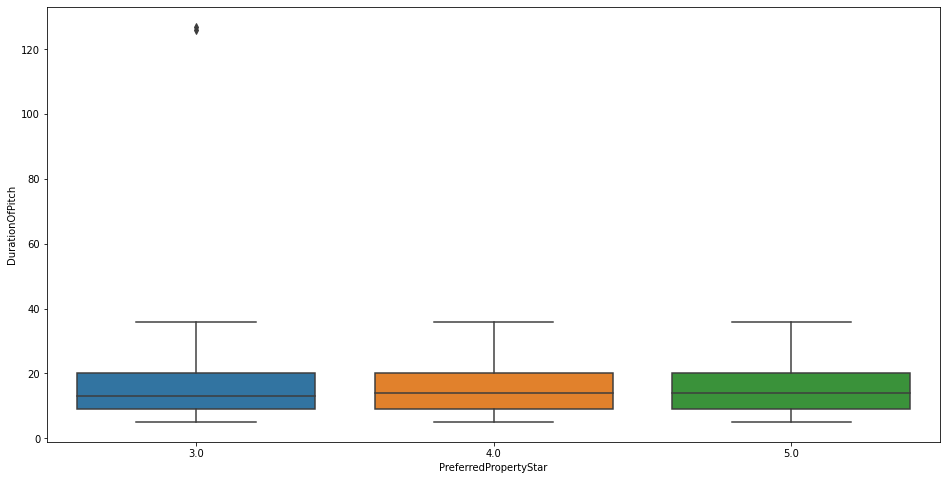

In [75]:
# Create stripplot for PreferredPropertyStar and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='PreferredPropertyStar', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='PreferredPropertyStar', y='DurationOfPitch')
plt.show() 

Not much difference in the pattern observed

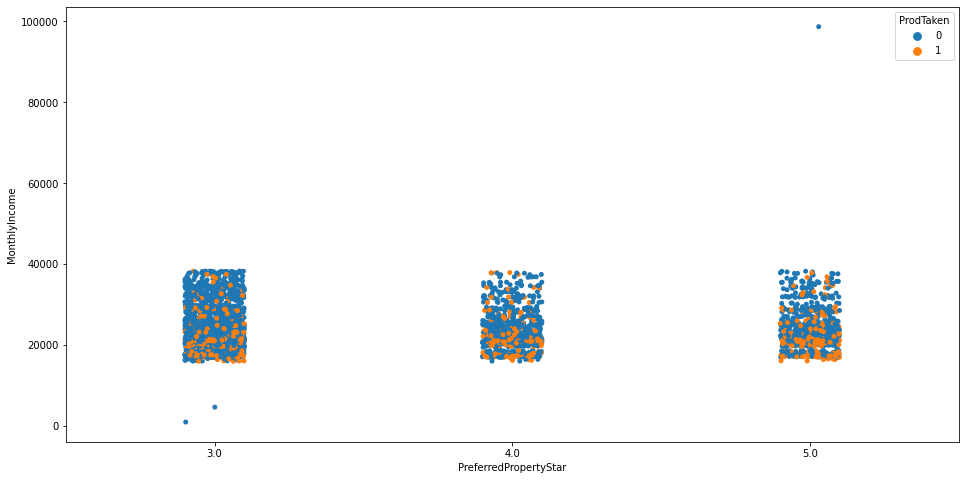

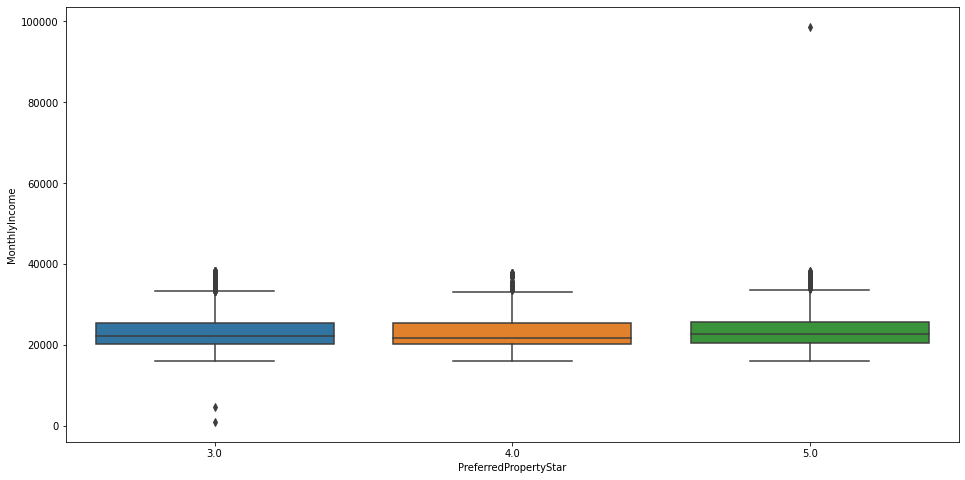

In [76]:
# Create stripplot for PreferredPropertyStar and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='PreferredPropertyStar', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='PreferredPropertyStar', y='MonthlyIncome')
plt.show() 

Not much difference in the pattern observed

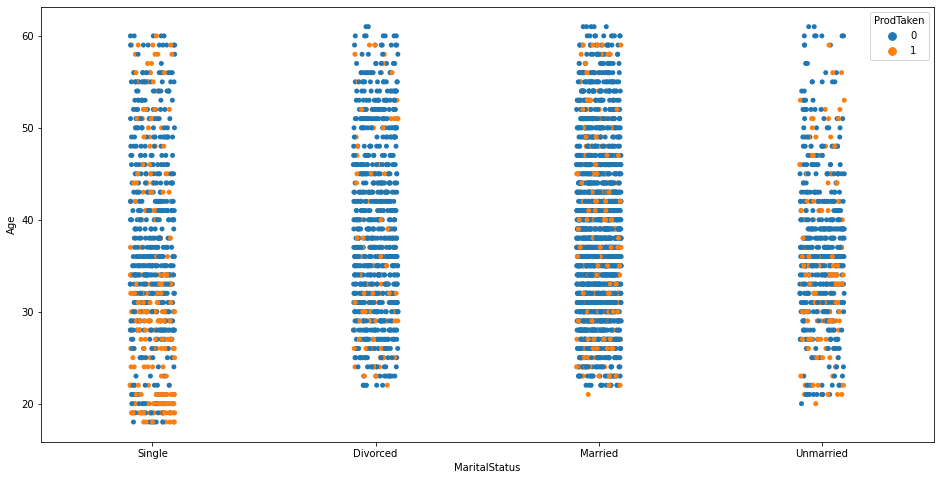

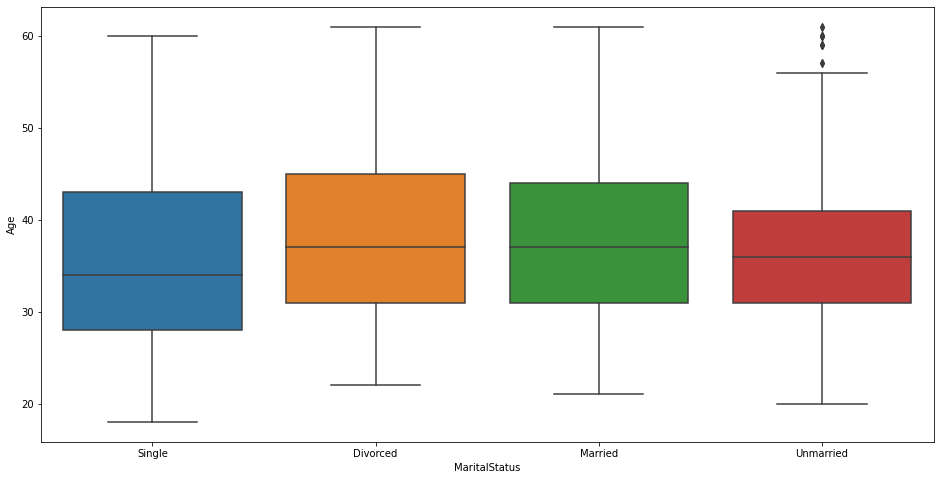

In [77]:
# Create stripplot for MaritalStatus and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='MaritalStatus', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='MaritalStatus', y='Age')
plt.show() 

More or less same age distribution across all Marital Status values

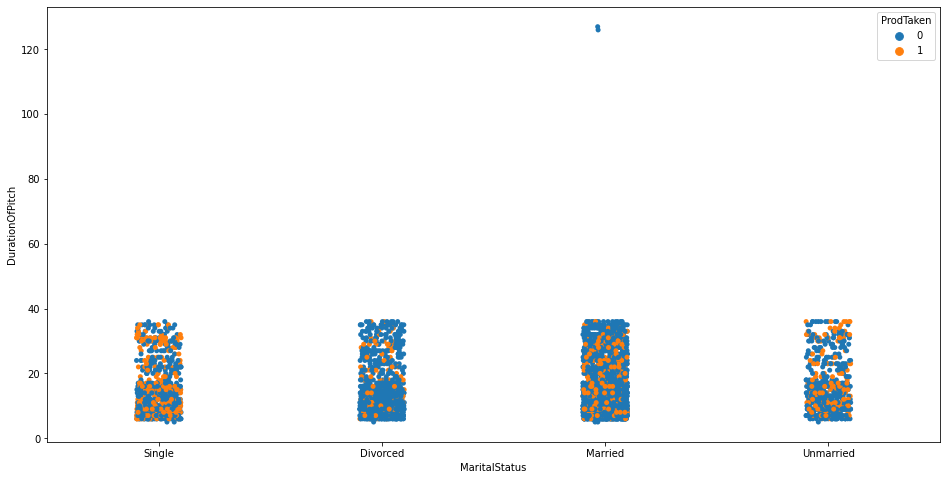

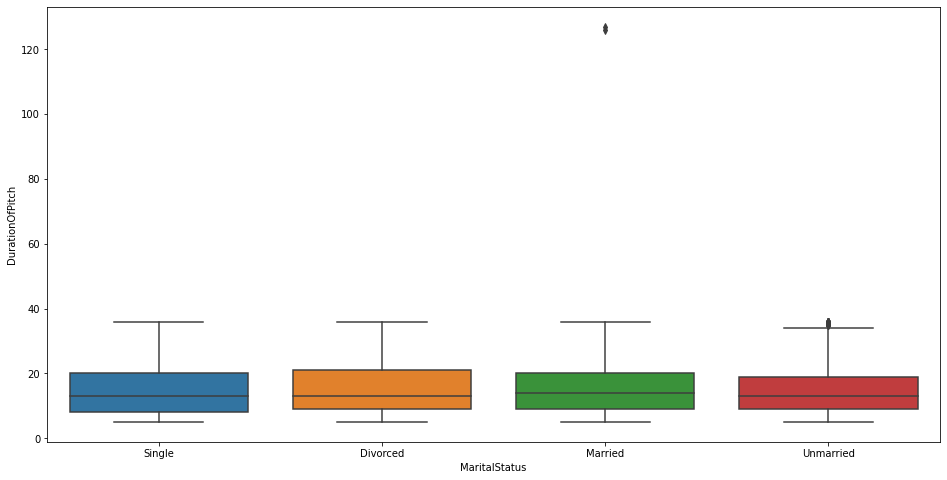

In [78]:
# Create stripplot for MaritalStatus and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='MaritalStatus', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='MaritalStatus', y='DurationOfPitch')
plt.show() 

Nothing specific observed

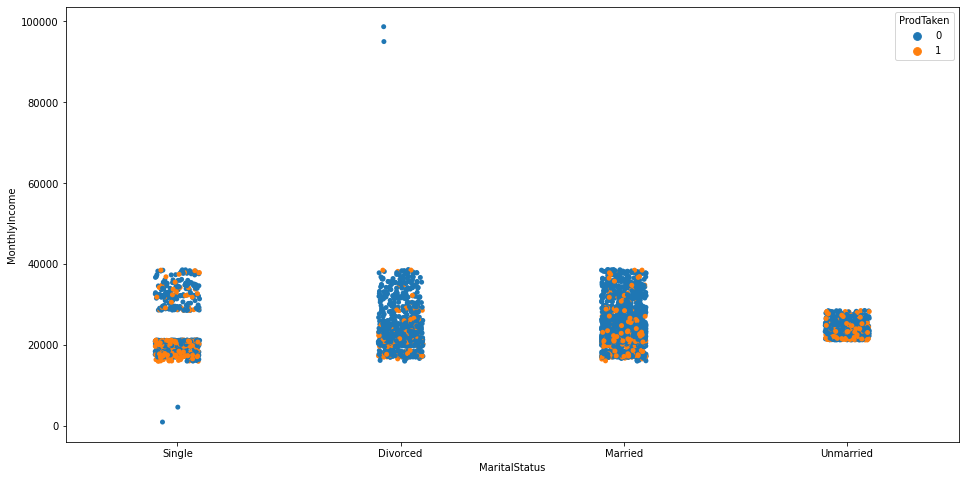

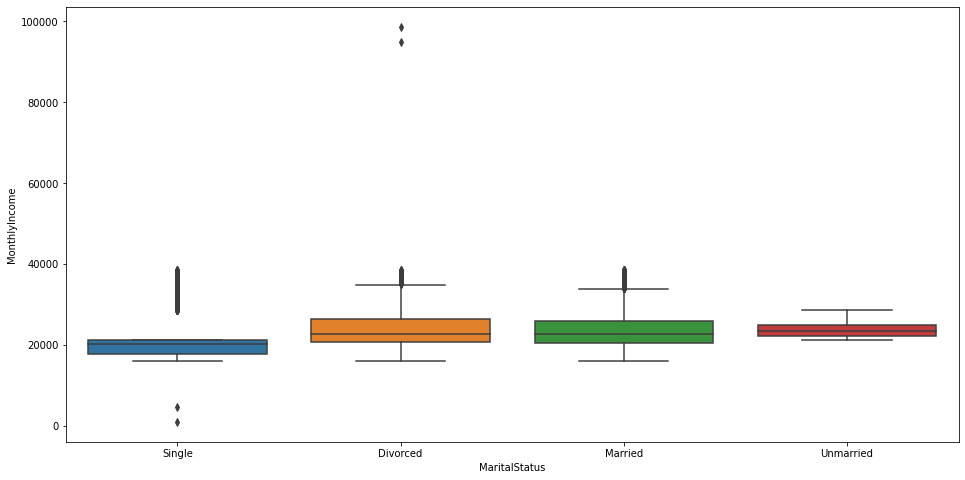

In [79]:
# Create stripplot for MaritalStatus and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='MaritalStatus', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='MaritalStatus', y='MonthlyIncome')
plt.show() 

Single and Unmarried customers have comparatively lower monthly income

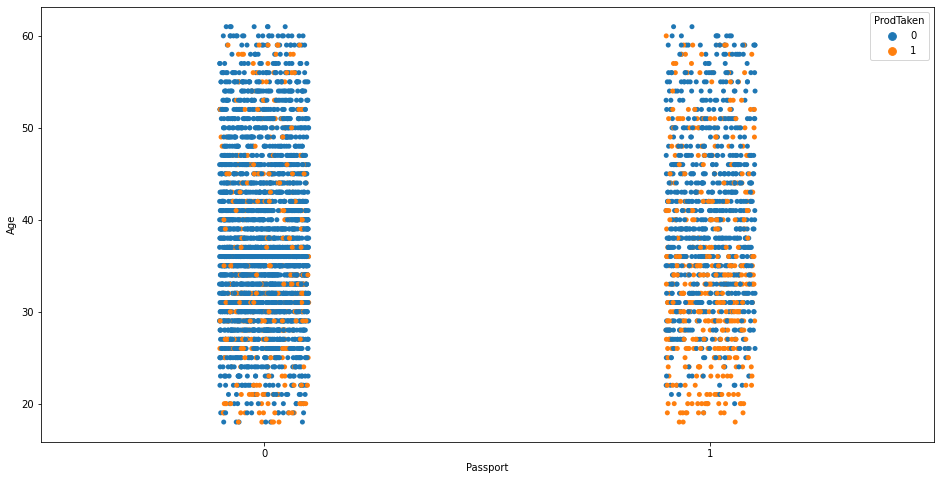

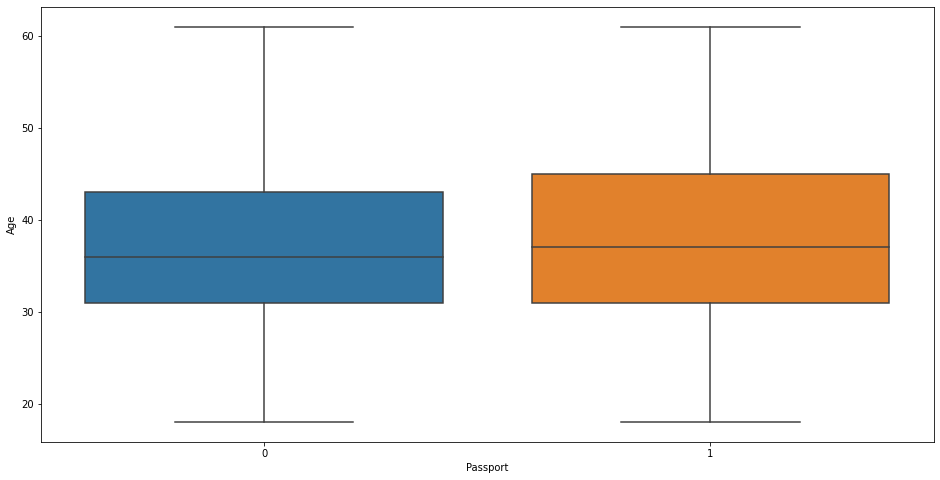

In [80]:
# Create stripplot for Passport and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Passport', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Passport', y='Age')
plt.show() 

Nothing specific observed

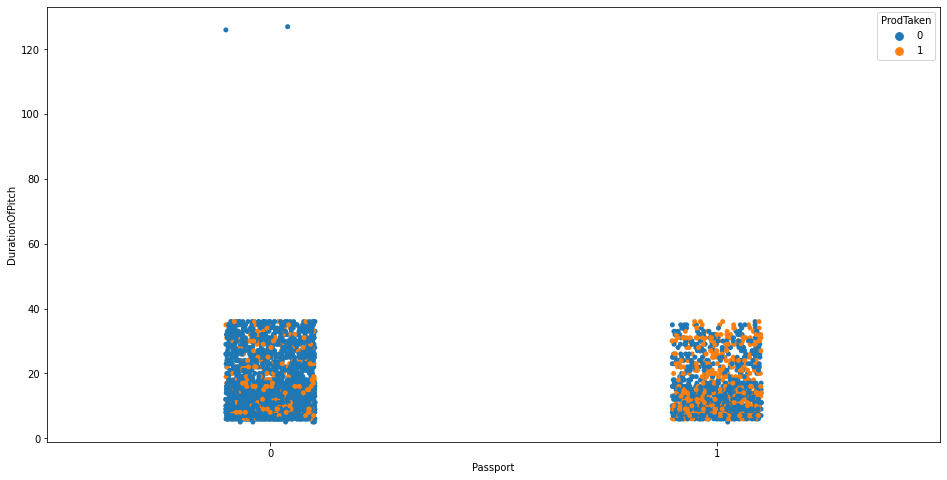

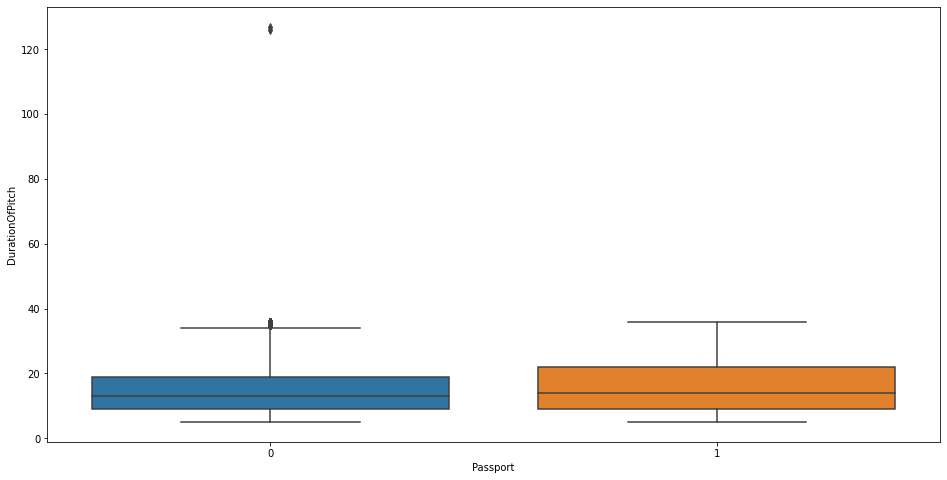

In [81]:
# Create stripplot for Passport and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Passport', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Passport', y='DurationOfPitch')
plt.show() 

Nothing specific observed

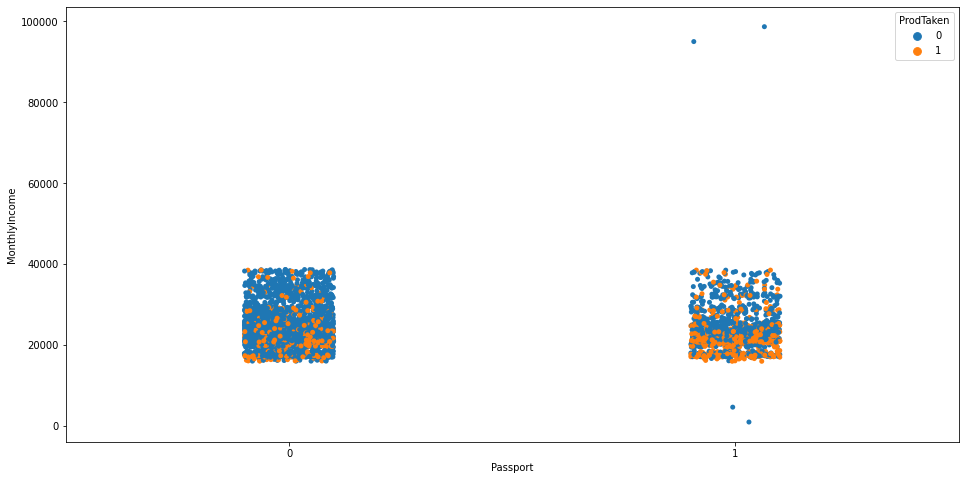

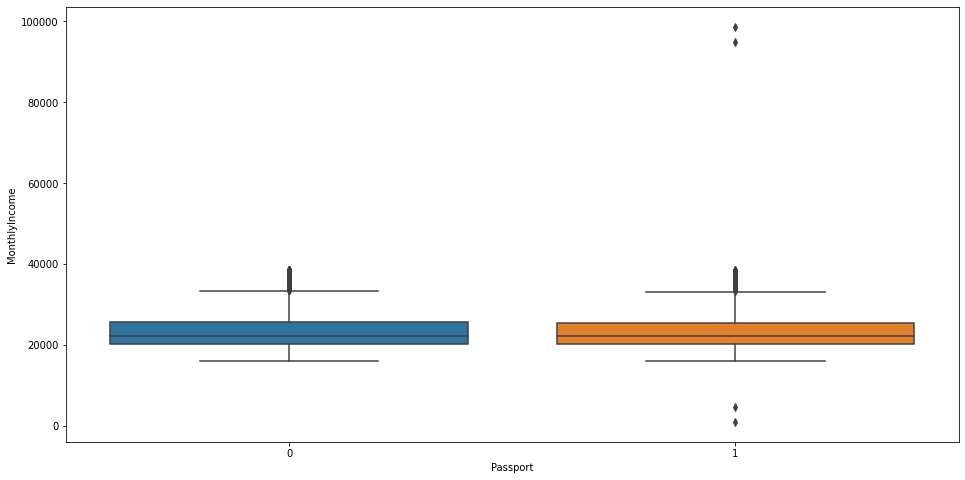

In [82]:
# Create stripplot for Passport and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Passport', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Passport', y='MonthlyIncome')
plt.show()  

Nothing specific observed

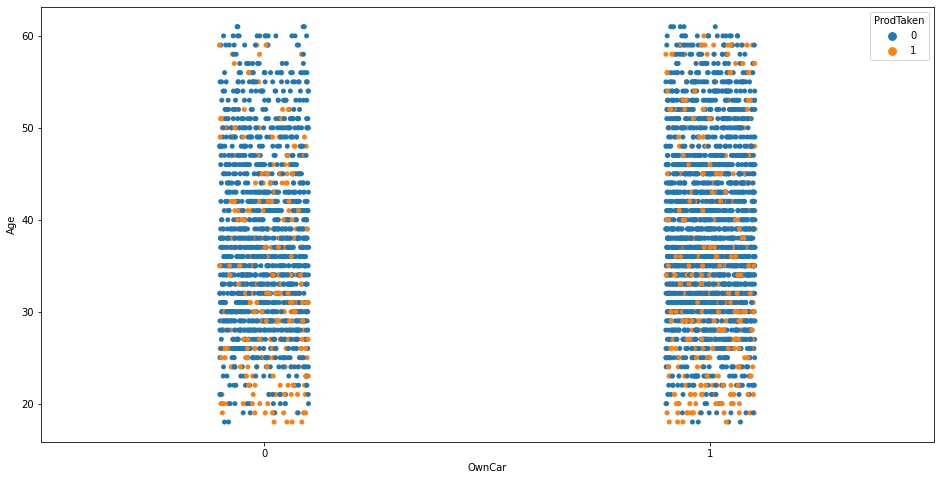

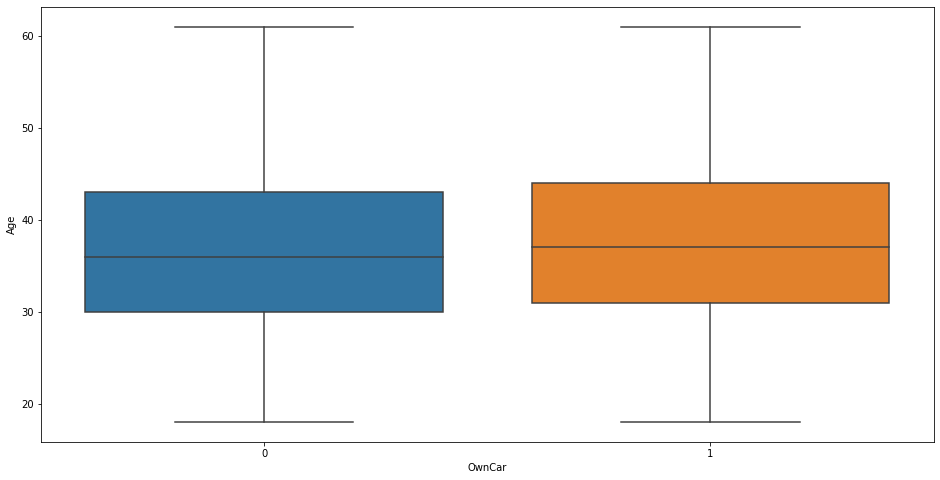

In [83]:
# Create stripplot for OwnCar and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='OwnCar', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='OwnCar', y='Age')
plt.show() 

Nothing specific observed

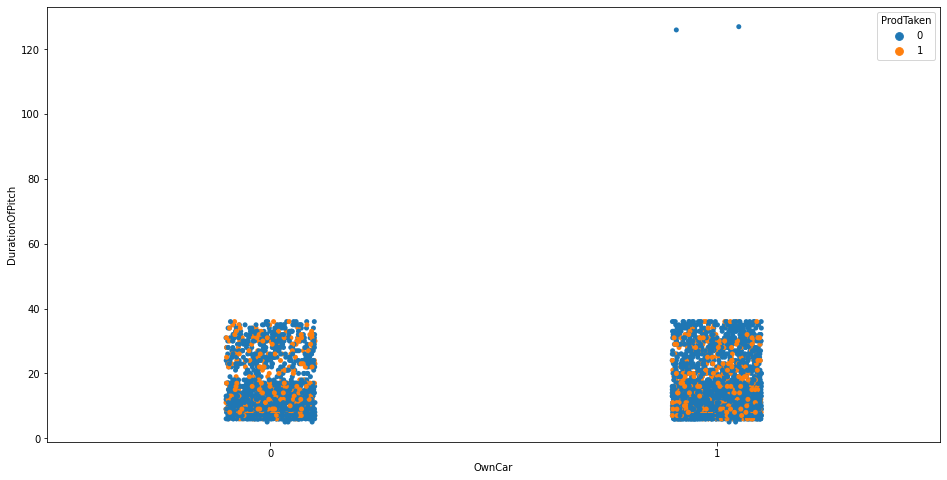

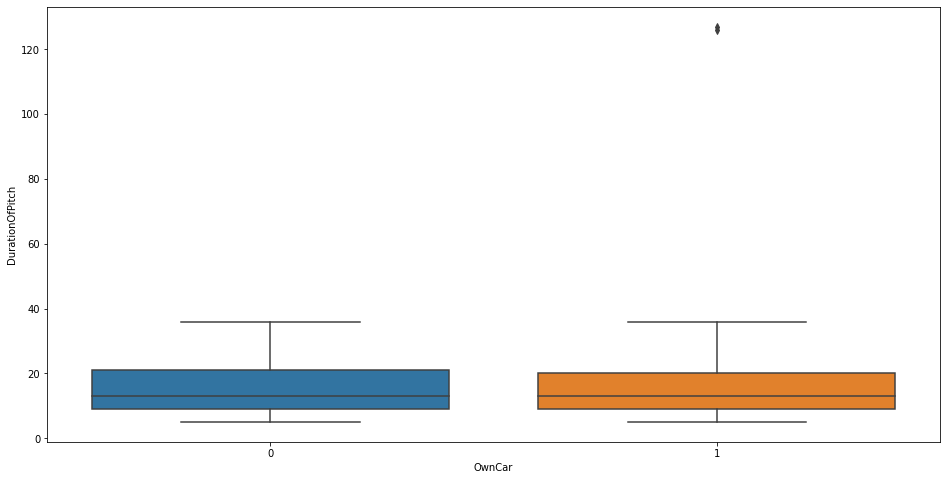

In [84]:
# Create stripplot for OwnCar and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='OwnCar', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='OwnCar', y='DurationOfPitch')
plt.show() 

Nothing specific observed

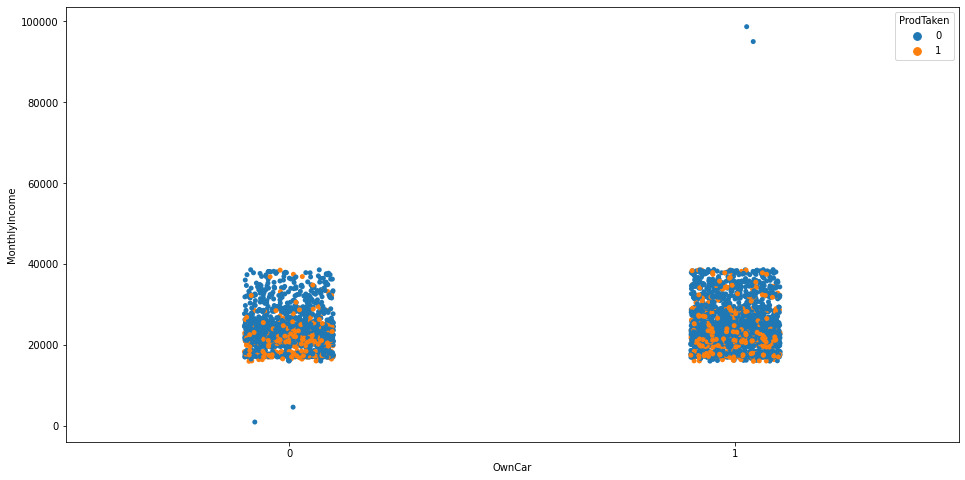

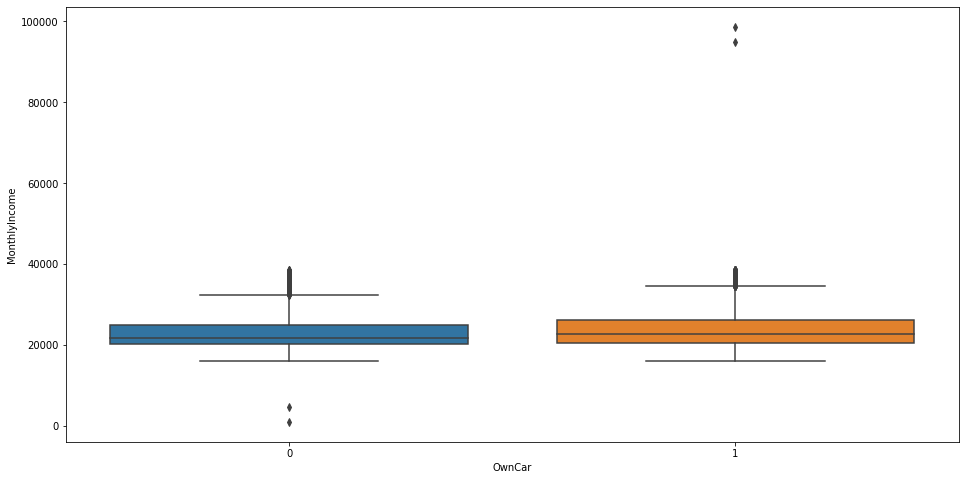

In [85]:
# Create stripplot for OwnCar and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='OwnCar', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='OwnCar', y='MonthlyIncome')
plt.show() 

Nothing specific observed

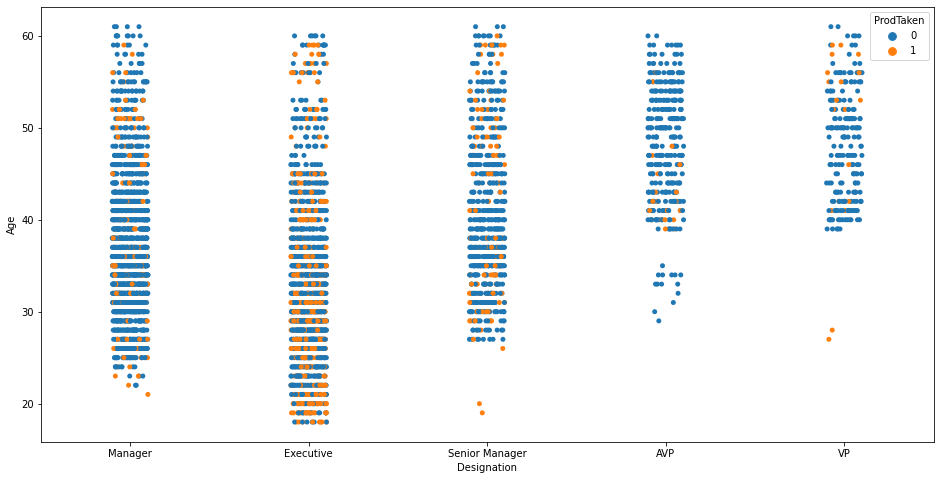

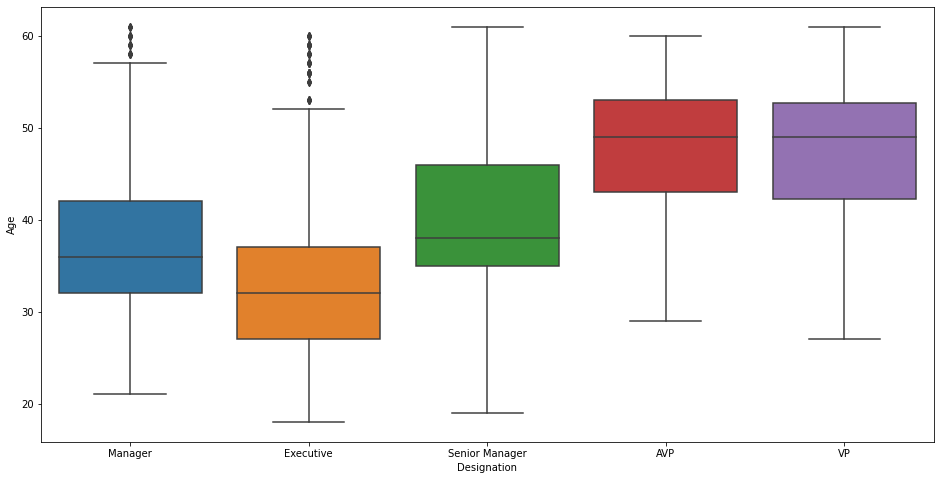

In [86]:
# Create stripplot for Designation and Age, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Designation', y='Age', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Designation', y='Age')
plt.show() 

* Median Age of AVP and VP is the highest.
* Surprisingly, median age for an Executive is the lowest and around 32. Not sure how Executive is defined in the dataset, probably a question for SME.

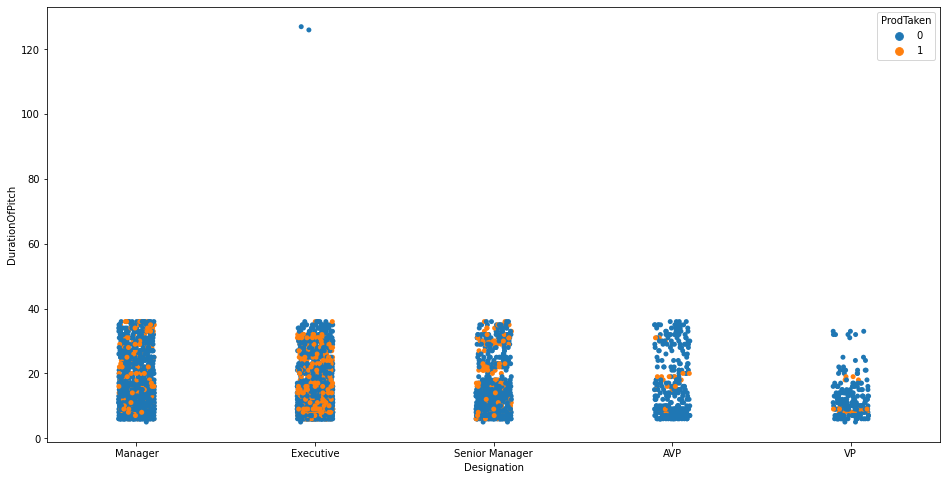

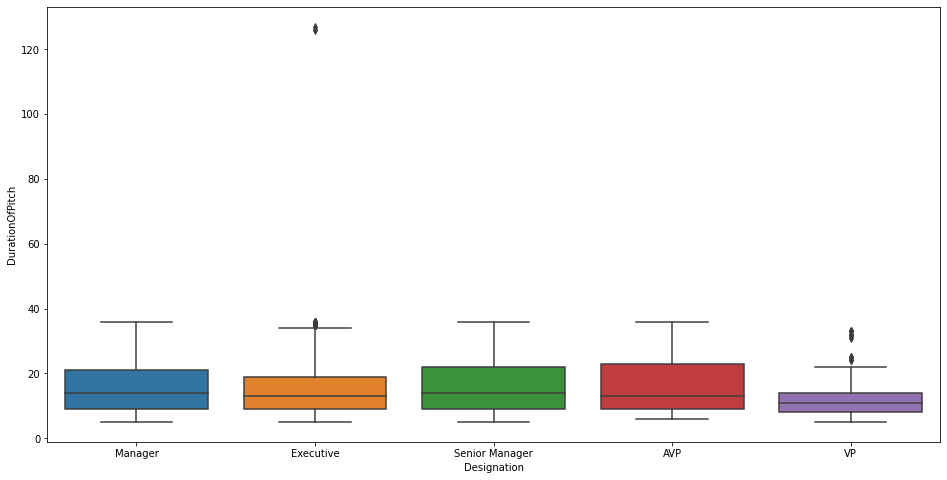

In [87]:
# Create stripplot for Designation and DurationOfPitch, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Designation', y='DurationOfPitch', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Designation', y='DurationOfPitch')
plt.show() 

* Not many AVPs and VPs have purchased the packages. Duration of pitch is highest for AVPs.

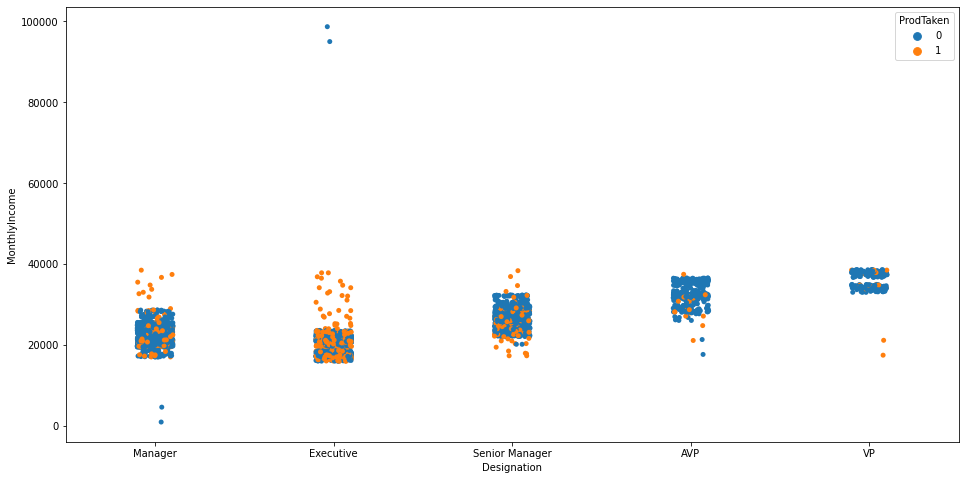

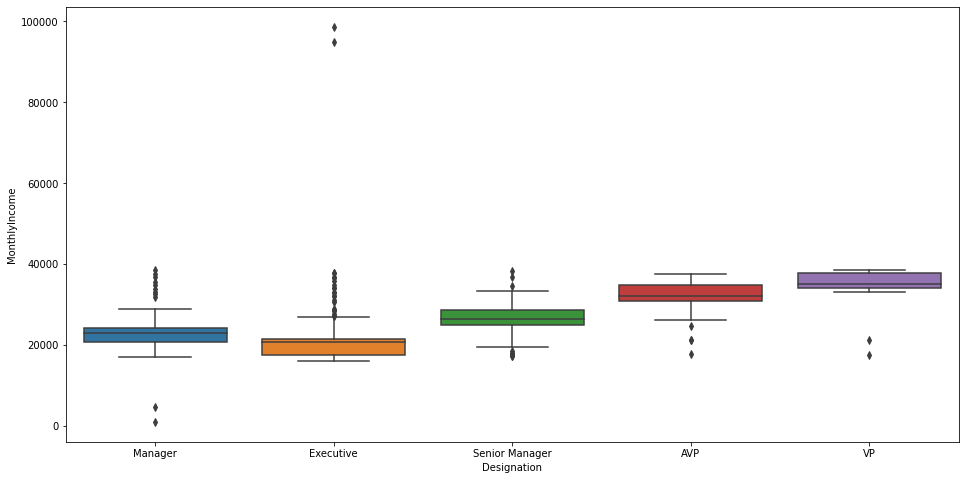

In [88]:
# Create stripplot for Designation and MonthlyIncome, split by ProdTaken.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Designation', y='MonthlyIncome', hue='ProdTaken');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Designation', y='MonthlyIncome')
plt.show() 

* As expected, the order of median monthly income is Executive, Manager, Sr Manager, AVP and then VP. Probably, Executive is used as an individual contributor.

## 8c. EDA - Insights Summary

### Univariate Analysis

* As mentioned in the problem statement, about 18% customer s have taken the product.
* Of all the customers who purchansed the product - 
	* Most initiated the enquiry on their own (Self-Enquiry)
	* Most are in Tier 1 city, followed by Tier 3
	* Most are either Salaried or Small Business owners. Almost none are Free Lancers
	* Majority are males, but females are not very far behind
	* At least 3 follow-ups are needed
	* Most buy 'Basic' package, minimal Super Deluxe and King packages bought
	* Most are interested in 3 star properties
	* Majority are Married or Single
	* Not much difference based on if they own car and have passport, or not
	* Executive have bought most numbr of packages. Percentage of 'conversion' is great for Executives, 552 out of total 1842 records


CityTier
* Tier 1 cities have the most customers
* Most customers are either - Salaried in Tier 1 cities OR Small Business owners in Tier 3 cities
* Basic, which is the most popular package is pitched mostly in Tier 1 cities, why not in other tier cities?


Occupation
* Salaried and Small Business owners are majority of the customers. Among those majority are females

Gender
* More Male customers than Female
* Deluxe package was pitched the most to Females

NumberOfPersonVisiting
* Most customers have a group of 3

NumberOfFollowups
* 3 and 4 times follow-up seems to be the norm
* Executives need more follow-up than other designations

ProductPitched
* Basic and Deluxe are the most pitched packages
* Irrespective of the package, 3 star is most preferred

PreferredPropertyStar
* 3 star properties are the most popular

Designation
* Manager and Executive are most common designations, in that order
* Single customers have disproportionate number of Executives   

NumberOfTrips
* Most common number of trips are 2 & 3
* There are some outliers with significantly high number of trips

Passport
* Majority customers do not have passport

OwnCar
* Most customers do have a car

NumberOfChildrenVisiting
* Significant number of customers have 1 or 2 children under 5 in the group


### Multivariate Analysis


* NO Strong corelation (>= 0.7 absolute value) exists between any features.
  
* Moderate corelation (between 0.3 and 0.7 absolute value) exists between below features - 

  a. Age and MonthlyIncome - More age , more income

  b. NumberOfPersonVisiting and NumberofFollowups - Incidental corelation

  c. NumberOfPersonVisiting and NumberOfChildrenVisiting - Obvious

3. No strong or moderate negative corelation observed.

* Corelations with CustomerID is not considered, it obviously incidental

* No difference in the corelations based on whether customers have taken package or not

* Overall, customers who have opted for the packages have lower Age

* Duration of the picth may have helped, its little higher for customers who purchased the packages

* Not much difference in the monthly income for customers who have or have not purchased the packages

* Similar Age distribution for all designations, except Free Lancers. Median Age is very similar across all occupations

* Similar Duration of pitch distribution for all designations, except Free Lancers

* Similar Monthly income distribution for all designations, except Free Lancers

* Clearly seen that higher Age customers were pitched Super Deluxe and King packages. Younger customers were pitched Basic package

* Not much difference in the monthly incomes of Males and Females. Equality in play! Some female customers have significantly high income as well

* Duration of the pitch is the lowest for King package. All other packages are comparable

* Super Deluxe and King packages are pitched to higher income customers while Basic is pitched to comparatively lower income customers.

* More or less same age distribution across all Marital Status values

* Single and Unmarried customers have comparatively lower monthly income

* Median Age of AVP and VP is the highest.
Surprisingly, median age for an Executive is the lowest and around 32. Not sure how Executive is defined in the dataset, probably a question for SME.

* Not many AVPs and VPs have purchased the packages. Duration of pitch is highest for AVPs.

* As expected, the order of median monthly income is Executive, Manager, Sr Manager, AVP and then VP. Probably, Executive is used as an individual contributor.

# 9. Perform Data Pre-processing

This includes - 
1. Datatype conversions
2. Identify missing values and treat / not treat as appropriate
2. Identify outliers for numeric features and treat / not treat as appropriate
3. Feature Engineering if / as needed
4. Feature Scaling if / as needed

Below datatype conversions are appropriate - 
  * CityTier - Should be Category
  * PreferredPropertyStar - Should be Integer
  * NumberOfTrips -  Should be Integer
  * NumberOfChildrenVisiting -  Should be Integer

Missing values - Verify missing values and decide if / how to treat them - 
  * MonthlyIncome 
  * Age         
  * NumberOfTrips
  * NumberOfChildrenVisiting    
  * PreferredPropertyStar         

Outliers - Verify outlier values and decide if / how to treat them -
  * DurationOfPitch
  * MonthlyIncome
  * NumberOfTrips



In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

NOTE - One of the information points provided is - The model will be built to make predictions before a customer is contacted. Hence, customer interaction data will not be available yet.

Below are the features that are directly related to the customer interaction, so OMITTED from the model - 
  
  1. PitchSatisfactionScore: Sales pitch satisfaction score
  
  2. ProductPitched: Product pitched by the salesperson
  
  3. NumberOfFollowups: Total number of follow-ups has been done by the     salesperson after the sales pitch
  
  4. DurationOfPitch: Duration of the pitch by a salesperson to the customer
  
  5. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)

Below features are retained, assuming that this is the information about potential customers' family.

1. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
2. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer

Above features are interpreted as total number of persons in the household and number of children under 5 in the household.


In [90]:
df.drop(['PitchSatisfactionScore','ProductPitched','NumberOfFollowups', 'DurationOfPitch', 'TypeofContact'], axis=1, inplace=True)

## ProdTaken

In [91]:
df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

ProdTaken - 

  Datatype conversion - Not needed, this is a Target Feature

  Inorrect values treatment - Not needed

  Outliers treatment - Not needed

  Missing values treatment - Not needed

  Feature Enginering - Not needed

  Feature Scaling - Not needed

## Age

In [92]:
df['Age'].isnull().sum()

226

In [93]:
df[df['Age'].isnull()]

CustomerID  ProdTaken  Age  CityTier      Occupation  Gender  \
4         200004          0  NaN         1  Small Business    Male   
11        200011          0  NaN         1        Salaried  Female   
19        200019          0  NaN         1        Salaried    Male   
20        200020          0  NaN         1        Salaried  Female   
21        200021          1  NaN         3        Salaried    Male   
...          ...        ...  ...       ...             ...     ...   
2410      202410          1  NaN         1  Small Business    Male   
2413      202413          1  NaN         3  Small Business    Male   
2427      202427          1  NaN         3  Small Business    Male   
2430      202430          1  NaN         1  Small Business  Female   
2435      202435          1  NaN         2  Small Business  Female   

      NumberOfPersonVisiting  PreferredPropertyStar MaritalStatus  \
4                          2                 4.0000      Divorced   
11                         2                 3.0000        Single   
19                         2                 3.0000        Single   
20                         3                 3.0000       Married   
21                         2                 5.0000        Single   
...                      ...                    ...           ...   
2410                       2                 4.0000       Married   
2413                       2                 3.0000       Married   
2427                       3                 3.0000       Married   
2430                       3                 5.0000       Married   
2435                       3                 4.0000       Married   

      NumberOfTrips  Passport  OwnCar  NumberOfChildrenVisiting  \
4            1.0000         0       1                    0.0000   
11           1.0000         1       0                    0.0000   
19           6.0000         1       0                    1.0000   
20           1.0000         0       1                    2.0000   
21           1.0000         0       0                    0.0000   
...             ...       ...     ...                       ...   
2410         2.0000         1       0                    0.0000   
2413         7.0000         1       0                    1.0000   
2427         3.0000         0       0                    1.0000   
2430         2.0000         1       0                    2.0000   
2435         1.0000         1       0                    1.0000   

         Designation  MonthlyIncome  
4          Executive     18468.0000  
11           Manager            NaN  
19         Executive            NaN  
20           Manager            NaN  
21           Manager     18407.0000  
...              ...            ...  
2410       Executive            NaN  
2413         Manager     18423.0000  
2427  Senior Manager     18544.0000  
2430       Executive            NaN  
2435       Executive     18669.0000  

[226 rows x 15 columns]

In [94]:
# Use median age to treat missing values
# Defning the Simple Imputer funtion to use 'mean' as a strategy of imputation

SI = SimpleImputer(strategy='median')

In [95]:
## Fitting the Simple Imputer function to get the median of the variable , replace values with median

df['Age'] = SI.fit_transform(df[['Age']])

In [96]:
df.head()

CustomerID  ProdTaken     Age  CityTier      Occupation  Gender  \
0      200000          1 41.0000         3        Salaried  Female   
1      200001          0 49.0000         1        Salaried    Male   
2      200002          1 37.0000         1     Free Lancer    Male   
3      200003          0 33.0000         1        Salaried  Female   
4      200004          0 36.0000         1  Small Business    Male   

   NumberOfPersonVisiting  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0                       3                 3.0000        Single         1.0000   
1                       3                 4.0000      Divorced         2.0000   
2                       3                 3.0000        Single         7.0000   
3                       2                 3.0000      Divorced         2.0000   
4                       2                 4.0000      Divorced         1.0000   

   Passport  OwnCar  NumberOfChildrenVisiting Designation  MonthlyIncome  
0         1       1                    0.0000     Manager     20993.0000  
1         0       1                    2.0000     Manager     20130.0000  
2         1       0                    0.0000   Executive     17090.0000  
3         1       1                    1.0000   Executive     17909.0000  
4         0       1                    0.0000   Executive     18468.0000

In [97]:
df['Age'].isnull().sum()

0

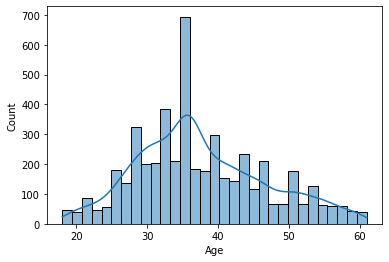

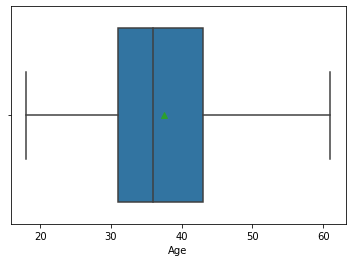

In [98]:
# Use histplots to see distribution for Age

sns.histplot(data=df,x='Age', kde=True)
plt.show()

sns.boxplot(data=df,x='Age', showmeans=True)
plt.show()

In [99]:
# Transform numeric data with PowerTransformer. This includes Standardization as well
#PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

pt = PowerTransformer(method='box-cox')

#df[['Age']] = pt.fit_transform(df[['Age']])

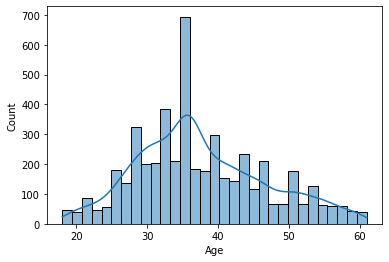

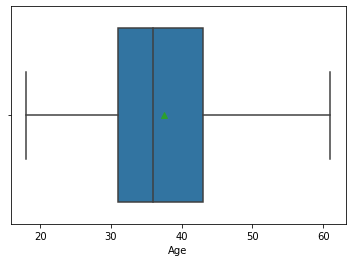

In [100]:
# Use histplots to see distribution for Age

sns.histplot(data=df,x='Age', kde=True)
plt.show()

sns.boxplot(data=df,x='Age', showmeans=True)
plt.show()

Age - 

Datatype conversion - Not needed 

Inorrect values treatment - Not needed

Outliers treatment - Not needed

Missing values treatment - Treated by replacing missing values by median. This also could be done separately for Train and Test datasets to avoid Data Leakage.

Feature Enginering - Not needed

Feature Scaling - Values are transformed / scaled using BoxCox

## CityTier

In [101]:
# Datatype conversion

df['CityTier'] = df['CityTier'].astype('category')

In [102]:
df['CityTier'].value_counts()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

In [103]:
df['CityTier'] = df['CityTier'].replace({1:'Tier1', 2:'Tier2', 3:'Tier3'})

In [104]:
df['CityTier'].value_counts()

Tier1    3190
Tier3    1500
Tier2     198
Name: CityTier, dtype: int64

In [105]:
# One Hot Encoding of categorical features

df = pd.get_dummies(df, columns=['CityTier'], drop_first=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   Occupation                4888 non-null   object 
 4   Gender                    4888 non-null   object 
 5   NumberOfPersonVisiting    4888 non-null   int64  
 6   PreferredPropertyStar     4862 non-null   float64
 7   MaritalStatus             4888 non-null   object 
 8   NumberOfTrips             4748 non-null   float64
 9   Passport                  4888 non-null   int64  
 10  OwnCar                    4888 non-null   int64  
 11  NumberOfChildrenVisiting  4822 non-null   float64
 12  Designation               4888 non-null   object 
 13  MonthlyIncome             4655 non-null   float64
 14  CityTier

CityTier -

Datatype conversion - Done. Also changed values to string values so that One Hot Encoding can be done

Inorrect values treatment - Not needed

Outliers treatment - Not needed

Missing values treatment - Not needed

Feature Enginering - One Hot Encoding done

Feature Scaling - Not needed

## Occupation

In [107]:
# Datatype conversion

#df['Occupation'] = df['CityTier'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   Occupation                4888 non-null   object 
 4   Gender                    4888 non-null   object 
 5   NumberOfPersonVisiting    4888 non-null   int64  
 6   PreferredPropertyStar     4862 non-null   float64
 7   MaritalStatus             4888 non-null   object 
 8   NumberOfTrips             4748 non-null   float64
 9   Passport                  4888 non-null   int64  
 10  OwnCar                    4888 non-null   int64  
 11  NumberOfChildrenVisiting  4822 non-null   float64
 12  Designation               4888 non-null   object 
 13  MonthlyIncome             4655 non-null   float64
 14  CityTier

In [108]:
df['Occupation'].value_counts()

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

In [109]:
# One Hot Encoding of categorical features

df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 4888 non-null   int64  
 1   ProdTaken                  4888 non-null   int64  
 2   Age                        4888 non-null   float64
 3   Gender                     4888 non-null   object 
 4   NumberOfPersonVisiting     4888 non-null   int64  
 5   PreferredPropertyStar      4862 non-null   float64
 6   MaritalStatus              4888 non-null   object 
 7   NumberOfTrips              4748 non-null   float64
 8   Passport                   4888 non-null   int64  
 9   OwnCar                     4888 non-null   int64  
 10  NumberOfChildrenVisiting   4822 non-null   float64
 11  Designation                4888 non-null   object 
 12  MonthlyIncome              4655 non-null   float64
 13  CityTier_Tier2             4888 non-null   uint8

Occupation -

Datatype conversion - Not needed

Inorrect values treatment - Not needed

Outliers treatment - Not needed

Missing values treatment - Not needed

Feature Enginering - One Hot Encoding done

Feature Scaling - Not needed

## Gender

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 4888 non-null   int64  
 1   ProdTaken                  4888 non-null   int64  
 2   Age                        4888 non-null   float64
 3   Gender                     4888 non-null   object 
 4   NumberOfPersonVisiting     4888 non-null   int64  
 5   PreferredPropertyStar      4862 non-null   float64
 6   MaritalStatus              4888 non-null   object 
 7   NumberOfTrips              4748 non-null   float64
 8   Passport                   4888 non-null   int64  
 9   OwnCar                     4888 non-null   int64  
 10  NumberOfChildrenVisiting   4822 non-null   float64
 11  Designation                4888 non-null   object 
 12  MonthlyIncome              4655 non-null   float64
 13  CityTier_Tier2             4888 non-null   uint8

In [112]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [113]:
# One Hot Encoding of categorical features

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 4888 non-null   int64  
 1   ProdTaken                  4888 non-null   int64  
 2   Age                        4888 non-null   float64
 3   NumberOfPersonVisiting     4888 non-null   int64  
 4   PreferredPropertyStar      4862 non-null   float64
 5   MaritalStatus              4888 non-null   object 
 6   NumberOfTrips              4748 non-null   float64
 7   Passport                   4888 non-null   int64  
 8   OwnCar                     4888 non-null   int64  
 9   NumberOfChildrenVisiting   4822 non-null   float64
 10  Designation                4888 non-null   object 
 11  MonthlyIncome              4655 non-null   float64
 12  CityTier_Tier2             4888 non-null   uint8  
 13  CityTier_Tier3             4888 non-null   uint8

Gender -

Datatype conversion - Not needed

Inorrect values treatment - Not needed

Outliers treatment - Not needed

Missing values treatment - Not needed

Feature Enginering - One Hot Encoding done

Feature Scaling - Not needed

## NumberOfPersonVisiting

In [115]:
df['NumberOfPersonVisiting'].value_counts()

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

NumberOfPersonVisiting - 

Datatype conversion - Not needed. Numeric value is correct

Inorrect values treatment - Not needed

Outliers treatment - Not needed

Missing values treatment - Not needed

Feature Enginering - Not needed, numeric value is correct

Feature Scaling - Not needed

## PreferredPropertyStar

In [116]:
df['PreferredPropertyStar'].value_counts()

3.0000    2993
5.0000     956
4.0000     913
Name: PreferredPropertyStar, dtype: int64

In [117]:
df['PreferredPropertyStar'].isnull().sum()

26

In [118]:
df[df['PreferredPropertyStar'].isnull()]

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
38        200038          0 36.0000                       2   
2609      202609          0 51.0000                       3   
2634      202634          0 53.0000                       4   
3012      203012          1 56.0000                       4   
3190      203190          0 42.0000                       3   
3193      203193          1 53.0000                       3   
3214      203214          0 47.0000                       3   
3295      203295          0 57.0000                       4   
3342      203342          0 44.0000                       4   
3362      203362          0 52.0000                       3   
3400      203400          0 57.0000                       3   
3453      203453          0 59.0000                       4   
3598      203598          0 48.0000                       4   
3686      203686          0 41.0000                       3   
3775      203775          0 49.0000                       4   
3845      203845          0 56.0000                       4   
4079      204079          0 51.0000                       3   
4104      204104          0 53.0000                       4   
4482      204482          1 56.0000                       4   
4660      204660          0 42.0000                       3   
4663      204663          1 53.0000                       3   
4684      204684          0 47.0000                       3   
4765      204765          0 57.0000                       4   
4812      204812          0 44.0000                       4   
4832      204832          1 52.0000                       4   
4870      204870          1 57.0000                       4   

      PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  OwnCar  \
38                      NaN      Divorced         1.0000         1       1   
2609                    NaN        Single         5.0000         0       1   
2634                    NaN      Divorced         2.0000         0       1   
3012                    NaN      Divorced         7.0000         1       1   
3190                    NaN       Married         3.0000         0       1   
3193                    NaN      Divorced         3.0000         0       1   
3214                    NaN       Married         2.0000         0       1   
3295                    NaN       Married         6.0000         0       0   
3342                    NaN      Divorced         5.0000         0       1   
3362                    NaN       Married         6.0000         1       1   
3400                    NaN        Single         8.0000         0       1   
3453                    NaN      Divorced         5.0000         1       1   
3598                    NaN       Married         5.0000         0       1   
3686                    NaN        Single         3.0000         0       1   
3775                    NaN       Married         6.0000         0       1   
3845                    NaN       Married         6.0000         1       1   
4079                    NaN        Single         5.0000         0       0   
4104                    NaN       Married         2.0000         0       1   
4482                    NaN       Married         7.0000         1       1   
4660                    NaN       Married         3.0000         0       1   
4663                    NaN       Married         3.0000         0       1   
4684                    NaN       Married         2.0000         0       1   
4765                    NaN       Married         6.0000         0       1   
4812                    NaN       Married         5.0000         0       1   
4832                    NaN        Single         5.0000         0       0   
4870                    NaN        Single         4.0000         1       1   

      NumberOfChildrenVisiting     Designation  MonthlyIncome  CityTier_Tier2  \
38                      0.0000       Executive     95000.0000               0   
2609                    1.0000     

In [119]:
df['PreferredPropertyStar'].describe()

count   4862.0000
mean       3.5810
std        0.7980
min        3.0000
25%        3.0000
50%        3.0000
75%        4.0000
max        5.0000
Name: PreferredPropertyStar, dtype: float64

In [120]:
df.head()

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
0      200000          1 41.0000                       3   
1      200001          0 49.0000                       3   
2      200002          1 37.0000                       3   
3      200003          0 33.0000                       2   
4      200004          0 36.0000                       2   

   PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  OwnCar  \
0                 3.0000        Single         1.0000         1       1   
1                 4.0000      Divorced         2.0000         0       1   
2                 3.0000        Single         7.0000         1       0   
3                 3.0000      Divorced         2.0000         1       1   
4                 4.0000      Divorced         1.0000         0       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  CityTier_Tier2  \
0                    0.0000     Manager     20993.0000               0   
1                    2.0000     Manager     20130.0000               0   
2                    0.0000   Executive     17090.0000               0   
3                    1.0000   Executive     17909.0000               0   
4                    0.0000   Executive     18468.0000               0   

   CityTier_Tier3  Occupation_Large Business  Occupation_Salaried  \
0               1                          0                    1   
1               0                          0                    1   
2               0                          0                    0   
3               0                          0                    1   
4               0                          0                    0   

   Occupation_Small Business  Gender_Male  
0                          0            0  
1                          0            1  
2                          0            1  
3                          0            0  
4                          1            1

In [121]:
## Fitting the Simple Imputer function to get the median of the variable , replace values with median

df['PreferredPropertyStar'] = SI.fit_transform(df[['PreferredPropertyStar']])

In [122]:
df.head()

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
0      200000          1 41.0000                       3   
1      200001          0 49.0000                       3   
2      200002          1 37.0000                       3   
3      200003          0 33.0000                       2   
4      200004          0 36.0000                       2   

   PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  OwnCar  \
0                 3.0000        Single         1.0000         1       1   
1                 4.0000      Divorced         2.0000         0       1   
2                 3.0000        Single         7.0000         1       0   
3                 3.0000      Divorced         2.0000         1       1   
4                 4.0000      Divorced         1.0000         0       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  CityTier_Tier2  \
0                    0.0000     Manager     20993.0000               0   
1                    2.0000     Manager     20130.0000               0   
2                    0.0000   Executive     17090.0000               0   
3                    1.0000   Executive     17909.0000               0   
4                    0.0000   Executive     18468.0000               0   

   CityTier_Tier3  Occupation_Large Business  Occupation_Salaried  \
0               1                          0                    1   
1               0                          0                    1   
2               0                          0                    0   
3               0                          0                    1   
4               0                          0                    0   

   Occupation_Small Business  Gender_Male  
0                          0            0  
1                          0            1  
2                          0            1  
3                          0            0  
4                          1            1

In [123]:
df['PreferredPropertyStar'].isnull().sum()

0

In [124]:
# Datatype conversion

df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype('int')

In [125]:
df['PreferredPropertyStar'].value_counts()

3    3019
5     956
4     913
Name: PreferredPropertyStar, dtype: int64

PreferredPropertyStar - 

Datatype conversion - Done

Inorrect values treatment - Not needed

Outliers treatment - Not needed

Missing values treatment - Treated by replacing missing values by median. This also could be done separately for Train and Test datasets to avoid Data Leakage.

Feature Enginering - Not needed

Feature Scaling - Not needed

## MaritalStatus

In [126]:
df['MaritalStatus'].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [127]:
df['MaritalStatus'].isnull().sum()

0

In [128]:
# One Hot Encoding of categorical features

df = pd.get_dummies(df, columns=['MaritalStatus'], drop_first=True)

MaritalStatus - 

Datatype conversion - Not needed

Inorrect values treatment - Not needed

Outliers treatment - Not needed

Missing values treatment - Not needed

Feature Enginering - One Hot Encoding done

Feature Scaling - Not needed

## NumberOfTrips

In [129]:
df['NumberOfTrips'].value_counts()

2.0000     1464
3.0000     1079
1.0000      620
4.0000      478
5.0000      458
6.0000      322
7.0000      218
8.0000      105
19.0000       1
21.0000       1
20.0000       1
22.0000       1
Name: NumberOfTrips, dtype: int64

In [130]:
df['NumberOfTrips'].isnull().sum()

140

In [131]:
df[df['NumberOfTrips'].isnull()]

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
2469      202469          0 54.0000                       3   
2473      202473          0 47.0000                       3   
2506      202506          0 51.0000                       3   
2549      202549          0 60.0000                       3   
2550      202550          0 51.0000                       4   
2556      202556          0 55.0000                       2   
2563      202563          0 44.0000                       4   
2567      202567          0 52.0000                       3   
2591      202591          0 42.0000                       4   
2630      202630          0 41.0000                       3   
2631      202631          0 56.0000                       4   
2675      202675          0 43.0000                       3   
2677      202677          0 51.0000                       4   
2681      202681          0 53.0000                       4   
2688      202688          0 46.0000                       4   
2701      202701          0 41.0000                       3   
2714      202714          0 56.0000                       3   
2723      202723          0 51.0000                       4   
2724      202724          0 54.0000                       3   
2734      202734          0 50.0000                       3   
2758      202758          0 40.0000                       3   
2770      202770          0 40.0000                       3   
2773      202773          0 48.0000                       3   
2836      202836          0 55.0000                       3   
2844      202844          0 40.0000                       3   
2861      202861          0 41.0000                       4   
2869      202869          0 51.0000                       3   
2873      202873          0 47.0000                       3   
2917      202917          0 50.0000                       3   
2921      202921          0 51.0000                       3   
2941      202941          0 45.0000                       3   
2979      202979          0 42.0000                       4   
2982      202982          0 42.0000                       3   
3028      203028          0 43.0000                       4   
3032      203032          0 51.0000                       4   
3039      203039          1 59.0000                       3   
3053      203053          0 44.0000                       4   
3097      203097          0 51.0000                       4   
3143      203143          0 53.0000                       4   
3154      203154          0 34.0000                       3   
3158      203158          0 51.0000                       4   
3160      203160          0 42.0000                       4   
3185      203185          0 43.0000                       3   
3199      203199          0 46.0000                       3   
3210      203210          0 51.0000                       4   
3243      203243          0 43.0000                       3   
3254      203254          0 47.0000                       3   
3302      203302          0 54.0000                       3   
3305      203305          0 47.0000                       4   
3311      203311          0 51.0000                       2   
3313      203313          0 47.0000                       3   
3338      203338          0 55.0000                       3   
3343      203343          0 50.0000                       3   
3348      203348          0 49.0000                       4   
3351      203351          0 45.0000                       3   
3357      203357          1 46.0000                       4   
3360      203360          0 47.0000                       3   
3366      203366          0 45.0000                       4   
3380      203380          0 46.0000                       3   
3381      203381          0 40.0000                       4   
3398      203398          0 43.0000                       3   
3399      203399          0 56.0000                       3   
3452      203452          0 55.0000  

In [132]:
df['NumberOfTrips'].describe()

count   4748.0000
mean       3.2365
std        1.8490
min        1.0000
25%        2.0000
50%        3.0000
75%        4.0000
max       22.0000
Name: NumberOfTrips, dtype: float64

In [133]:
df.head()

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
0      200000          1 41.0000                       3   
1      200001          0 49.0000                       3   
2      200002          1 37.0000                       3   
3      200003          0 33.0000                       2   
4      200004          0 36.0000                       2   

   PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
0                      3         1.0000         1       1   
1                      4         2.0000         0       1   
2                      3         7.0000         1       0   
3                      3         2.0000         1       1   
4                      4         1.0000         0       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  CityTier_Tier2  \
0                    0.0000     Manager     20993.0000               0   
1                    2.0000     Manager     20130.0000               0   
2                    0.0000   Executive     17090.0000               0   
3                    1.0000   Executive     17909.0000               0   
4                    0.0000   Executive     18468.0000               0   

   CityTier_Tier3  Occupation_Large Business  Occupation_Salaried  \
0               1                          0                    1   
1               0                          0                    1   
2               0                          0                    0   
3               0                          0                    1   
4               0                          0                    0   

   Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
0                          0            0                      0   
1                          0            1                      0   
2                          0            1                      0   
3                          0            0                      0   
4                          1            1                      0   

   MaritalStatus_Single  MaritalStatus_Unmarried  
0                     1                        0  
1                     0                        0  
2                     1                        0  
3                     0                        0  
4                     0                        0

In [134]:
## Fitting the Simple Imputer function to get the median of the variable , replace values with median

df['NumberOfTrips'] = SI.fit_transform(df[['NumberOfTrips']])

In [135]:
df.head()

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
0      200000          1 41.0000                       3   
1      200001          0 49.0000                       3   
2      200002          1 37.0000                       3   
3      200003          0 33.0000                       2   
4      200004          0 36.0000                       2   

   PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
0                      3         1.0000         1       1   
1                      4         2.0000         0       1   
2                      3         7.0000         1       0   
3                      3         2.0000         1       1   
4                      4         1.0000         0       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  CityTier_Tier2  \
0                    0.0000     Manager     20993.0000               0   
1                    2.0000     Manager     20130.0000               0   
2                    0.0000   Executive     17090.0000               0   
3                    1.0000   Executive     17909.0000               0   
4                    0.0000   Executive     18468.0000               0   

   CityTier_Tier3  Occupation_Large Business  Occupation_Salaried  \
0               1                          0                    1   
1               0                          0                    1   
2               0                          0                    0   
3               0                          0                    1   
4               0                          0                    0   

   Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
0                          0            0                      0   
1                          0            1                      0   
2                          0            1                      0   
3                          0            0                      0   
4                          1            1                      0   

   MaritalStatus_Single  MaritalStatus_Unmarried  
0                     1                        0  
1                     0                        0  
2                     1                        0  
3                     0                        0  
4                     0                        0

In [136]:
df['NumberOfTrips'].isnull().sum()

0

In [137]:
# Datatype conversion

df['NumberOfTrips'] = df['NumberOfTrips'].astype('int')

In [138]:
df['NumberOfTrips'].value_counts()

2     1464
3     1219
1      620
4      478
5      458
6      322
7      218
8      105
19       1
21       1
20       1
22       1
Name: NumberOfTrips, dtype: int64

NumberOfTrips - 

Datatype conversion - Done

Inorrect values treatment - Not needed

Outliers treatment - Not needed. There are couple of values with > 8 trips. In real scenario, we would have checked with SME. But its still possible, so not treating outliers.

Missing values treatment - Treated by replacing missing values by median. This also could be done separately for Train and Test datasets to avoid Data Leakage.

Feature Enginering - Not needed

Feature Scaling - Not needed

## Passport

In [139]:
# Datatype conversion

df['Passport'] = df['Passport'].astype('int')

In [140]:
df['Passport'].value_counts()

0    3466
1    1422
Name: Passport, dtype: int64

Passport - 

  Datatype conversion - Done

  Inorrect values treatment - Not needed

  Outliers treatment - Not needed

  Missing values treatment - Not needed

  Feature Enginering - Not needed

  Feature Scaling - Not needed

## OwnCar

In [141]:
df['OwnCar'].value_counts()

1    3032
0    1856
Name: OwnCar, dtype: int64

In [142]:
df['OwnCar'].value_counts()

1    3032
0    1856
Name: OwnCar, dtype: int64

In [143]:
# Datatype conversion

df['OwnCar'] = df['OwnCar'].astype('int')

OwnCar - 

  Datatype conversion - Done

  Inorrect values treatment - Not needed

  Outliers treatment - Not needed

  Missing values treatment - Not needed

  Feature Enginering - Not needed

  Feature Scaling - Not needed

## NumberOfChildrenVisiting

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 4888 non-null   int64  
 1   ProdTaken                  4888 non-null   int64  
 2   Age                        4888 non-null   float64
 3   NumberOfPersonVisiting     4888 non-null   int64  
 4   PreferredPropertyStar      4888 non-null   int64  
 5   NumberOfTrips              4888 non-null   int64  
 6   Passport                   4888 non-null   int64  
 7   OwnCar                     4888 non-null   int64  
 8   NumberOfChildrenVisiting   4822 non-null   float64
 9   Designation                4888 non-null   object 
 10  MonthlyIncome              4655 non-null   float64
 11  CityTier_Tier2             4888 non-null   uint8  
 12  CityTier_Tier3             4888 non-null   uint8  
 13  Occupation_Large Business  4888 non-null   uint8

In [145]:
df['NumberOfChildrenVisiting'].value_counts()

1.0000    2080
2.0000    1335
0.0000    1082
3.0000     325
Name: NumberOfChildrenVisiting, dtype: int64

In [146]:
df['NumberOfChildrenVisiting'].isnull().sum()

66

In [147]:
df[df['NumberOfChildrenVisiting'].isnull()].head()

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
165      200165          0 50.0000                       2   
190      200190          0 52.0000                       3   
568      200568          1 55.0000                       3   
746      200746          0 41.0000                       2   
749      200749          1 52.0000                       2   

     PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
165                      4              4         0       1   
190                      3              1         0       1   
568                      5              6         1       1   
746                      3              2         0       1   
749                      3              2         0       1   

     NumberOfChildrenVisiting Designation  MonthlyIncome  CityTier_Tier2  \
165                       NaN          VP     34926.0000               0   
190                       NaN          VP     34999.0000               0   
568                       NaN          VP     34859.0000               0   
746                       NaN          VP     34973.0000               0   
749                       NaN          VP     34845.0000               0   

     CityTier_Tier3  Occupation_Large Business  Occupation_Salaried  \
165               0                          0                    1   
190               0                          0                    1   
568               0                          0                    0   
746               0                          0                    1   
749               1                          0                    0   

     Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
165                          0            0                      0   
190                          0            1                      0   
568                          1            1                      0   
746                          0            0                      1   
749                          1            0                      0   

     MaritalStatus_Single  MaritalStatus_Unmarried  
165                     1                        0  
190                     0                        0  
568                     0                        0  
746                     0                        0  
749                     0                        0

In [148]:
df[df['NumberOfChildrenVisiting'].isnull()]['NumberOfPersonVisiting'].value_counts()

3    39
4    16
2    11
Name: NumberOfPersonVisiting, dtype: int64

In [149]:
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

In [150]:
# Datatype conversion

df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].astype('int')

In [151]:
df['NumberOfChildrenVisiting'].value_counts()

1    2080
2    1335
0    1148
3     325
Name: NumberOfChildrenVisiting, dtype: int64

NumberOfChildrenVisiting - 

Datatype conversion - Done

Inorrect values treatment - Not needed

Outliers treatment - Not needed

Missing values treatment - Done, using filling the missing values with 0

Feature Enginering - Not needed

Feature Scaling - Not needed

## Designation

In [152]:
df['Designation'].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [153]:
df['Designation'].isnull().sum()

0

In [154]:
# One Hot Encoding of categorical features

df = pd.get_dummies(df, columns=['Designation'], drop_first=True)

Designation - 

Datatype conversion - Not needed

Inorrect values treatment - Not needed

Outliers treatment - Not needed

Missing values treatment - Not needed

Feature Enginering - One Hot Encoding done

Feature Scaling - Not needed

## MonthlyIncome

In [155]:
df['MonthlyIncome'].isnull().sum()

233

In [156]:
df[df['MonthlyIncome'].isnull()]

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
11        200011          0 36.0000                       2   
19        200019          0 36.0000                       2   
20        200020          0 36.0000                       3   
26        200026          1 36.0000                       3   
44        200044          0 36.0000                       2   
...          ...        ...     ...                     ...   
2390      202390          1 34.0000                       2   
2399      202399          1 36.0000                       2   
2410      202410          1 36.0000                       2   
2430      202430          1 36.0000                       3   
2431      202431          1 35.0000                       3   

      PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
11                        3              1         1       0   
19                        3              6         1       0   
20                        3              1         0       1   
26                        5              2         1       1   
44                        3              2         0       1   
...                     ...            ...       ...     ...   
2390                      3              2         0       0   
2399                      4              6         0       1   
2410                      4              2         1       0   
2430                      5              2         1       0   
2431                      4              2         1       1   

      NumberOfChildrenVisiting  MonthlyIncome  CityTier_Tier2  CityTier_Tier3  \
11                           0            NaN               0               0   
19                           1            NaN               0               0   
20                           2            NaN               0               0   
26                           2            NaN               0               0   
44                           0            NaN               0               0   
...                        ...            ...             ...             ...   
2390                         1            NaN               0               1   
2399                         0            NaN               0               1   
2410                         0            NaN               0               0   
2430                         2            NaN               0               0   
2431                         0            NaN               0               0   

      Occupation_Large Business  Occupation_Salaried  \
11                            0                    1   
19                            0                    1   
20                            0                    1   
26                            0                    1   
44                            0                    0   
...                         ...                  ...   
2390                          0                    1   
2399                          1                    0   
2410                          0                    0   
2430                          0                    0   
2431                          0                    0   

      Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
11                            0            0                      0   
19                            0            1                      0   
20                            0            0                      1   
26                            0            0                      0   
44                            1            0                      0   
...                         ...          ...                    ...   
2390                          0            0                      0   
2399                          0            0                      0   
2410                          1            1                      1   
2430                          1            0                      1   
2431                          1            1         

In [157]:
df['MonthlyIncome'].describe()

count    4655.0000
mean    23619.8535
std      5380.6984
min      1000.0000
25%     20346.0000
50%     22347.0000
75%     25571.0000
max     98678.0000
Name: MonthlyIncome, dtype: float64

In [158]:
df.head()

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
0      200000          1 41.0000                       3   
1      200001          0 49.0000                       3   
2      200002          1 37.0000                       3   
3      200003          0 33.0000                       2   
4      200004          0 36.0000                       2   

   PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
0                      3              1         1       1   
1                      4              2         0       1   
2                      3              7         1       0   
3                      3              2         1       1   
4                      4              1         0       1   

   NumberOfChildrenVisiting  MonthlyIncome  CityTier_Tier2  CityTier_Tier3  \
0                         0     20993.0000               0               1   
1                         2     20130.0000               0               0   
2                         0     17090.0000               0               0   
3                         1     17909.0000               0               0   
4                         0     18468.0000               0               0   

   Occupation_Large Business  Occupation_Salaried  Occupation_Small Business  \
0                          0                    1                          0   
1                          0                    1                          0   
2                          0                    0                          0   
3                          0                    1                          0   
4                          0                    0                          1   

   Gender_Male  MaritalStatus_Married  MaritalStatus_Single  \
0            0                      0                     1   
1            1                      0                     0   
2            1                      0                     1   
3            0                      0                     0   
4            1                      0                     0   

   MaritalStatus_Unmarried  Designation_Executive  Designation_Manager  \
0                        0                      0                    1   
1                        0                      0                    1   
2                        0                      1                    0   
3                        0                      1                    0   
4                        0                      1                    0   

   Designation_Senior Manager  Designation_VP  
0                           0               0  
1                           0               0  
2                           0               0  
3                           0               0  
4                           0               0

In [159]:
## Fitting the Simple Imputer function to get the median of the variable , replace values with median

df['MonthlyIncome'] = SI.fit_transform(df[['MonthlyIncome']])

In [160]:
df.head()

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
0      200000          1 41.0000                       3   
1      200001          0 49.0000                       3   
2      200002          1 37.0000                       3   
3      200003          0 33.0000                       2   
4      200004          0 36.0000                       2   

   PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
0                      3              1         1       1   
1                      4              2         0       1   
2                      3              7         1       0   
3                      3              2         1       1   
4                      4              1         0       1   

   NumberOfChildrenVisiting  MonthlyIncome  CityTier_Tier2  CityTier_Tier3  \
0                         0     20993.0000               0               1   
1                         2     20130.0000               0               0   
2                         0     17090.0000               0               0   
3                         1     17909.0000               0               0   
4                         0     18468.0000               0               0   

   Occupation_Large Business  Occupation_Salaried  Occupation_Small Business  \
0                          0                    1                          0   
1                          0                    1                          0   
2                          0                    0                          0   
3                          0                    1                          0   
4                          0                    0                          1   

   Gender_Male  MaritalStatus_Married  MaritalStatus_Single  \
0            0                      0                     1   
1            1                      0                     0   
2            1                      0                     1   
3            0                      0                     0   
4            1                      0                     0   

   MaritalStatus_Unmarried  Designation_Executive  Designation_Manager  \
0                        0                      0                    1   
1                        0                      0                    1   
2                        0                      1                    0   
3                        0                      1                    0   
4                        0                      1                    0   

   Designation_Senior Manager  Designation_VP  
0                           0               0  
1                           0               0  
2                           0               0  
3                           0               0  
4                           0               0

In [161]:
df['MonthlyIncome'].isnull().sum()

0

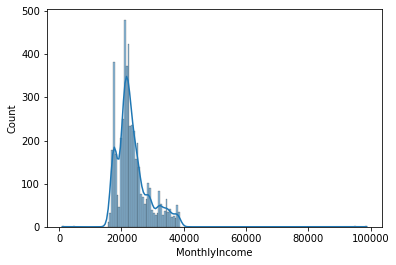

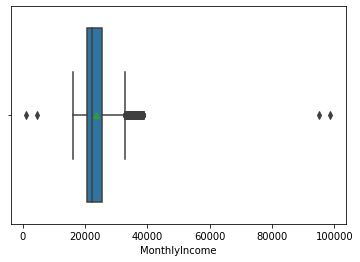

In [162]:
# Use histplots to see distribution for MonthlyIncome

sns.histplot(data=df,x='MonthlyIncome', kde=True)
plt.show()

sns.boxplot(data=df,x='MonthlyIncome', showmeans=True)
plt.show()

In [163]:
# Calculate quantile and IQR values for MonthlyIncome

Temp_v = 'MonthlyIncome'
Temp_q1_MonthlyIncome = df[Temp_v].quantile(0.25)
Temp_q2_MonthlyIncome = df[Temp_v].quantile(0.5)
Temp_q3_MonthlyIncome = df[Temp_v].quantile(0.75)
Temp_iqr_MonthlyIncome = Temp_q3_MonthlyIncome-Temp_q1_MonthlyIncome

print('Median for' , Temp_v , 'is: ', Temp_q2_MonthlyIncome)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_MonthlyIncome)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_MonthlyIncome)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_MonthlyIncome, '\n')

Median for MonthlyIncome is:  22347.0
1st Quartile for MonthlyIncome is:  20485.0
3rd Quartile for MonthlyIncome is:  25424.75
IQR for MonthlyIncome is:  4939.75 



In [164]:
# Check on upper outliers

Temp_upper_whisker_MonthlyIncome = Temp_q3_MonthlyIncome + (1.5 * Temp_iqr_MonthlyIncome)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_MonthlyIncome, '\n')
print('Records above Upper Whisker are \n')
df[df[Temp_v] > Temp_upper_whisker_MonthlyIncome].sort_values(by='MonthlyIncome', ascending=False)

Upper Whisker for MonthlyIncome is:  32834.375 

Records above Upper Whisker are 



CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
2482      202482          0 37.0000                       3   
38        200038          0 36.0000                       2   
2634      202634          0 53.0000                       4   
4104      204104          0 53.0000                       4   
3190      203190          0 42.0000                       3   
...          ...        ...     ...                     ...   
2424      202424          1 42.0000                       3   
1899      201899          0 46.0000                       2   
429       200429          0 46.0000                       2   
2337      202337          0 50.0000                       1   
867       200867          0 50.0000                       1   

      PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
2482                      5              2         1       1   
38                        3              1         1       1   
2634                      3              2         0       1   
4104                      3              2         0       1   
3190                      3              3         0       1   
...                     ...            ...       ...     ...   
2424                      3              7         0       1   
1899                      3              7         0       1   
429                       3              7         0       0   
2337                      5              3         0       0   
867                       5              3         0       1   

      NumberOfChildrenVisiting  MonthlyIncome  CityTier_Tier2  CityTier_Tier3  \
2482                         1     98678.0000               0               0   
38                           0     95000.0000               0               0   
2634                         2     38677.0000               0               0   
4104                         3     38677.0000               0               0   
3190                         1     38651.0000               0               0   
...                        ...            ...             ...             ...   
2424                         1     32861.0000               1               0   
1899                         0     32861.0000               0               0   
429                          0     32861.0000               0               0   
2337                         0     32856.0000               0               0   
867                          0     32856.0000               0               0   

      Occupation_Large Business  Occupation_Salaried  \
2482                          0                    1   
38                            0                    1   
2634                          0                    1   
4104                          0                    1   
3190                          0                    1   
...                         ...                  ...   
2424                          0                    1   
1899                          0                    1   
429                           0                    1   
2337                          0                    0   
867                           0                    0   

      Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
2482                          0            0                      0   
38                            0            0                      0   
2634                          0            1                      0   
4104                          0            1                      1   
3190                          0            0                      1   
...                         ...          ...                    ...   
2424                          0            0                      1   
1899                          0            1                      1   
429                           0            1                      0   
2337                          1            0                      1   
867                           1            0         

In [165]:
df[df[Temp_v] > Temp_upper_whisker_MonthlyIncome]['MonthlyIncome'].count()

373

In [166]:
# Check on lower outliers

Temp_lower_whisker_MonthlyIncome = Temp_q1_MonthlyIncome - (1.5 * Temp_iqr_MonthlyIncome)

print('Lower Whisker for', Temp_v , 'is: ', Temp_lower_whisker_MonthlyIncome, '\n')
print('Records below Lower Whisker are \n')
df[df[Temp_v] < Temp_lower_whisker_MonthlyIncome].sort_values(by='MonthlyIncome', ascending=False)

Lower Whisker for MonthlyIncome is:  13075.375 

Records below Lower Whisker are 



CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
2586      202586          0 39.0000                       3   
142       200142          0 38.0000                       2   

      PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
2586                      3              5         1       0   
142                       3              4         1       0   

      NumberOfChildrenVisiting  MonthlyIncome  CityTier_Tier2  CityTier_Tier3  \
2586                         1      4678.0000               0               0   
142                          0      1000.0000               0               0   

      Occupation_Large Business  Occupation_Salaried  \
2586                          1                    0   
142                           1                    0   

      Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
2586                          0            0                      0   
142                           0            0                      0   

      MaritalStatus_Single  MaritalStatus_Unmarried  Designation_Executive  \
2586                     1                        0                      0   
142                      1                        0                      0   

      Designation_Manager  Designation_Senior Manager  Designation_VP  
2586                    1                           0               0  
142                     1                           0               0

In [167]:
df_orig_copy.loc[142]

CustomerID                          200142
ProdTaken                                0
Age                                38.0000
TypeofContact                 Self Enquiry
CityTier                                 1
DurationOfPitch                     9.0000
Occupation                  Large Business
Gender                              Female
NumberOfPersonVisiting                   2
NumberOfFollowups                   3.0000
ProductPitched                      Deluxe
PreferredPropertyStar               3.0000
MaritalStatus                       Single
NumberOfTrips                       4.0000
Passport                                 1
PitchSatisfactionScore                   5
OwnCar                                   0
NumberOfChildrenVisiting            0.0000
Designation                        Manager
MonthlyIncome                    1000.0000
Name: 142, dtype: object

In [168]:
# Transform numeric data with PowerTransformer. This includes Standardization as well
#PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

df[['MonthlyIncome']] = pt.fit_transform(df[['MonthlyIncome']])

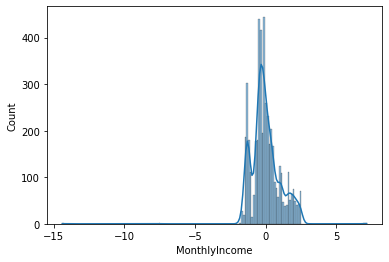

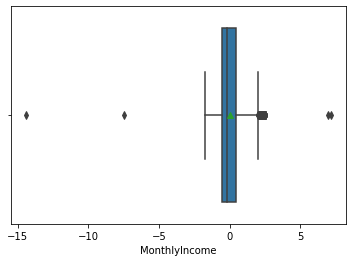

In [169]:
# Use histplots to see distribution for MonthlyIncome

sns.histplot(data=df,x='MonthlyIncome', kde=True)
plt.show()

sns.boxplot(data=df,x='MonthlyIncome', showmeans=True)
plt.show()

MonthlyIncome                - 

Datatype conversion - Not needed 

Inorrect values treatment - Not needed

Outliers treatment - Checked the upper and lower outliers. Max value is 98687, which is possible for an Executive (CustomerID = 202482). Min value is 1000. This certainly seems low for a Manager (CustomerID = 200142 ). However, there is only 1 record with that value, hence decided NOT to treat the record, but instead deleted it. Other upper and lower outliers seem legit, hence decided NOT to take any action.

Missing values treatment - Treated by replacing missing values by median. This also could be done separately for Train and Test datasets to avoid Data Leakage.

Feature Enginering - Not needed

Feature Scaling - Values are transformed / scaled using BoxCox

## Final Dataframe

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  4888 non-null   int64  
 1   ProdTaken                   4888 non-null   int64  
 2   Age                         4888 non-null   float64
 3   NumberOfPersonVisiting      4888 non-null   int64  
 4   PreferredPropertyStar       4888 non-null   int64  
 5   NumberOfTrips               4888 non-null   int64  
 6   Passport                    4888 non-null   int64  
 7   OwnCar                      4888 non-null   int64  
 8   NumberOfChildrenVisiting    4888 non-null   int64  
 9   MonthlyIncome               4888 non-null   float64
 10  CityTier_Tier2              4888 non-null   uint8  
 11  CityTier_Tier3              4888 non-null   uint8  
 12  Occupation_Large Business   4888 non-null   uint8  
 13  Occupation_Salaried         4888 

In [171]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
NumberOfPersonVisiting        0
PreferredPropertyStar         0
NumberOfTrips                 0
Passport                      0
OwnCar                        0
NumberOfChildrenVisiting      0
MonthlyIncome                 0
CityTier_Tier2                0
CityTier_Tier3                0
Occupation_Large Business     0
Occupation_Salaried           0
Occupation_Small Business     0
Gender_Male                   0
MaritalStatus_Married         0
MaritalStatus_Single          0
MaritalStatus_Unmarried       0
Designation_Executive         0
Designation_Manager           0
Designation_Senior Manager    0
Designation_VP                0
dtype: int64

In [172]:
df.sample(10, random_state=1)

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
3015      203015          0 27.0000                       4   
1242      201242          0 40.0000                       2   
3073      203073          0 29.0000                       4   
804       200804          0 48.0000                       2   
3339      203339          0 32.0000                       4   
3080      203080          1 36.0000                       4   
2851      202851          0 46.0000                       4   
2883      202883          1 32.0000                       4   
1676      201676          0 22.0000                       2   
1140      201140          0 44.0000                       2   

      PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
3015                      3              5         0       1   
1242                      4              2         0       1   
3073                      3              3         0       0   
804                       3              3         0       0   
3339                      5              3         1       0   
3080                      4              3         1       0   
2851                      3              5         0       1   
2883                      3              5         0       1   
1676                      4              2         1       1   
1140                      3              1         1       1   

      NumberOfChildrenVisiting  MonthlyIncome  CityTier_Tier2  CityTier_Tier3  \
3015                         3        -0.0037               0               0   
1242                         0         1.9960               0               1   
3073                         2         0.1142               1               0   
804                          0         1.5660               0               0   
3339                         3         0.4865               0               0   
3080                         1        -0.5184               0               0   
2851                         1        -0.3741               0               0   
2883                         1         1.0222               0               0   
1676                         0        -1.3685               0               0   
1140                         1         1.8852               0               0   

      Occupation_Large Business  Occupation_Salaried  \
3015                          0                    1   
1242                          0                    0   
3073                          0                    0   
804                           0                    0   
3339                          0                    0   
3080                          0                    1   
2851                          0                    1   
2883                          0                    1   
1676                          0                    1   
1140                          0                    0   

      Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
3015                          0            0                      1   
1242                          1            1                      0   
3073                          1            1                      1   
804                           1            1                      0   
3339                          1            1                      0   
3080                          0            0                      1   
2851                          0            1                      0   
2883                          0            1                      0   
1676                          0            1                      1   
1140                          1            0                      1   

      MaritalStatus_Single  MaritalStatus_Unmarried  Designation_Executive  \
3015                     0                        0                      1   
1242                     1                        0                      0   
3073                     0                        0                      1   
804 

# 10. Prepare TRAIN and TEST datasets

Separate TRAIN and TEST datasets from TOTAL dataset in 70 / 30 proportion. 

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  4888 non-null   int64  
 1   ProdTaken                   4888 non-null   int64  
 2   Age                         4888 non-null   float64
 3   NumberOfPersonVisiting      4888 non-null   int64  
 4   PreferredPropertyStar       4888 non-null   int64  
 5   NumberOfTrips               4888 non-null   int64  
 6   Passport                    4888 non-null   int64  
 7   OwnCar                      4888 non-null   int64  
 8   NumberOfChildrenVisiting    4888 non-null   int64  
 9   MonthlyIncome               4888 non-null   float64
 10  CityTier_Tier2              4888 non-null   uint8  
 11  CityTier_Tier3              4888 non-null   uint8  
 12  Occupation_Large Business   4888 non-null   uint8  
 13  Occupation_Salaried         4888 

In [174]:
# Let's separate data for TRAIN and TEST in the prportion of 70 / 30

df_train, df_test = train_test_split(df , test_size = 0.3, random_state= 1)

In [175]:
# Check sample records for TRAIN

df_train.sample(10, random_state=1)

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
4227      204227          0 34.0000                       4   
2466      202466          0 35.0000                       3   
176       200176          0 33.0000                       2   
723       200723          0 46.0000                       3   
2503      202503          0 38.0000                       3   
992       200992          0 39.0000                       3   
1890      201890          0 29.0000                       3   
3269      203269          0 30.0000                       4   
2329      202329          0 29.0000                       3   
4849      204849          1 33.0000                       3   

      PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
4227                      4              8         0       1   
2466                      4              2         0       1   
176                       3              1         0       0   
723                       3              7         0       0   
2503                      3              3         0       1   
992                       3              4         0       0   
1890                      3              2         0       0   
3269                      3              3         1       0   
2329                      3              1         1       1   
4849                      3              3         0       1   

      NumberOfChildrenVisiting  MonthlyIncome  CityTier_Tier2  CityTier_Tier3  \
4227                         2         1.3594               0               0   
2466                         1         1.3778               0               0   
176                          1        -1.3214               0               0   
723                          2         0.5493               0               0   
2503                         2         0.3251               0               0   
992                          0         0.5633               0               0   
1890                         2         0.7488               0               0   
3269                         1         0.1386               0               0   
2329                         1        -1.4127               0               0   
4849                         1         0.3671               0               0   

      Occupation_Large Business  Occupation_Salaried  \
4227                          0                    1   
2466                          0                    1   
176                           0                    1   
723                           0                    0   
2503                          0                    1   
992                           0                    1   
1890                          0                    0   
3269                          0                    0   
2329                          0                    1   
4849                          0                    1   

      Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
4227                          0            0                      1   
2466                          0            0                      0   
176                           0            1                      0   
723                           1            1                      1   
2503                          0            1                      1   
992                           0            1                      0   
1890                          1            1                      1   
3269                          1            1                      0   
2329                          0            0                      1   
4849                          0            0                      0   

      MaritalStatus_Single  MaritalStatus_Unmarried  Designation_Executive  \
4227                     0                        0                      0   
2466                     1                        0                      0   
176                      1                        0                      1   
723 

In [176]:
# Check sample records for TEST

df_test.sample(10, random_state=1)

CustomerID  ProdTaken     Age  NumberOfPersonVisiting  \
3832      203832          0 33.0000                       3   
3096      203096          0 38.0000                       3   
2741      202741          0 36.0000                       4   
1740      201740          0 55.0000                       2   
4233      204233          0 33.0000                       4   
1620      201620          0 40.0000                       2   
2543      202543          0 45.0000                       4   
1596      201596          1 58.0000                       3   
1413      201413          0 36.0000                       2   
3868      203868          0 36.0000                       3   

      PreferredPropertyStar  NumberOfTrips  Passport  OwnCar  \
3832                      3              7         0       0   
3096                      4              3         1       0   
2741                      4              2         0       1   
1740                      5              1         1       1   
4233                      4              3         1       1   
1620                      4              2         0       0   
2543                      4              6         0       1   
1596                      3              2         0       1   
1413                      3              7         1       0   
3868                      3              3         0       0   

      NumberOfChildrenVisiting  MonthlyIncome  CityTier_Tier2  CityTier_Tier3  \
3832                         2         0.4551               0               0   
3096                         1         0.6372               0               1   
2741                         3         0.7061               0               1   
1740                         1         1.8846               0               0   
4233                         3         0.1734               0               1   
1620                         1        -0.5404               0               0   
2543                         1        -0.5137               0               0   
1596                         0         0.4488               0               0   
1413                         0        -0.1510               0               0   
3868                         2         0.1471               0               0   

      Occupation_Large Business  Occupation_Salaried  \
3832                          0                    0   
3096                          0                    0   
2741                          0                    0   
1740                          0                    0   
4233                          1                    0   
1620                          0                    0   
2543                          0                    0   
1596                          0                    0   
1413                          0                    1   
3868                          0                    0   

      Occupation_Small Business  Gender_Male  MaritalStatus_Married  \
3832                          1            0                      1   
3096                          1            1                      0   
2741                          1            1                      0   
1740                          1            1                      0   
4233                          0            0                      1   
1620                          1            0                      1   
2543                          1            1                      0   
1596                          1            0                      1   
1413                          0            1                      1   
3868                          1            1                      0   

      MaritalStatus_Single  MaritalStatus_Unmarried  Designation_Executive  \
3832                     0                        0                      0   
3096                     0                        1                      0   
2741                     0                        0                      0   
1740

In [177]:
# Shapes of TOTAL, TRAIN and TEST Datasets 

print(" TOTAL Dataset \n Rows:", df.shape[0], '\n', "Columns:" , df.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", df_train.shape[0], '\n', "Columns:" , df_train.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", df_test.shape[0], '\n', "Columns:" , df_test.shape[1], "\n")

 TOTAL Dataset 
 Rows: 4888 
 Columns: 23 

 TRAIN Dataset 
 Rows: 3421 
 Columns: 23 

 TRAIN Dataset 
 Rows: 1467 
 Columns: 23 



In [178]:
# Shapes of TOTAL, TRAIN and TEST Datasets for ProdTaken values

print(" For TOTAL Dataset \n", df['ProdTaken'].value_counts(1), '\n')

print(" For TRAIN Dataset \n", df_train['ProdTaken'].value_counts(1), '\n')

print(" For TEST Dataset \n", df_test['ProdTaken'].value_counts(1), '\n')

 For TOTAL Dataset 
 0   0.8118
1   0.1882
Name: ProdTaken, dtype: float64 

 For TRAIN Dataset 
 0   0.8176
1   0.1824
Name: ProdTaken, dtype: float64 

 For TEST Dataset 
 0   0.7982
1   0.2018
Name: ProdTaken, dtype: float64 



In [179]:
# Separate dependent and independent features
# train1 and test1 are temporary dataframes

# independant features
X_train1 = df_train.drop(['ProdTaken','CustomerID'], axis=1)
X_test1 = df_test.drop(['ProdTaken','CustomerID'], axis=1)

# Dependent variable
y_train1 = df_train['ProdTaken']
y_test1 = df_test['ProdTaken']

In [180]:
y_train1.value_counts()

0    2797
1     624
Name: ProdTaken, dtype: int64

In [181]:
y_test1.value_counts()

0    1171
1     296
Name: ProdTaken, dtype: int64

In [182]:
# Balance the imbalance dataset

smote=SMOTE(sampling_strategy='minority')

X_train, y_train = smote.fit_resample(X_train1, y_train1)
X_test, y_test = smote.fit_resample(X_test1,y_test1)


In [183]:
y_train.value_counts()

0    2797
1    2797
Name: ProdTaken, dtype: int64

In [184]:
y_test.value_counts()

0    1171
1    1171
Name: ProdTaken, dtype: int64

In [185]:
del X_train1
del X_test1

TRAIN and TEST have proportionate records for ProdTaken = 1.

TRAIN and TEST Datasets are ready now.

# 11. Bagging Models - Build and Evaluate

## 11a. Build default Bagging models

Build Bagging classifier, Random Forest, and Decision Tree

### Default Decision Tree

In [186]:
# Create default Decision Tree with default parameters

dtree_default = DecisionTreeClassifier(random_state=1)

# Fit the model with TRAIN data

dtree_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [187]:
# Some characteristics of the default model

print('Some characteristics of the default model: dtree_default')
print('Number of Features are : ', dtree_default.tree_.max_depth)
print('Max Depth is : ', dtree_default.tree_.max_depth)
print('Node Counts are :', dtree_default.tree_.node_count)
print('Leaf Node Counts are :', dtree_default.tree_.n_leaves)

Some characteristics of the default model: dtree_default
Number of Features are :  18
Max Depth is :  18
Node Counts are : 1457
Leaf Node Counts are : 729


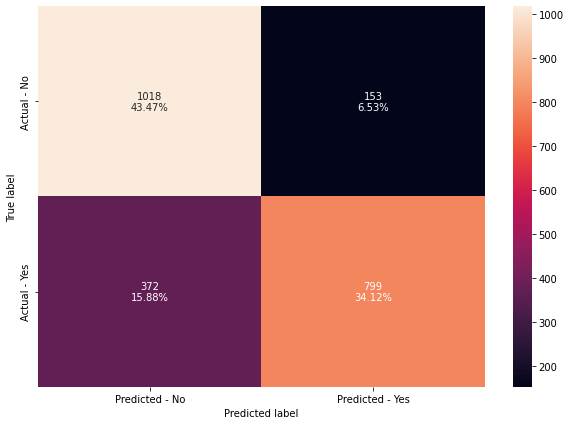

In [188]:
# Confusion Matrix for TEST

make_confusion_matrix(dtree_default,y_test)

In [189]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_default_score=get_metrics_score(dtree_default)

Accuracy on training set :  1.0
Accuracy on test set :  0.7758326216908625
Recall on training set :  1.0
Recall on test set :  0.6823228010247652
Precision on training set :  1.0
Precision on test set :  0.8392857142857143
F1 on training set :  1.0
F1 on test set :  0.7527084314649082


In [190]:
# Compare models - default, with max depth, pre-pruned using Gridsearch and Post-pruned

print('Metrics for Default Model : dtree_default ')
comparison_frame = pd.DataFrame({'Metric':['Accuracy','Precision','Recall', 'F1'], 
                                 
                                 'TRAIN_Dataset':[dtree_default.score(X_train, y_train), 
                                                  metrics.precision_score(y_train,dtree_default.predict(X_train)), 
                                                  metrics.recall_score(y_train,dtree_default.predict(X_train)),
                                                  metrics.f1_score(y_train,dtree_default.predict(X_train))], 
                                                                  
                                 'TEST_Dataset':[dtree_default.score(X_test, y_test), 
                                                  metrics.precision_score(y_test,dtree_default.predict(X_test)), 
                                                  metrics.recall_score(y_test,dtree_default.predict(X_test)),
                                                  metrics.f1_score(y_test,dtree_default.predict(X_test))]
                                 }) 
#comparison_frame = pd.DataFrame({'Model':['Default decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
 #                                        'Decision tree with post-pruning'], 'Train_Recall':[1,0.53,0.50,0.63], 'Test_Recall':[0.46,0.46,0.46,0.56]}) 
comparison_frame

Metrics for Default Model : dtree_default 


Metric  TRAIN_Dataset  TEST_Dataset
0   Accuracy         1.0000        0.7758
1  Precision         1.0000        0.8393
2     Recall         1.0000        0.6823
3         F1         1.0000        0.7527

### Default Bagging Classifier

In [191]:
# Default Bagging Classifier. Base_estimator for bagging classifier is a decision tree by default
bagging_default=BaggingClassifier(random_state=1)
bagging_default.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [192]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_default_score=get_metrics_score(bagging_default)

Accuracy on training set :  0.9949946371111905
Accuracy on test set :  0.8129803586678053
Recall on training set :  0.9924919556667858
Recall on test set :  0.703672075149445
Precision on training set :  0.9974847287100251
Precision on test set :  0.9005464480874317
F1 on training set :  0.9949820788530466
F1 on test set :  0.7900287631831256


### Default Bagging Classifier - With Logistic Regression base model

In [193]:
bagging_default_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=500),random_state=1)
#bagging_default_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_default_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=500,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [194]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_default_lr_score=get_metrics_score(bagging_default_lr)

Accuracy on training set :  0.7549159814086521
Accuracy on test set :  0.7745516652433817
Recall on training set :  0.7272077225598856
Recall on test set :  0.7574722459436379
Precision on training set :  0.7698713096139288
Precision on test set :  0.784261715296198
F1 on training set :  0.7479316050744622
F1 on test set :  0.7706342311033884


### Default Random forest

In [195]:
# Train the random forest classifier

#rf_estimator=RandomForestClassifier(random_state=1)
rf_default=RandomForestClassifier(random_state=1, class_weight='balanced')
rf_default.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [196]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_default_score=get_metrics_score(rf_default)

Accuracy on training set :  1.0
Accuracy on test set :  0.8257899231426131
Recall on training set :  1.0
Recall on test set :  0.7190435525192144
Precision on training set :  1.0
Precision on test set :  0.9142236699239956
F1 on training set :  1.0
F1 on test set :  0.8049713193116633


### Compare Default Bagging models

In [197]:
# Compare models - default, with max depth, pre-pruned using Gridsearch and Post-pruned

print('Metrics for Default Models : Decision Tree, Bagging Classifier and Random Forest Classifier')
comparison_frame = pd.DataFrame({'Decision Tree': ['Default Decision Tree', 'Default Bagging Classifier', 'Default Random Forest Classifier', 'Default Decision Tree w/Logistic Regression'],
                                 
                                 'TRAIN_Recall':[metrics.recall_score(y_train,dtree_default.predict(X_train)),
                                                 metrics.recall_score(y_train,bagging_default.predict(X_train)),
                                                metrics.recall_score(y_train,rf_default.predict(X_train)),
                                                 metrics.recall_score(y_train,bagging_default_lr.predict(X_train))],
                                 
                                 'TEST_Recall':[metrics.recall_score(y_test,dtree_default.predict(X_test)),
                                                metrics.recall_score(y_test,bagging_default.predict(X_test)),
                                                metrics.recall_score(y_test,rf_default.predict(X_test)),
                                                metrics.recall_score(y_test,bagging_default_lr.predict(X_test))],
                                                 
                                  'TRAIN_F1' : [metrics.f1_score(y_train,dtree_default.predict(X_train)),
                                               metrics.f1_score(y_train,bagging_default.predict(X_train)), 
                                               metrics.f1_score(y_train,rf_default.predict(X_train)),
                                               metrics.f1_score(y_train,bagging_default_lr.predict(X_train))],
                                                                  
                                 
                                 'TEST_F1' : [ metrics.f1_score(y_test,dtree_default.predict(X_test)),
                                              metrics.f1_score(y_test,bagging_default.predict(X_test)),                  
                                              metrics.f1_score(y_test,rf_default.predict(X_test)),
                                              metrics.f1_score(y_test,bagging_default_lr.predict(X_test))]
                                  })

comparison_frame

Metrics for Default Models : Decision Tree, Bagging Classifier and Random Forest Classifier


Decision Tree  TRAIN_Recall  TEST_Recall  \
0                        Default Decision Tree        1.0000       0.6823   
1                   Default Bagging Classifier        0.9925       0.7037   
2             Default Random Forest Classifier        1.0000       0.7190   
3  Default Decision Tree w/Logistic Regression        0.7272       0.7575   

   TRAIN_F1  TEST_F1  
0    1.0000   0.7527  
1    0.9950   0.7900  
2    1.0000   0.8050  
3    0.7479   0.7706

Some of the models seem to be overfit as Recall on Train is high (Low Bias) but Recall on Test is low (high variance). Need to see if we can tune the models further.

## 11b. Bagging Models - Performance Evaluation and Tuning

### Tune Decision Tree - Pre-pruning#1 - Decision Tree with various maximum depths

In [198]:
# Check for F1 values by varying the Max Depth of the Decision Tree

for i in np.arange(1,25):
  #dtree_preprun1 = DecisionTreeClassifier(criterion = 'gini',max_depth=i,random_state=1, class_weight='balanced)
  dtree_preprun1 = DecisionTreeClassifier(criterion = 'gini',max_depth=i,random_state=1)
  dtree_preprun1.fit(X_train, y_train)
  print('For ' , i)
  get_recall_score(dtree_preprun1)

For  1
Recall on TRAIN set :  0.5813371469431534
Recall on TEST set :  0.5328778821520068
For  2
Recall on TRAIN set :  0.5813371469431534
Recall on TEST set :  0.5328778821520068
For  3
Recall on TRAIN set :  0.6596353235609582
Recall on TEST set :  0.578138343296328
For  4
Recall on TRAIN set :  0.7247050411154808
Recall on TEST set :  0.6917164816396243
For  5
Recall on TRAIN set :  0.6810868787987129
Recall on TEST set :  0.6310845431255337
For  6
Recall on TRAIN set :  0.7490168037182696
Recall on TEST set :  0.6994022203245089
For  7
Recall on TRAIN set :  0.8069360028602074
Recall on TEST set :  0.6601195559350982
For  8
Recall on TRAIN set :  0.8140865212727922
Recall on TEST set :  0.6421861656703672
For  9
Recall on TRAIN set :  0.8594923131927065
Recall on TEST set :  0.6379163108454312
For  10
Recall on TRAIN set :  0.9242045048265999
Recall on TEST set :  0.6823228010247652
For  11
Recall on TRAIN set :  0.9263496603503754
Recall on TEST set :  0.6643894107600341
For  12
R

### Tune Decision Tree - Pre-pruning#2 - Decision Tree with hyperparameter tuning with GridSearchCV

In [199]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [2,3,4,5,6,7,None],
              'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'class_weight': ['balanced', {0:0.18,1:0.82}],
              'min_samples_leaf': [3,4,5,7,10,15],
              'max_leaf_nodes' : [3,4, 5, 10,12]
              }

# Type of scoring used to compare parameter combinations

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=10)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_preprun2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_preprun2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=2,
                       max_leaf_nodes=3, min_samples_leaf=3, random_state=1)

In [200]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_preprun2_score=get_metrics_score(dtree_preprun2)

Accuracy on training set :  0.5
Accuracy on test set :  0.5
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.5
Precision on test set :  0.5
F1 on training set :  0.6666666666666666
F1 on test set :  0.6666666666666666


### Tune Decision Tree - Post-pruning#1 - Decision Tree with post pruning

In [201]:
dtreee_postprun1 = DecisionTreeClassifier(random_state=1)
path = dtreee_postprun1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [202]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03183636842678239


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

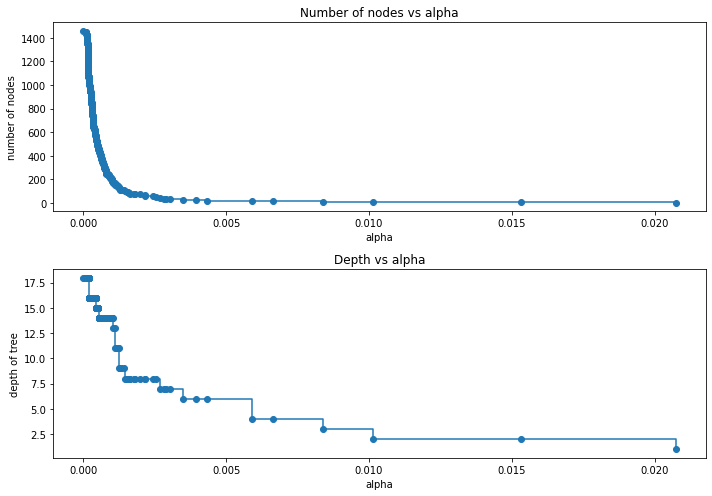

In [203]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [204]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [205]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

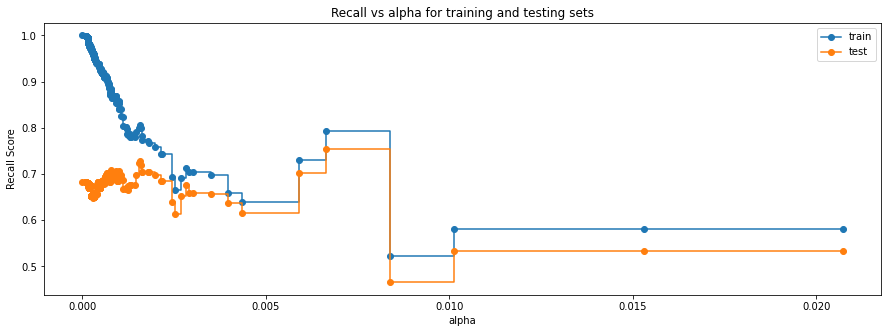

In [206]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall Score")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [207]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
dtreee_postprun1_best = clfs[index_best_model]
print(dtreee_postprun1_best)

DecisionTreeClassifier(ccp_alpha=0.006638691602556757, random_state=1)


In [208]:
# Some characteristics of the post-pruned model

print('Some characteristics of the Post-pruned model: dtreee_postprun1_best')
print('Number of Features are : ', dtreee_postprun1_best.tree_.max_depth)
print('Max Depth is : ', dtreee_postprun1_best.tree_.max_depth)
print('Node Counts are :', dtreee_postprun1_best.tree_.node_count)
print('Leaf Node Counts are :', dtreee_postprun1_best.tree_.n_leaves)

Some characteristics of the Post-pruned model: dtreee_postprun1_best
Number of Features are :  4
Max Depth is :  4
Node Counts are : 13
Leaf Node Counts are : 7


In [209]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtreee_postprun1_best_score=get_metrics_score(dtreee_postprun1_best)

Accuracy on training set :  0.6936002860207365
Accuracy on test set :  0.683603757472246
Recall on training set :  0.7940650697175545
Recall on test set :  0.7549103330486764
Precision on training set :  0.6612086930634117
Precision on test set :  0.6606875934230194
F1 on training set :  0.721572449642625
F1 on test set :  0.7046632124352331


### Tune Bagging Classifier

In [210]:
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.8,0.9,1], 
               'max_features': [0.7,0.8,0.9,1],
               'n_estimators' : [10,20,30,40,50],
              
              }

# Type of scoring used to compare parameter combinations

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search

grid_obj_bagging = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=10)
grid_obj_bagging = grid_obj_bagging.fit(X_train, y_train)

# Set the clf to the best combination of parameters

bagging_tuned = grid_obj_bagging.best_estimator_

# Fit the best algorithm to the data.

bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                  random_state=1)

In [211]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_tuned_score=get_metrics_score(bagging_tuned)

Accuracy on training set :  0.5
Accuracy on test set :  0.5
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.5
Precision on test set :  0.5
F1 on training set :  0.6666666666666666
F1 on test set :  0.6666666666666666


### Tune Random Forest Classifier

In [216]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [80,90,100],
    "min_samples_leaf": [8,9,10],
    "min_samples_split": [2,5,7],
    "max_features": [0.1,0.2,0.3],
    "max_samples": [0.4,0.5,0.7],
    "class_weight": ['balanced', {0:0.18,1:0.82}]
             }


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj_rf = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=10)
grid_obj_rf = grid_obj_rf.fit(X_train, y_train)

# Set the model to the best estimator
rf_tuned = grid_obj_rf.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features=0.1,
                       max_samples=0.7, min_samples_leaf=10, n_estimators=80,
                       random_state=1)

In [217]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_tuned_score=get_metrics_score(rf_tuned)

Accuracy on training set :  0.607615302109403
Accuracy on test set :  0.5845431255337319
Recall on training set :  0.9989274222381123
Recall on test set :  0.9846285226302306
Precision on training set :  0.560369033293221
Precision on test set :  0.5469639468690702
F1 on training set :  0.7179750738789669
F1 on test set :  0.7032631899969503


## Compare Tuned Bagging Models

In [218]:
# Compare ALL models

print('Compare Evaluation metric for Tuned Bagging Models')
comparison_frame = pd.DataFrame({'Model': ['Decision Tree - Prepruned1', 'Decision Tree - Prepruned2', 'Decision Tree - Postpruned1', 'Tuned Bagging Classifier', 'Tuned Random Forest Classifier'],
                                 
                                 'TRAIN_Recall':[metrics.recall_score(y_train,dtree_preprun1.predict(X_train)),
                                                 metrics.recall_score(y_train,dtree_preprun2.predict(X_train)),
                                                 metrics.recall_score(y_train,dtreee_postprun1_best.predict(X_train)),
                                                 metrics.recall_score(y_train,bagging_tuned.predict(X_train)),
                                                 metrics.recall_score(y_train,rf_tuned.predict(X_train))],
                                 
                                 'TEST_Recall':[metrics.recall_score(y_test,dtree_preprun1.predict(X_test)),
                                                 metrics.recall_score(y_test,dtree_preprun2.predict(X_test)),
                                                 metrics.recall_score(y_test,dtreee_postprun1_best.predict(X_test)),
                                                 metrics.recall_score(y_test,bagging_tuned.predict(X_test)),
                                                 metrics.recall_score(y_test,rf_tuned.predict(X_test))],
                                                 
                                  'TRAIN_F1' : [metrics.f1_score(y_train,dtree_preprun1.predict(X_train)),
                                                 metrics.f1_score(y_train,dtree_preprun2.predict(X_train)),
                                                 metrics.f1_score(y_train,dtreee_postprun1_best.predict(X_train)),
                                                 metrics.f1_score(y_train,bagging_tuned.predict(X_train)),
                                                 metrics.f1_score(y_train,rf_tuned.predict(X_train))],
                                                                  
                                 
                                 'TEST_F1' : [metrics.f1_score(y_test,dtree_preprun1.predict(X_test)),
                                                 metrics.f1_score(y_test,dtree_preprun2.predict(X_test)),
                                                 metrics.f1_score(y_test,dtreee_postprun1_best.predict(X_test)),
                                                 metrics.f1_score(y_test,bagging_tuned.predict(X_test)),
                                                 metrics.f1_score(y_test,rf_tuned.predict(X_test))]
                                  })

comparison_frame

Compare Evaluation metric for Tuned Bagging Models


Model  TRAIN_Recall  TEST_Recall  TRAIN_F1  \
0      Decision Tree - Prepruned1        1.0000       0.6823    1.0000   
1      Decision Tree - Prepruned2        1.0000       1.0000    0.6667   
2     Decision Tree - Postpruned1        0.7941       0.7549    0.7216   
3        Tuned Bagging Classifier        1.0000       1.0000    0.6667   
4  Tuned Random Forest Classifier        0.9989       0.9846    0.7180   

   TEST_F1  
0   0.7527  
1   0.6667  
2   0.7047  
3   0.6667  
4   0.7033

Overall performance of all models is better than default models. Couple of models have a perfect Recall on Train as well as Test.

# 12. Boosting Models - Build and Evaluate


## 12a. Build default Boosting Models


### Default AdaBoost Model

In [225]:
ada_default = AdaBoostClassifier(random_state=1)
ada_default.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [226]:
#Using above defined function to get accuracy, recall and precision on train and test set
ada_default_score=get_metrics_score(ada_default)

Accuracy on training set :  0.7624240257418663
Accuracy on test set :  0.7664389410760034
Recall on training set :  0.7411512334644261
Recall on test set :  0.748932536293766
Precision on training set :  0.7740851381628081
Precision on test set :  0.7761061946902655
F1 on training set :  0.7572602739726029
F1 on test set :  0.762277270751847


### Default Gradient Boosting Classifier

In [221]:
gbc_default = GradientBoostingClassifier(random_state=1)
gbc_default.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [222]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc_default)

Accuracy on training set :  0.836968180193064
Accuracy on test set :  0.8052946199829206
Recall on training set :  0.8126564175902753
Recall on test set :  0.7591801878736123
Precision on training set :  0.8541901540774145
Precision on test set :  0.8363123236124177
F1 on training set :  0.8329058263100036
F1 on test set :  0.7958818263205013


### Default Extreme Gradient Boosting Model (XGB)

In [223]:
xgb_default = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_default.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

In [224]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_default_score=get_metrics_score(xgb_default)

Accuracy on training set :  0.8285663210582768
Accuracy on test set :  0.8014517506404782
Recall on training set :  0.8097962102252413
Recall on test set :  0.7651579846285226
Precision on training set :  0.8413818722139673
Precision on test set :  0.8250460405156538
F1 on training set :  0.8252869375113864
F1 on test set :  0.7939743021710234


## 12b. Boosting Models - Performance Evaluation and Tuning

### Tune AdaBoost Model

In [227]:
# Choose the type of classifier. 
ada_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=4, random_state=1),DecisionTreeClassifier(max_depth=5, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(50,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj_ada = GridSearchCV(ada_tuned, parameters, scoring=acc_scorer,cv=10)
grid_obj_ada = grid_obj_ada.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_tuned = grid_obj_ada.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         random_state=1),
                   learning_rate=0.5, n_estimators=100, random_state=1)

In [228]:
#Using above defined function to get accuracy, recall and precision on train and test set
ada_tuned_score=get_metrics_score(ada_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.8706233988044406
Recall on training set :  1.0
Recall on test set :  0.798462852263023
Precision on training set :  1.0
Precision on test set :  0.9331337325349301
F1 on training set :  1.0
F1 on test set :  0.8605614358030372


### Tune Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [200,250,325,350],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj_gbc = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=10)
grid_obj_gbc = grid_obj_gbc.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj_gbc.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

### Tune Extreme Gradient Boosting Model (XGB)

Commented this as its extremely time consuming. Note from the rubric - Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost.

In [ ]:
# # Choose the type of classifier. 
# xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# # Grid of parameters to choose from
# ## add from
# parameters = {
#     "n_estimators": np.arange(10,100,20),
#     "scale_pos_weight":[0,1,2,5],
#     "subsample":[0.5,0.7,0.9,1],
#     "learning_rate":[0.01,0.1,0.2,0.05],
#     "gamma":[0,1,3],
#     "colsample_bytree":[0.5,0.7,0.9,1],
#     "colsample_bylevel":[0.5,0.7,0.9,1]
# }

# # Type of scoring used to compare parameter combinations
# acc_scorer = metrics.make_scorer(metrics.recall_score)

# # Run the grid search
# grid_obj_xgb = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
# grid_obj_xgb = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# xgb_tuned = grid_obj_xgb.best_estimator_

# # Fit the best algorithm to the data.
# xgb_tuned.fit(X_train, y_train)

In [ ]:
# #Using above defined function to get accuracy, recall and precision on train and test set
# xgb_tuned_score=get_metrics_score(xgb_tuned)

## Compare all Boosting Models

In [ ]:
# Compare ALL models

print('Compare Evaluation metric for ALL Boosting Models')
comparison_frame = pd.DataFrame({'Model': ['Default AdaBoost', 'Default Gradient Boosting', 'Default Exterme Gradient Boosting',
                                           'Tuned AdaBoost','Tuned Gradient Boosting'],
                                 
                                 'TRAIN_Recall':[metrics.recall_score(y_train,ada_default.predict(X_train)),
                                                 metrics.recall_score(y_train,gbc_default.predict(X_train)),
                                                 metrics.recall_score(y_train,xgb_default.predict(X_train)),

                                                 metrics.recall_score(y_train,ada_tuned.predict(X_train)),
                                                 metrics.recall_score(y_train,gbc_tuned.predict(X_train))],
                                 
                                 'TEST_Recall':[metrics.recall_score(y_test,ada_default.predict(X_test)),
                                                 metrics.recall_score(y_test,gbc_default.predict(X_test)),
                                                 metrics.recall_score(y_test,xgb_default.predict(X_test)),

                                                 metrics.recall_score(y_test,ada_tuned.predict(X_test)),
                                                 metrics.recall_score(y_test,gbc_tuned.predict(X_test))],
                                                 
                                  'TRAIN_F1' : [metrics.f1_score(y_train,ada_default.predict(X_train)),
                                                 metrics.f1_score(y_train,gbc_default.predict(X_train)),
                                                 metrics.f1_score(y_train,xgb_default.predict(X_train)),

                                                 metrics.f1_score(y_train,ada_tuned.predict(X_train)),
                                                 metrics.f1_score(y_train,gbc_tuned.predict(X_train))],
                                                                  
                                 
                                 'TEST_F1' : [metrics.f1_score(y_test,ada_default.predict(X_test)),
                                                 metrics.f1_score(y_test,gbc_default.predict(X_test)),
                                                 metrics.f1_score(y_test,xgb_default.predict(X_test)),

                                                 metrics.f1_score(y_test,ada_tuned.predict(X_test)),
                                                 metrics.f1_score(y_test,gbc_tuned.predict(X_test))]
                                  })

comparison_frame

# 13. Stacking Models

In [ ]:
stacking_estimators=[('Decision Tree Prepruned', dtree_preprun2), ('Tuned Ada Boost', ada_tuned), ('Tuned gbm', gbc_tuned)]
final_estimator=RandomForestClassifier(random_state=1)

In [ ]:
stacking_estimator=StackingClassifier(estimators=stacking_estimators, final_estimator=final_estimator,cv=10)
stacking_estimator.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
stacking_estimator_score=get_metrics_score(stacking_estimator)

# 14. Compare all models

In [ ]:
# Compare ALL models

print('Compare Evaluation metric for ALL Models')
comparison_frame = pd.DataFrame({'Model': ['Default Decision Tree', 'Default Bagging Classifier', 'Default Random Forest Classifier', 'Default Decision Tree w/Logistic Regression', 
                                           'Decision Tree - Prepruned1', 'Decision Tree - Prepruned2', 'Decision Tree - Postpruned1', 'Tuned Bagging Classifier', 'Tuned Random Forest Classifier',
                                           'Default AdaBoost', 'Default Gradient Boosting', 'Default Exterme Gradient Boosting',
                                           'Tuned AdaBoost','Tuned Gradient Boosting',
                                           'Stacking'
                                           ],
                                 
                                 'TRAIN_Recall':[metrics.recall_score(y_train,dtree_default.predict(X_train)),
                                                 metrics.recall_score(y_train,bagging_default.predict(X_train)),
                                                 metrics.recall_score(y_train,rf_default.predict(X_train)),
                                                 metrics.recall_score(y_train,bagging_default_lr.predict(X_train)),

                                                 metrics.recall_score(y_train,dtree_preprun1.predict(X_train)),
                                                 metrics.recall_score(y_train,dtree_preprun2.predict(X_train)),
                                                 metrics.recall_score(y_train,dtreee_postprun1_best.predict(X_train)),
                                                 metrics.recall_score(y_train,bagging_tuned.predict(X_train)),
                                                 metrics.recall_score(y_train,rf_tuned.predict(X_train)),


                                                 metrics.recall_score(y_train,ada_default.predict(X_train)),
                                                 metrics.recall_score(y_train,gbc_default.predict(X_train)),
                                                 metrics.recall_score(y_train,xgb_default.predict(X_train)),

                                                 metrics.recall_score(y_train,ada_tuned.predict(X_train)),
                                                 metrics.recall_score(y_train,gbc_tuned.predict(X_train)),


                                                  metrics.recall_score(y_train,stacking_estimator.predict(X_train))],
                                 
                                 'TEST_Recall':[metrics.recall_score(y_test,dtree_default.predict(X_test)),
                                                metrics.recall_score(y_test,bagging_default.predict(X_test)),
                                                metrics.recall_score(y_test,rf_default.predict(X_test)),
                                                metrics.recall_score(y_test,bagging_default_lr.predict(X_test)),
                                                
                                                
                                                metrics.recall_score(y_test,dtree_preprun1.predict(X_test)),
                                                 metrics.recall_score(y_test,dtree_preprun2.predict(X_test)),
                                                 metrics.recall_score(y_test,dtreee_postprun1_best.predict(X_test)),
                                                 metrics.recall_score(y_test,bagging_tuned.predict(X_test)),
                                                 metrics.recall_score(y_test,rf_tuned.predict(X_test)),


                                                 metrics.recall_score(y_test,ada_default.predict(X_test)),
                                                 metrics.recall_score(y_test,gbc_default.predict(X_test)),
                                                 metrics.recall_score(y_test,xgb_default.predict(X_test)),

                                                 metrics.recall_score(y_test,ada_tuned.predict(X_test)),
                                                 metrics.recall_score(y_test,gbc_tuned.predict(X_test)),
                                                 
                                                metrics.recall_score(y_test,stacking_estimator.predict(X_test))],
                                                 
                                  'TRAIN_F1' : [metrics.f1_score(y_train,dtree_default.predict(X_train)),
                                               metrics.f1_score(y_train,bagging_default.predict(X_train)), 
                                               metrics.f1_score(y_train,rf_default.predict(X_train)),
                                               metrics.f1_score(y_train,bagging_default_lr.predict(X_train)),
                                               
                                               metrics.f1_score(y_train,dtree_preprun1.predict(X_train)),
                                                 metrics.f1_score(y_train,dtree_preprun2.predict(X_train)),
                                                 metrics.f1_score(y_train,dtreee_postprun1_best.predict(X_train)),
                                                 metrics.f1_score(y_train,bagging_tuned.predict(X_train)),
                                                 metrics.f1_score(y_train,rf_tuned.predict(X_train)),


                                                 metrics.f1_score(y_train,ada_default.predict(X_train)),
                                                 metrics.f1_score(y_train,gbc_default.predict(X_train)),
                                                 metrics.f1_score(y_train,xgb_default.predict(X_train)),

                                                 metrics.f1_score(y_train,ada_tuned.predict(X_train)),
                                                 metrics.f1_score(y_train,gbc_tuned.predict(X_train)),
                                                                                  
                                                  metrics.f1_score(y_train,stacking_estimator.predict(X_train))],
                                                                  
                                 
                                 'TEST_F1' : [ metrics.f1_score(y_test,dtree_default.predict(X_test)),
                                              metrics.f1_score(y_test,bagging_default.predict(X_test)),                  
                                              metrics.f1_score(y_test,rf_default.predict(X_test)),
                                              metrics.f1_score(y_test,bagging_default_lr.predict(X_test)),
                                              
                                              metrics.f1_score(y_test,dtree_preprun1.predict(X_test)),
                                                 metrics.f1_score(y_test,dtree_preprun2.predict(X_test)),
                                                 metrics.f1_score(y_test,dtreee_postprun1_best.predict(X_test)),
                                                 metrics.f1_score(y_test,bagging_tuned.predict(X_test)),
                                                 metrics.f1_score(y_test,rf_tuned.predict(X_test)),


                                                 metrics.f1_score(y_test,ada_default.predict(X_test)),
                                                 metrics.f1_score(y_test,gbc_default.predict(X_test)),
                                                 metrics.f1_score(y_test,xgb_default.predict(X_test)),

                                                 metrics.f1_score(y_test,ada_tuned.predict(X_test)),
                                                 metrics.f1_score(y_test,gbc_tuned.predict(X_test)),
                                                 
                                                 metrics.f1_score(y_test,stacking_estimator.predict(X_test))]
                                  })

comparison_frame

# 15. <b><font color="blue"> Recommended Model</b>


* In section 3, we have chosen RECALL as the most suitable model evaluation metric for this use case.
* Based on that, below are the Top 3 models based on their Train and Test performance - 
    1. <b><font color="green"> Decision Tree - Prepruned2 - Perfect Recall on Train and Test. More testing should be done with more test data to verify the performance of this model.
    2. <b><font color="green"> Tuned Bagging Classifier	- Perfect Recall on Train and Test. More testing should be done with more test data to verify the performance of this model.
    3. Tuned Random Forest Classifier (Recommended Model) - Train Recall 0.9907 and Test Recall 0.9419 </b>. This model performs well / better than first two on F1 score as well.

* Without using SMOTE, the numbers were - 
    1. Tuned Random Forest Classifier - Train Recall 0.8093 and Test Recall 0.5845
    2. Decision Tree - Postpruned 1 - Train Recall 1.0000 and Test Recall 0.6284
    3. Tuned AdaBoost - Train Recall 1.0000 and Test Recall 0.5743

  Tuned Random Forest Classifier still would have been the best model. But balancing the dataset did help improve the Recall.

# 16. <b><font color="blue">Actionable Insights & Recommendations</b>


<b><font color ="blue" size=5>Based on EDA, Customer Profile of customers who purchased - 

<b><font color ="green" size=4>
* More numbers reside in Tier 1 city, followed by Tier 3 cities

<b><font color ="green" size=4>
* Most are either Salaried or Small Business owners. Almost none are Free Lancers

<b><font color ="green" size=4>
* Majority are males, but females are not very far behind in numbers. So packages have appealed both genders equally

<b><font color ="green" size=4>
* At least 3 follow-ups are needed

<b><font color ="green" size=4>
* Most buy 'Basic' package, minimal Super Deluxe and King packages bought

<b><font color ="green" size=4>
* Most are interested in 3 star properties

<b><font color ="green" size=4>
* Majority are Married or Single

<b><font color ="green" size=4>
* If they own car or not and have passport, or not, makes no difference

<b><font color ="green" size=4>
* Executives have bought most number of packages. Percentage of 'conversion' is great for Executives, 552 out of total 1842 records

<b><font color ="green" size=4>
* Monthly income is between 18,000 and 22,000

<b><font color ="blue" size=5>What would your advice be to grow the business?

<b><font color ="green" size=4>
* Basic is the most popular package from pitch perspective as well as from sales perspective. This is pitched mostly in Tier 1 cities. Sales & Marketing teams should pitch this in other tier cities as well.

<b><font color ="green" size=4>
* Majority of the customers who purchased the packages had contacted on their own (Self-Enquiry). Customers calling on their own instead of 'cold calls' by the sales team is effective and cheaper for the business as well. Promote products via advertizing to encourage customers to reach out to the businss via various channels (email, phone, chat etc.)

<b><font color ="green" size=4>
* 3 and 4 times follow-up seems to be the norm. Sales agents need to persist and follow-up. Executives need more follow-up than other designations, something to keep in mind.

<b><font color ="green" size=4>
* Duration of the picth may have helped, its little higher for customers who purchased the packages. More elaborate description of the packages and detailed answering of queries may contribute to purchase.

<b><font color ="green" size=4>
* Clearly seen that higher Age customers were pitched Super Deluxe and King packages. Younger customers were pitched Basic package. However, overall, customers who have opted for the packages are younger as well. Packages other than Basic should be pitched to younger customers as well. 


*<b><font color ="green" size=4> Use the model recommended in sections 14 & 15 to predict if the customer is a potential customer who will purchase the package. Use above-mentioned tips from EDA while contacting the customers. This will ensure 'targeted' marketing and will improve the yield (percentage of customers converted into purchasing the package, of all customers contacted). Recommended model will be able to predict right target customer for 94% of the time, which is great. This will ensure that target customers are not missed.

